# Timing

One of the fundamental challenges in digital circuit design is **understanding and managing timing**. Even though we often describe logic gates as if they respond **instantaneously** to changes at their inputs, **real circuits always require a finite amount of time to react**. Making a circuit run fast is therefore not simply a matter of writing efficient logic equations; it ultimately depends on **how quickly every gate and wire in the system can respond to changing signals**. When the input of a gate changes, the output does not switch immediately. Instead, it takes a certain amount of time for the internal transistors of the circuit to react and settle to the new logical level. This interval is called **delay**, and it is an **inherent physical property of the technology** used to implement the circuit. In modern digital circuits, delays are extremely small, typically ranging from a few picoseconds (10^-12 seconds) to several nanoseconds (10^-9 seconds), but even these tiny times **accumulate** across many levels of logic and can **limit how quickly a digital system can operate**.

To visualize this behaviour, it is useful to look at a **timing diagram**. A timing diagram shows how signals vary over time, capturing the transient response of a circuit when the input changes. If we consider a simple buffer, the diagram will show the moment when the input begins to rise from a low voltage to a high voltage, a moment known as the **rising edge**: 

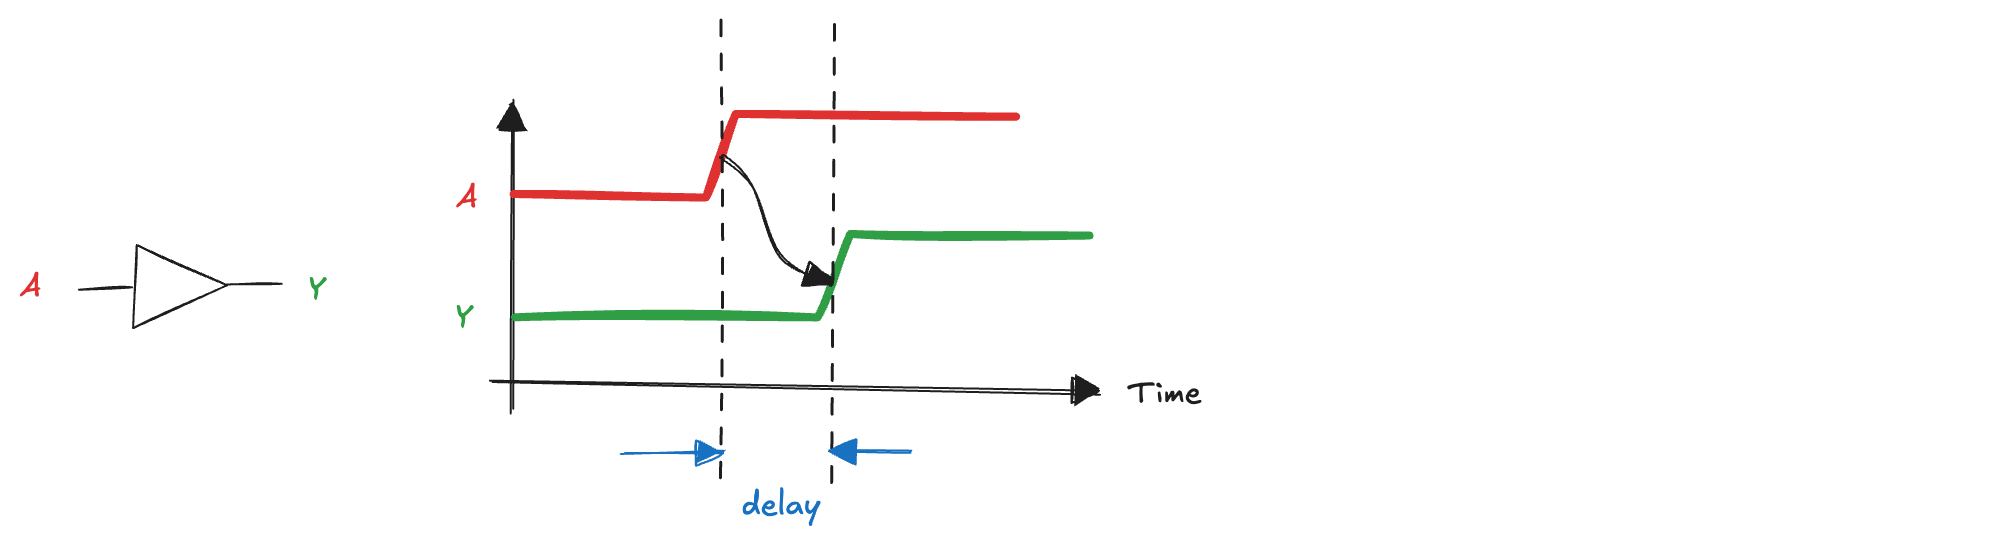

The output also performs a rising transition, but noticeably later, demonstrating the presence of delay. Similarly, when the input transitions from high to low, the circuit exhibits a **falling edge**, again followed by a delayed falling transition at the output. The arrows in the diagram highlight the dependency of the output transitions on the corresponding transitions at the input.

Delay is measured in a consistent and technology-independent way. Rather than measuring from the exact moment the voltage begins to change (which is often difficult to define precisely) we use standardized reference points. A rising edge is considered to occur at the moment the signal crosses the 50% voltage level between its low and high values. The output delay is therefore defined as **the time difference between the 50% point of the input transition and the 50% point of the corresponding transition at the output**. This convention allows engineers to compare delays across different circuits and technologies with clarity and precision.

Understanding delay is the first step toward analysing more complex timing concepts such as propagation delay, contamination delay, setup and hold times, and ultimately the maximum clock frequency at which a synchronous digital system can safely operate.

## Combinational Circuits Timing

In combinational circuits, timing plays a fundamental role because even the simplest logic operations require finite, non-negligible delays to propagate through gates, and understanding these delays is essential for predicting how quickly and reliably a digital system can respond to its inputs.

### Propagation and Contamination Delays

When analysing how signals travel through digital circuits, it is not enough to say that a gate "has a delay". In practice, two different kinds of delay are important. The first is called **propagation delay** and it represents the **maximum** amount of time a gate may take to produce a valid output after its input has changed. In other words, if an input transitions at some instant, the output is guaranteed to have reached its final, stable value no later than a propagation delay after that moment. The second parameter is the **contamination delay** and it is the **minimum** amount of time between a change at the input and the moment the output begins to respond. Even the fastest internal transistor paths cannot cause the output to start changing before a contamination delay has elapsed. To understand these quantities more concretely, imagine that the input A of a gate initially holds a stable value, either HIGH or LOW. At a particular moment, A switches to the opposite logic level. For our purposes, we do not care whether the transition is rising or falling; what matters is simply that a transition occurs: 

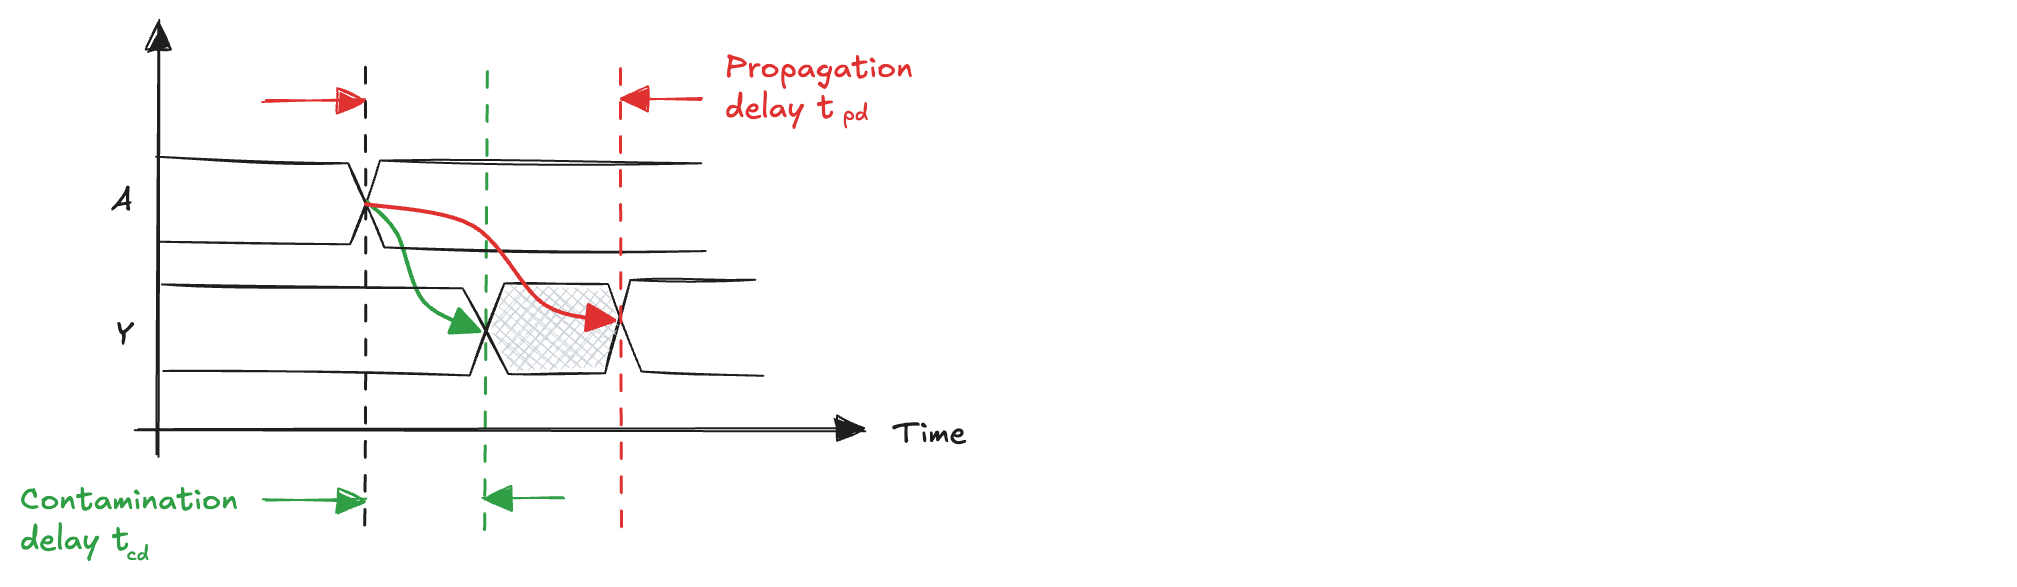

The output Y will react to this change, but not immediately. It will remain unchanged for at least the contamination delay. This ensures that any unintended early glitches cannot occur sooner than this minimum delay. After this initial interval, the output begins to move toward its new logical level. However, it does not reach that final level instantly. It takes some amount of time to complete the transition, and we know with certainty that it will have fully settled within the propagation delay. Thus, the output is guaranteed to be correct by the end of this maximum delay window.

The timing diagram typically used to illustrate these ideas shows the input switching at a given time, followed by a shaded region representing the uncertainty interval during which the output may or may not have begun to change. The earliest possible change corresponds to the contamination delay, while the latest time at which the output must be stable corresponds to the propagation delay. This region highlights the fact that while we know the output cannot react too early, we also know it will not react too late.

The origin of these delays lies in the **physical behaviour of electronic circuits**. Every gate contains transistors and small parasitic capacitors, and these capacitances must charge or discharge before voltages can change appreciably. This charging process takes time, and the speed at which electric signals propagate through materials is ultimately limited by fundamental physical principles, including the speed of light in the medium. As a result, even the simplest logic gate exhibits both minimum and maximum timing characteristics.

Accurately determining the values of propagation and contamination delays requires studying the internal transistor-level implementation of the gate, which is far below the level of abstraction we use when designing complex digital systems. Fortunately, we rarely need to perform these low-level analyses ourselves. Semiconductor manufacturers provide **data sheets** that specify the timing characteristics of each gate type under various operating conditions. By relying on these published parameters, digital designers can predict and verify the timing behaviour of much larger systems without ever needing to analyse their circuits at the transistor level.

### Critical and Short Paths

Up to now we have considered delay as a property of individual gates, but real digital circuits are built by connecting many gates together. As a result, the total delay from an input to an output depends not only on the characteristics of each gate, but also on the specific **path** that a signal takes as it travels through the circuit. Some paths contain only a few gates, while others force the signal to propagate through several stages of logic. Since every gate introduces some delay, the overall timing behaviour of the circuit is governed by the lengths of these paths. For example, consider the following combinational circuit:

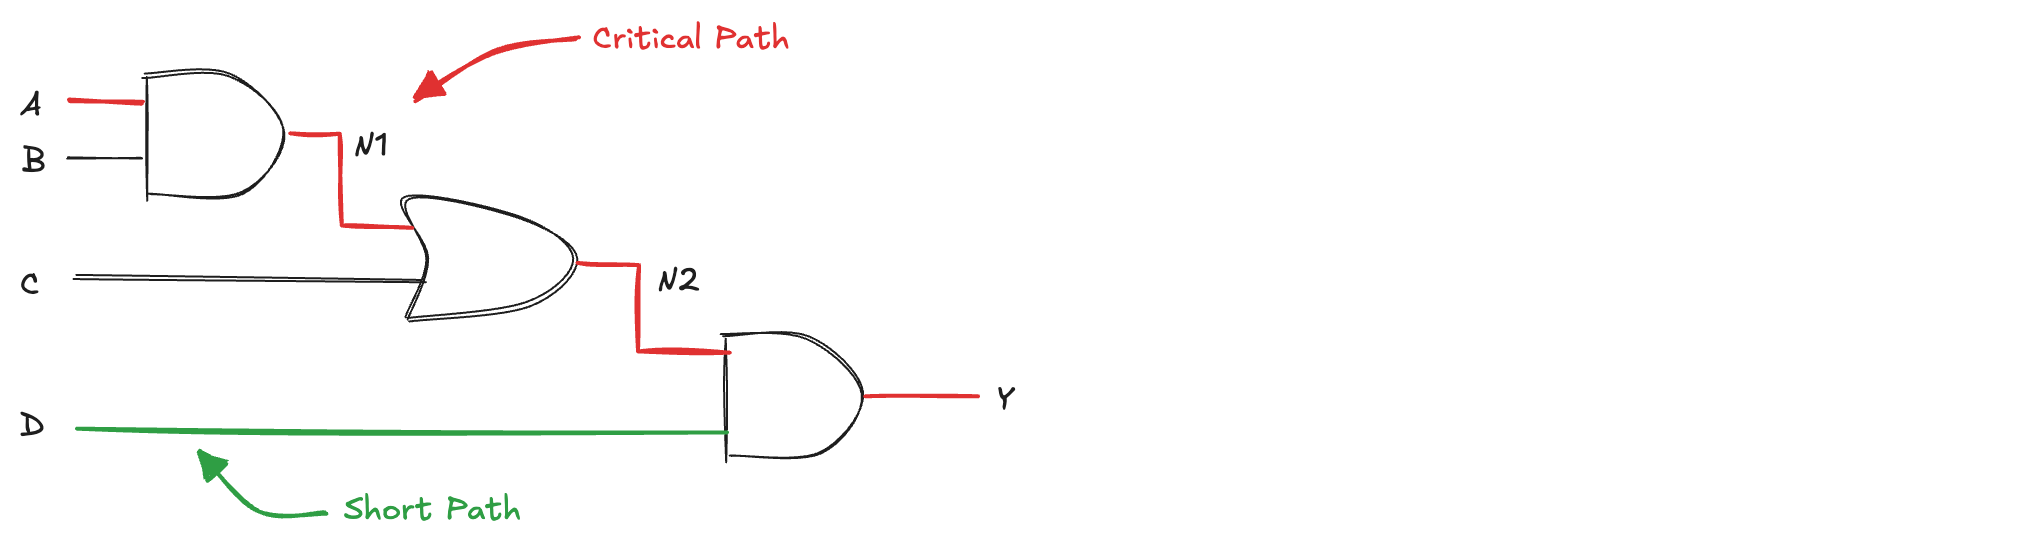

The most important of these paths is called the **critical path**. The critical path is simply the **longest** or **slowest** path from any input to any output. A signal that enters the circuit and must traverse this path will go through more gates, and therefore experience a larger total propagation delay than signals travelling along shorter paths. The length of the critical path plays a fundamental role in determining how fast the circuit can operate. Specifically, it sets an **upper bound on the clock frequency** of synchronous systems or, in combinational circuits, on how quickly valid outputs can appear after valid inputs are applied. The propagation delay of the entire circuit is obtained by taking the sum of the propagation delays of all the gates along the critical path. In the example, the critical path passes through two AND gates and an OR gate, the total propagation delay is simply the sum of the delays of these three components:

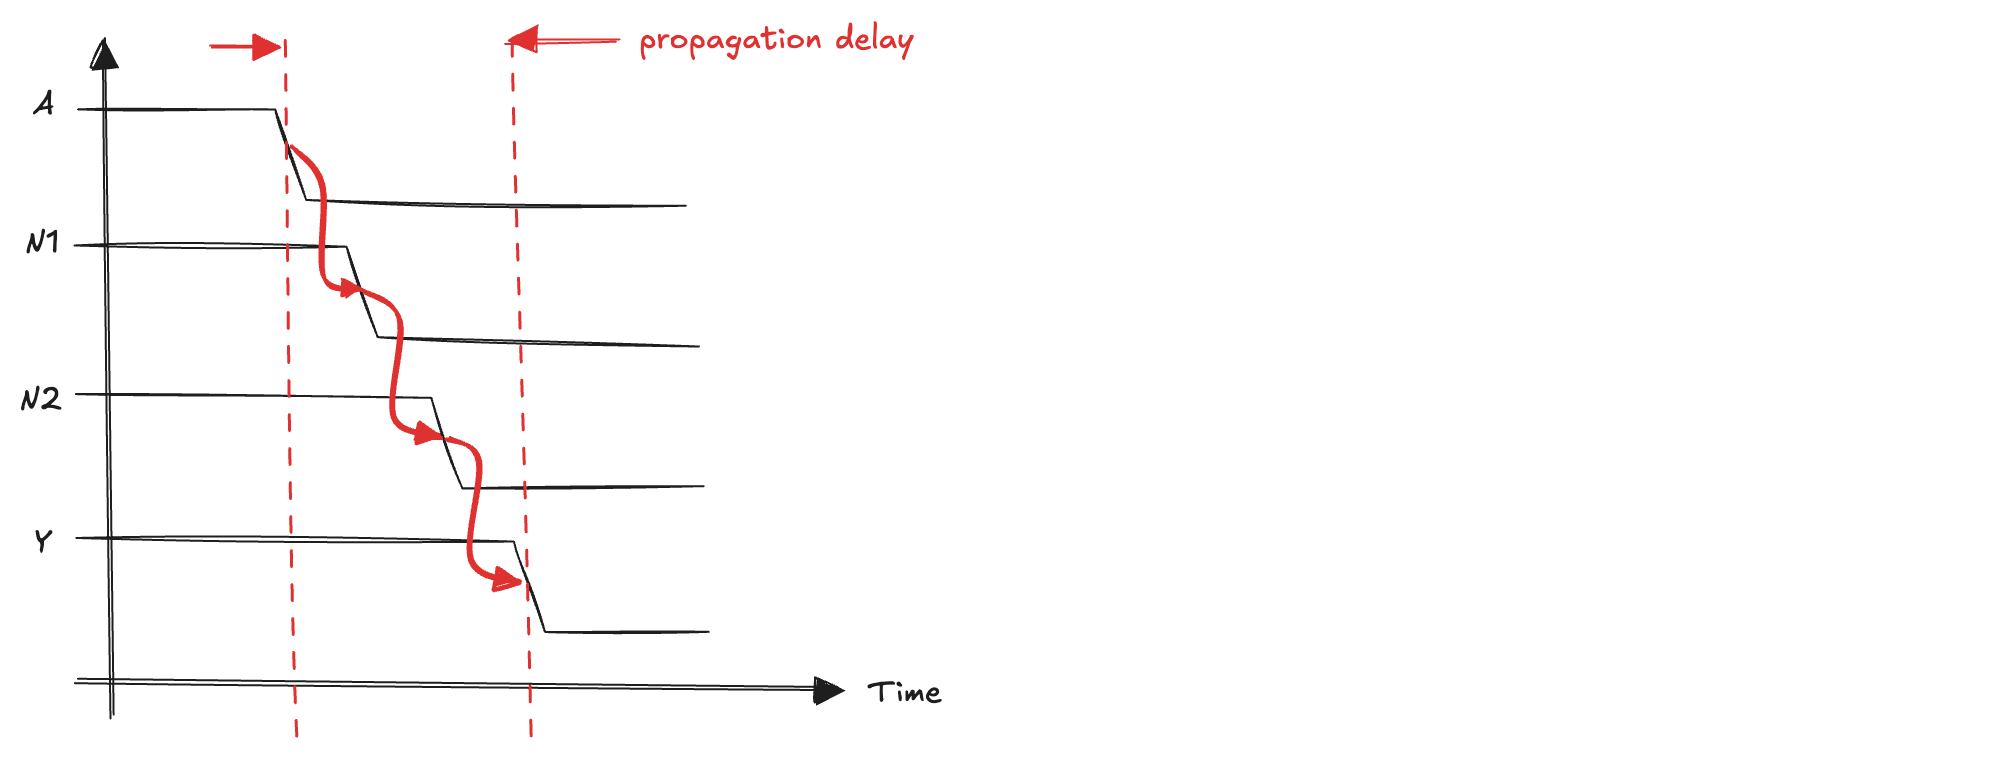

$\displaystyle t_{pd} = t_{pd,AND} + t_{pd,OR} + t_{pd,AND}$

This cumulative delay represents the worst-case situation: the longest time we must wait to guarantee that the output reflects a change at the input.

In contrast, the **short path** in a circuit is the **shortest** or **fastest** path from input to output. A signal travelling along this path encounters the minimum number of gates and therefore reaches the output more quickly than through any other route. The short path is important because it determines the **contamination delay** of the circuit. Just as with the propagation delay, the contamination delay of the circuit is computed as the sum of the contamination delays of the elements along the shortest path. For instance, in the exampkle the short path includes only a single AND gate: 

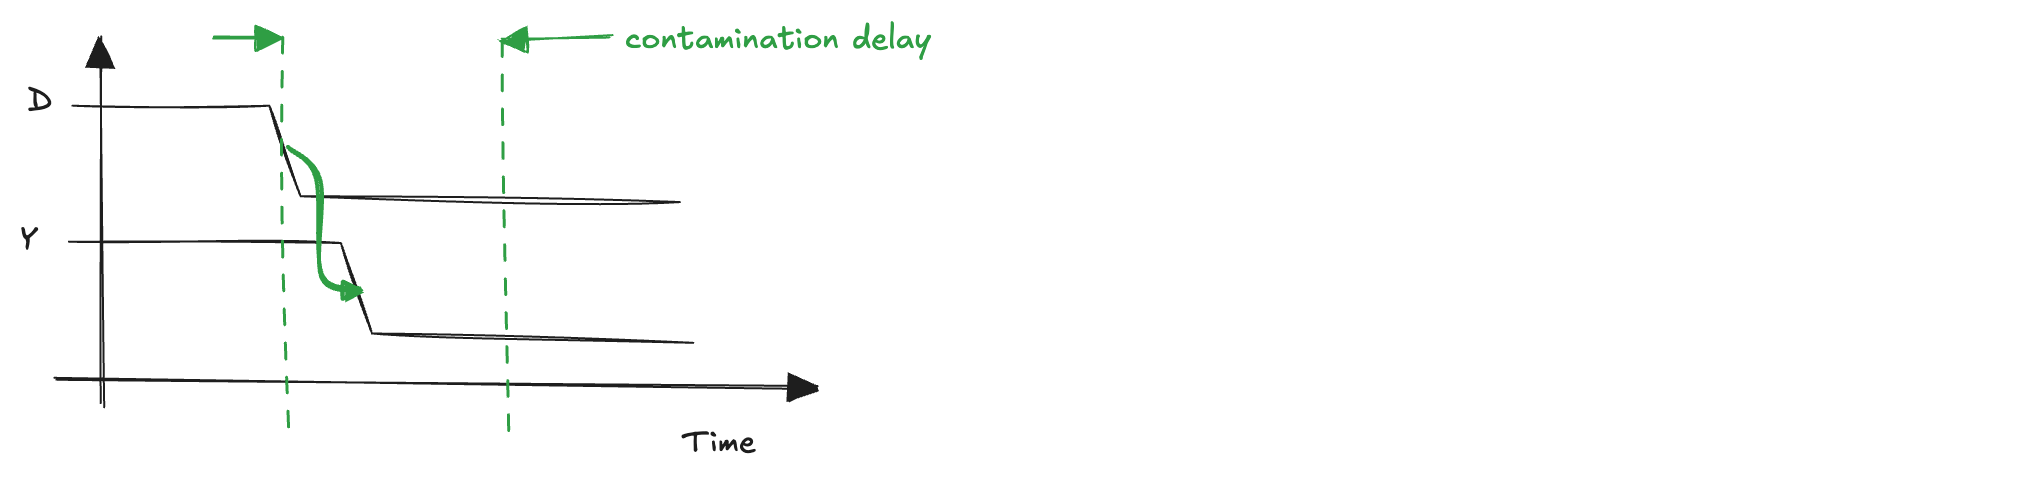

$\displaystyle t_{cd} = t_{cd,AND}$

The timing diagrams associated with these paths help visualize how signals propagate through multi-stage logic. In the diagram illustrating the critical path, the input transition triggers a series of delayed transitions through intermediate nodes (N1 and N2 in the example), each step adding its own delay, until the final output settles. The total span of this chain corresponds to the propagation delay of the circuit. Conversely, the diagram for the short path shows a much quicker response: the output begins to change only after the minimum contamination delay has passed, reflecting the behaviour of the fastest possible route through the network.

As an example, consider the following circuit:

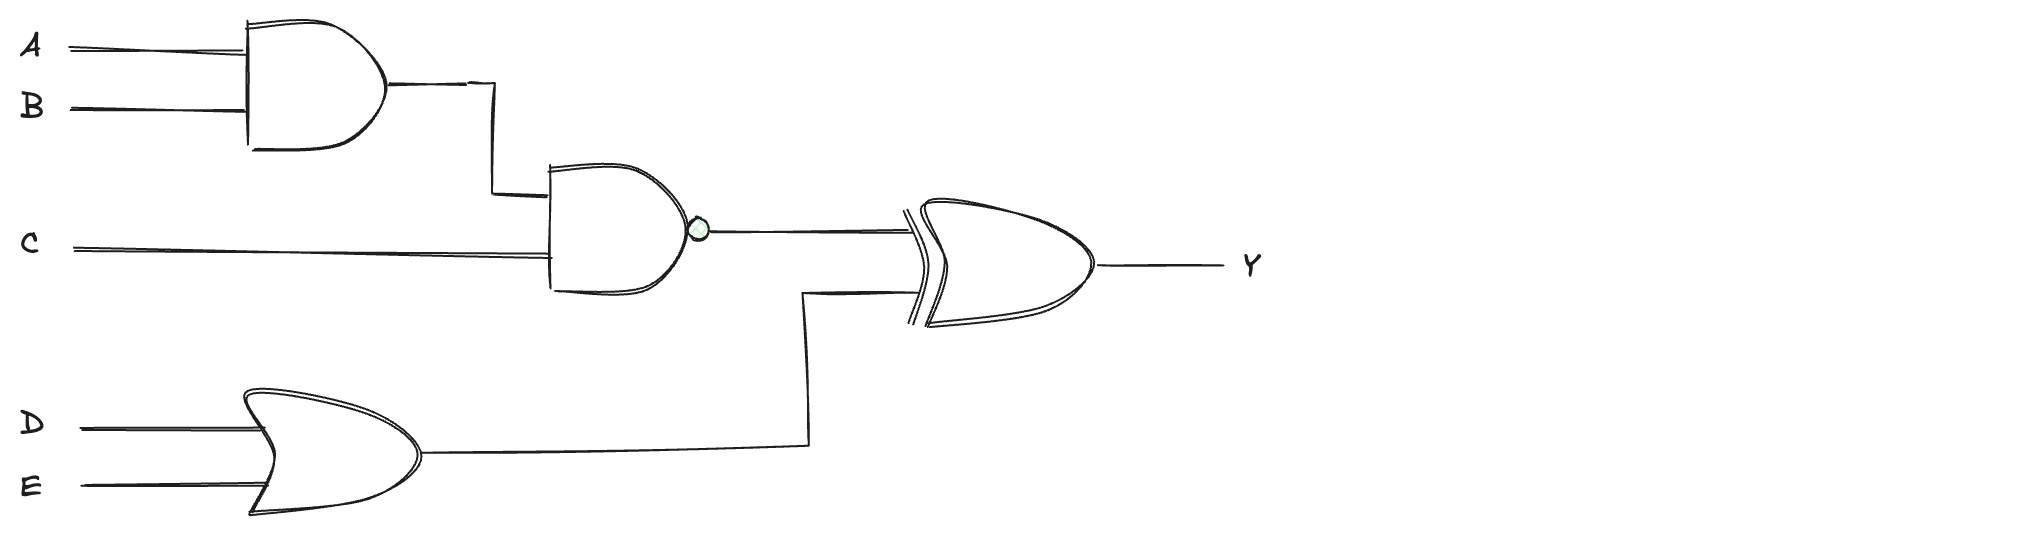

According to the datasheets, every gate in the circuit exhibits a propagation delay of 100 picoseconds and a contamination delay of 60 picoseconds. These values apply uniformly to all gates, regardless of their type. Our goal is therefore to trace the possible signal paths from each input to the output and sum the appropriate delays along those paths.

The longest route is taken by changes on inputs A or B. A transition on either of these inputs passes first through an AND gate, then through a second gate, and finally through the OR gate that produces the output Y. Since this path includes three gates in sequence, the total propagation delay is simply the sum of the propagation delays of these three stages:

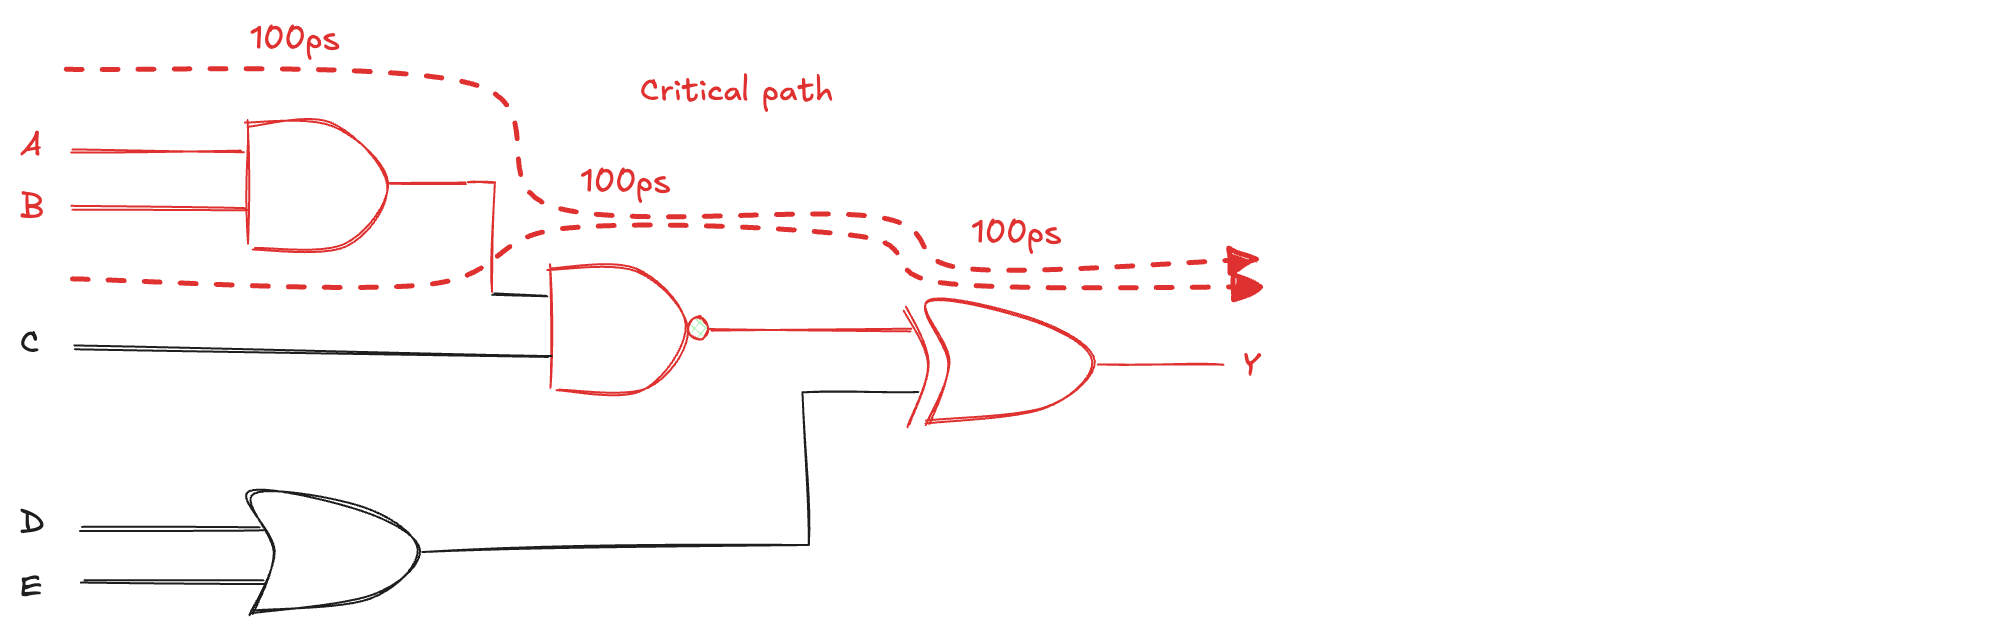

$\displaystyle t_{pd} = t_{pd,AND} + t_{pd,NAND} + t_{pd,XOR} = 100 + 100 + 100 = 300 \text{ picoseconds}$

A change on inputs C, D, or E reaches the output through only two gates. For example, a transition on C travels through the middle gate and then the final OR gate, and similarly a transition on D or E goes through the lower OR gate followed by the output stage. In all cases this route consists of exactly two gates:

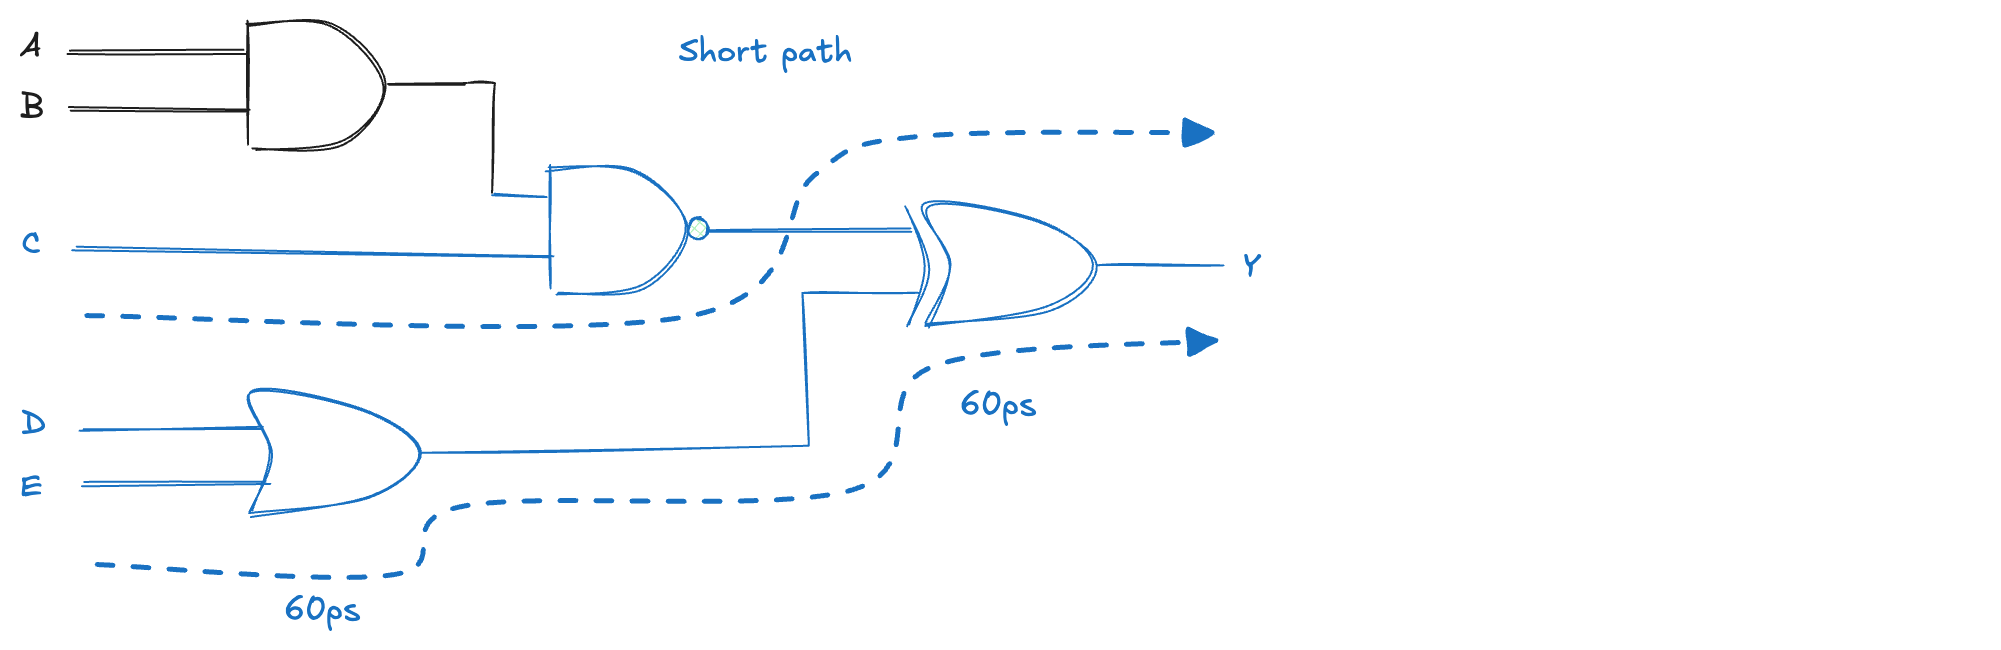

$\displaystyle t_{cd} = t_{cd,OR} + t_{cd,XOR} = 60 + 60 = 120 \text{ picoseconds}$

This example illustrates the general method for timing analysis in combinational circuits: identify the longest path to compute the propagation delay, identify the shortest path to compute the contamination delay, and use the individual gate delays supplied by the manufacturer to determine the overall timing behaviour. Be careful, because when individual gates have different propagation and contamination delays, the critical path and the short path **do not necessarily correspond to the paths with the greatest or smallest number of gates**. A path with fewer stages may still be slower if it contains gates with larger delays, and similarly a longer path may turn out to be the fastest if its gates are quicker.

Understanding both the critical path and the short path is essential for designing reliable digital systems. **The longest path limits the maximum operating speed**, while **the shortest path affects hazards, glitches, and certain timing checks in synchronous circuits**. Together, they form the foundation for timing analysis in combinational and sequential digital design.

### Control-critical and Data-critical circuits

When analysing timing in combinational circuits, it is important to recognize that **not all critical paths are of the same nature**. In many designs, the signal that determines the overall speed constraint is not merely a data signal flowing through the datapath; it can also be a **control signal** that determines which data is selected, enabled, or combined. For this reason, we distinguish between **control-critical** and **data-critical** circuits.

A circuit is said to be **control-critical** when the slowest path from any input to the output originates from the control signals. Control inputs such as select lines, enables, or mode bits may pass through several levels of logic before they influence the output. If control signals arrive later than the associated data signals, the output must wait for the control path to settle. In these situations, the design that minimizes the control delay is preferable, because speeding up the datapath provides no benefit if the output is still limited by a slow control transition.

Conversely, a circuit is **data-critical** when the slowest path begins at the data inputs. Here, the critical path runs through the portion of the circuit that processes or combines the actual data values. If the control signals arrive earlier, the controlling logic becomes ready quickly, and the output timing is determined entirely by how long the data takes to propagate through its gates. In such a case, reducing the data delay is the key priority, since optimizing the control path would not improve overall performance.

To illustrate these ideas, consider the two alternative implementations of a four-input multiplexer using a technology with known gate delays:

| Gate                      | $t_{pd}$ (ps) |
|---------------------------|---------------|
| NOT                       | 30            |
| 2-input AND               | 60            |
| 3-input AND               | 80            |
| 4-input OR                | 90            |
| Tristate (A to Y)         | 50            |
| Tristate (Enable to Y)    | 35            |

The first design is a two-level logic implementation built from AND, OR, and inverter gates. 

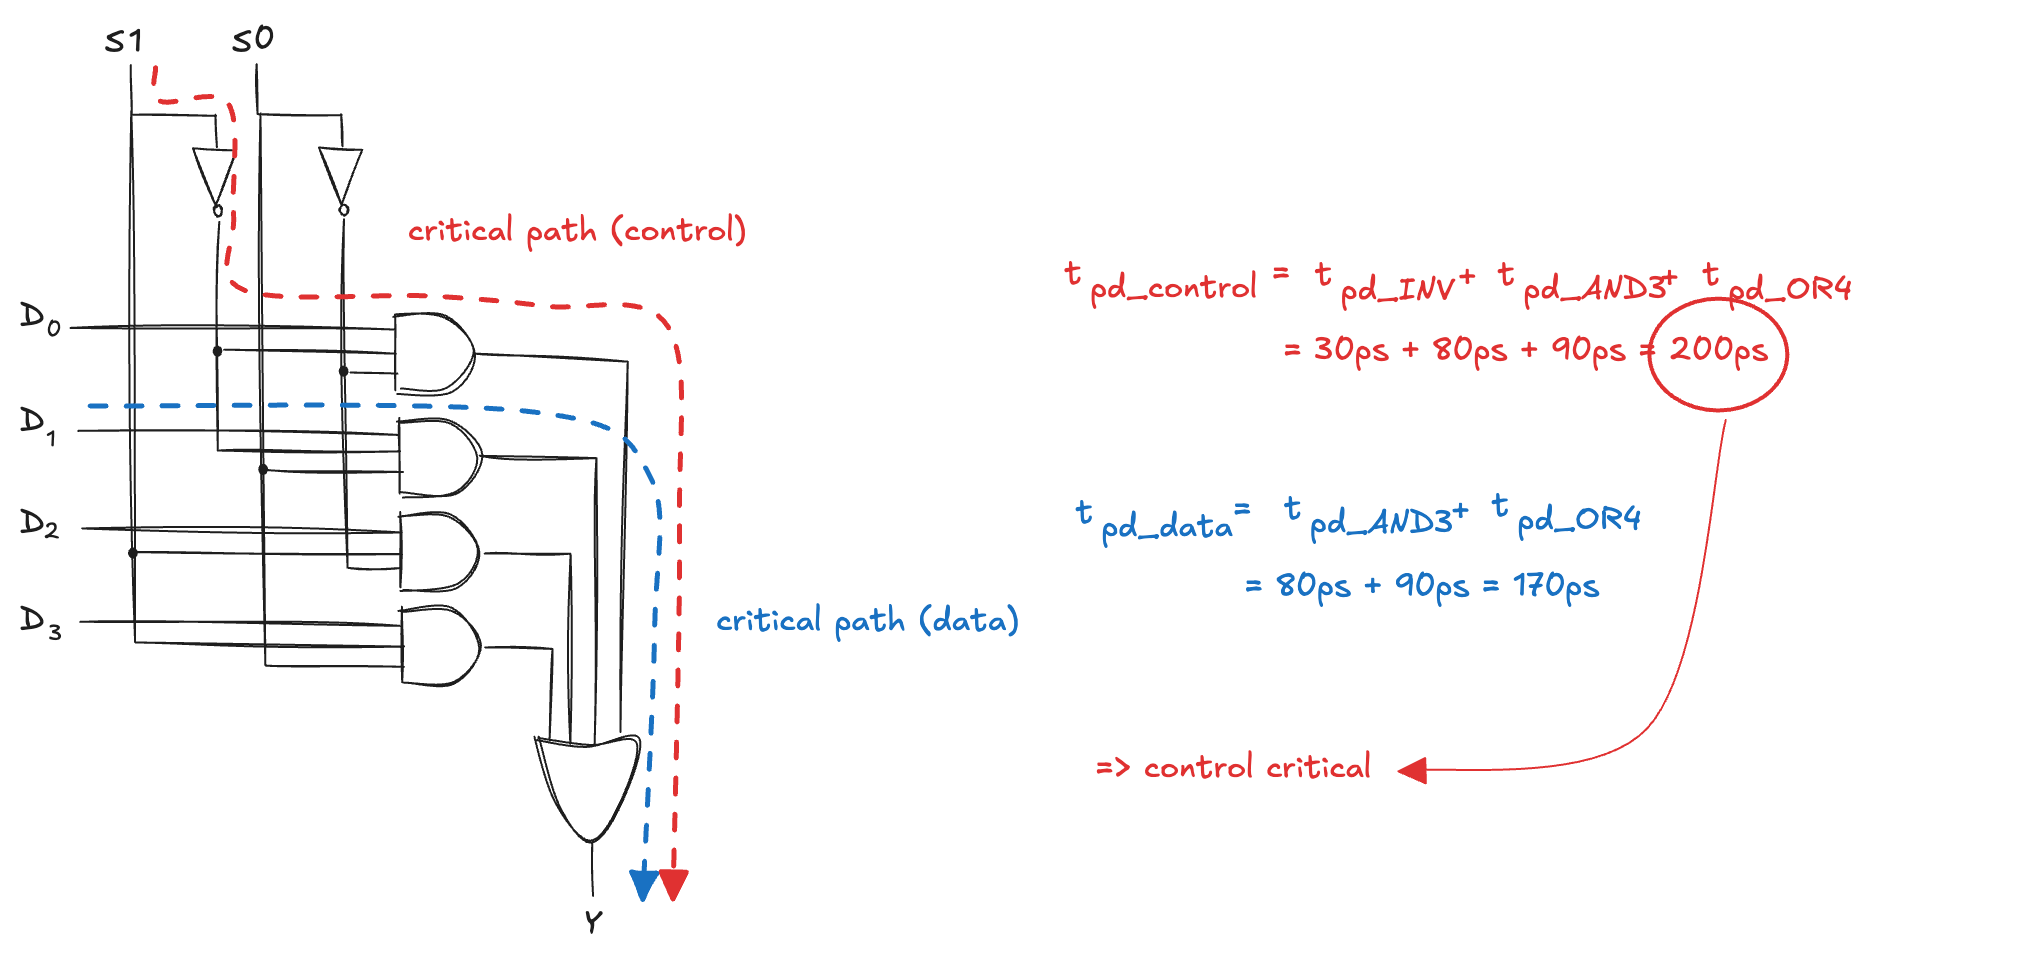

The control lines S1 and S0 must propagate through an inverter, then through a three-input AND gate, and finally through a four-input OR gate before influencing the output. Summing the individual delays provided in the datasheet gives a control-path delay of about 200 ps. The data inputs, by contrast, pass through fewer gates—only a three-input AND followed by the four-input OR—resulting in a data delay of roughly 170 ps. Since the control path is slower, this design is **control-critical**.

The second design uses multiplexer logic built from **tri-state buffers**. A tri-state buffer is a digital device that outputs a 0 or 1 when enabled, but enters a high-impedance state when disabled, effectively disconnecting itself from the circuit so multiple components can safely share the same signal line. 

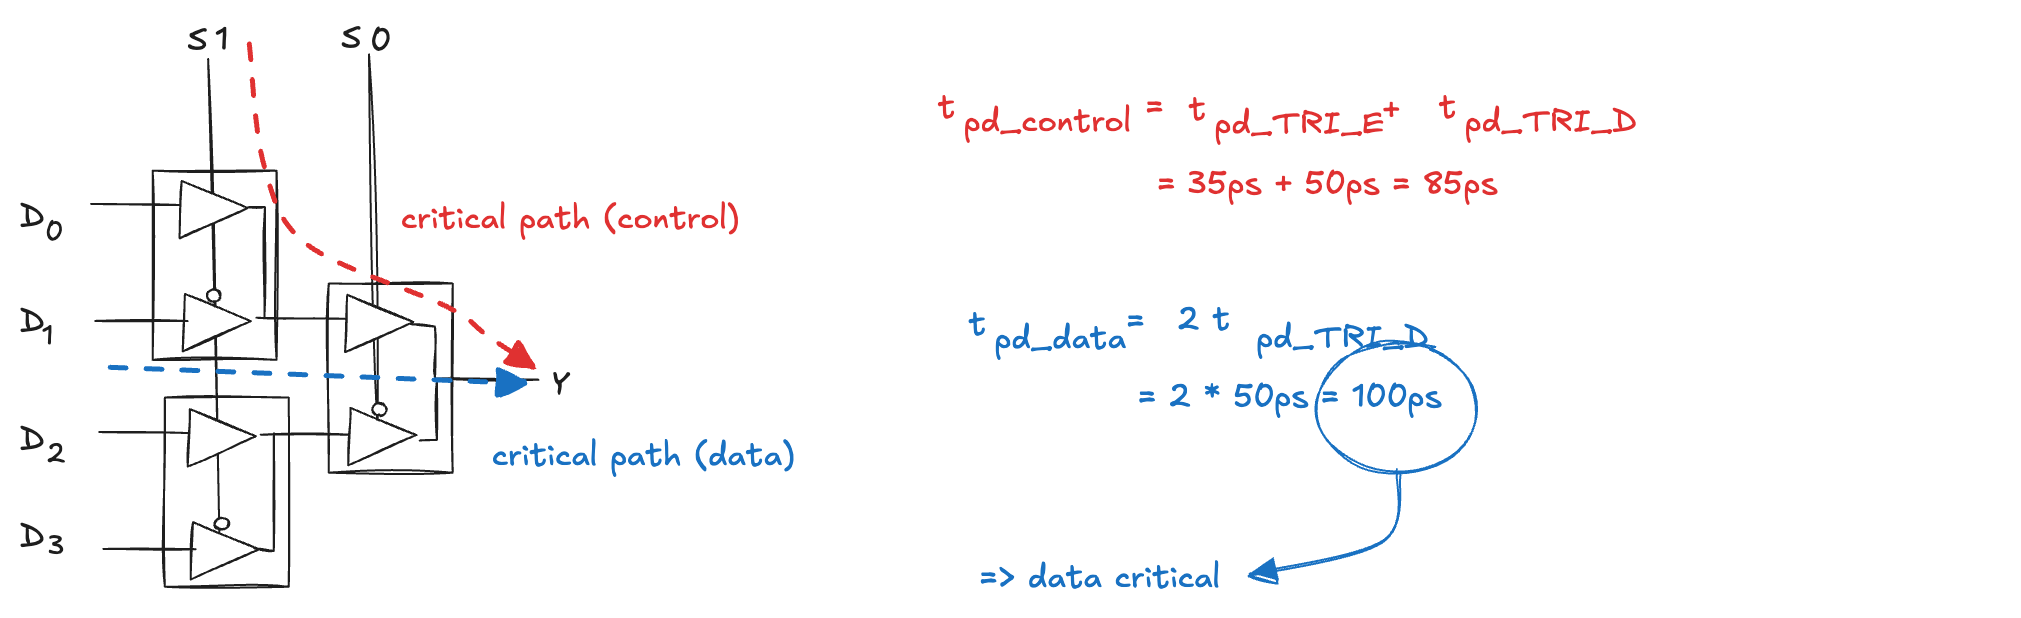

In this structure, the control signals enable the appropriate tri-state driver and then pass through an additional tri-state stage before reaching the output. The total control delay in this implementation is around 85ps, while the data path includes two tri-state elements in series, giving a longer data delay of about 100ps. Here, the slowest signal originates from the data inputs, not the control signals, meaning the design is **data-critical**.

These two examples demonstrate that the choice between logic-level implementations and multiplexer-based versions is not determined solely by correctness but by which timing behaviour better matches the requirements of the system. Depending on whether control or data signals are expected to arrive first, one implementation may offer a significant advantage. Ultimately, the best design is the one that balances timing with power consumption, cost, and the availability of components.

### Hazards and Glitches

Even when a logic function is correct and its Boolean expression is perfectly minimized, the physical circuit may still behave unexpectedly during input transitions. This happens because the implementation is subject to real propagation delays, and these delays can differ along the various paths that connect the inputs to the output. When such differences exist, the circuit may be susceptible to a **potential timing problem** called a **hazard**: it indicates that, during an input change, the internal signals might not switch in a coordinated way, creating the conditions for an incorrect output. If this potential problem actually manifests, we observe a **physical, temporary incorrect output pulse** called **glitch** produced when the circuit momentarily evaluates to the wrong value before settling to the correct one. In other words, the **hazard is the risk**, and the **glitch is the observable effect** of that risk materializing. Consider the following example:

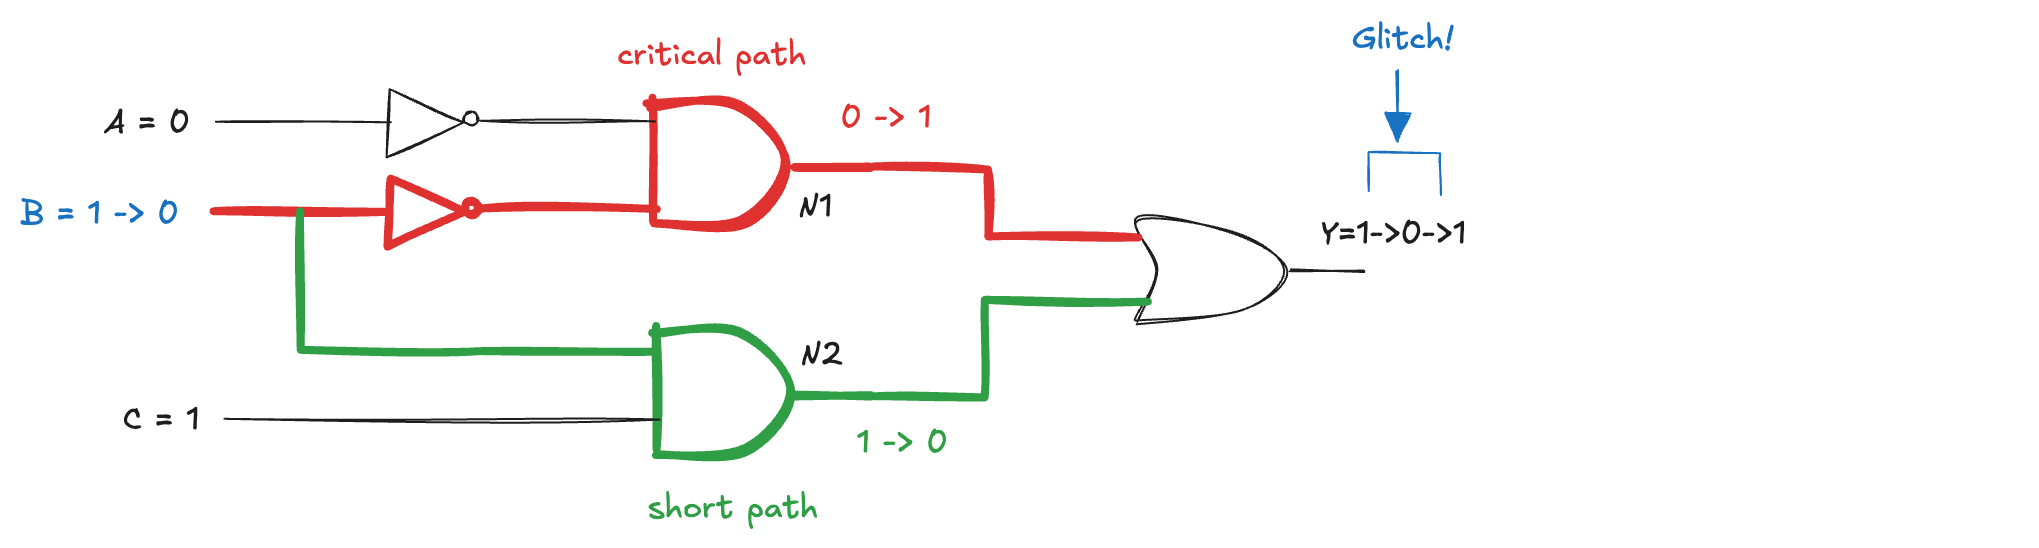

When input B transitions from 1 to 0, the circuit contains two distinct paths to the output: one long and slow, the other short and fast. Because the short path responds first, the output briefly drops to 0. Only later does the slower signal arrive and restore the correct value of 1. This unwanted 1-0-1 pulse is the glitch, and it occurs because the mismatch in path delays created an hazard condition. 

The timing diagram highlights how the internal nodes N1 and N2 respond at different times, and how their mismatch briefly forces the output into an incorrect state:

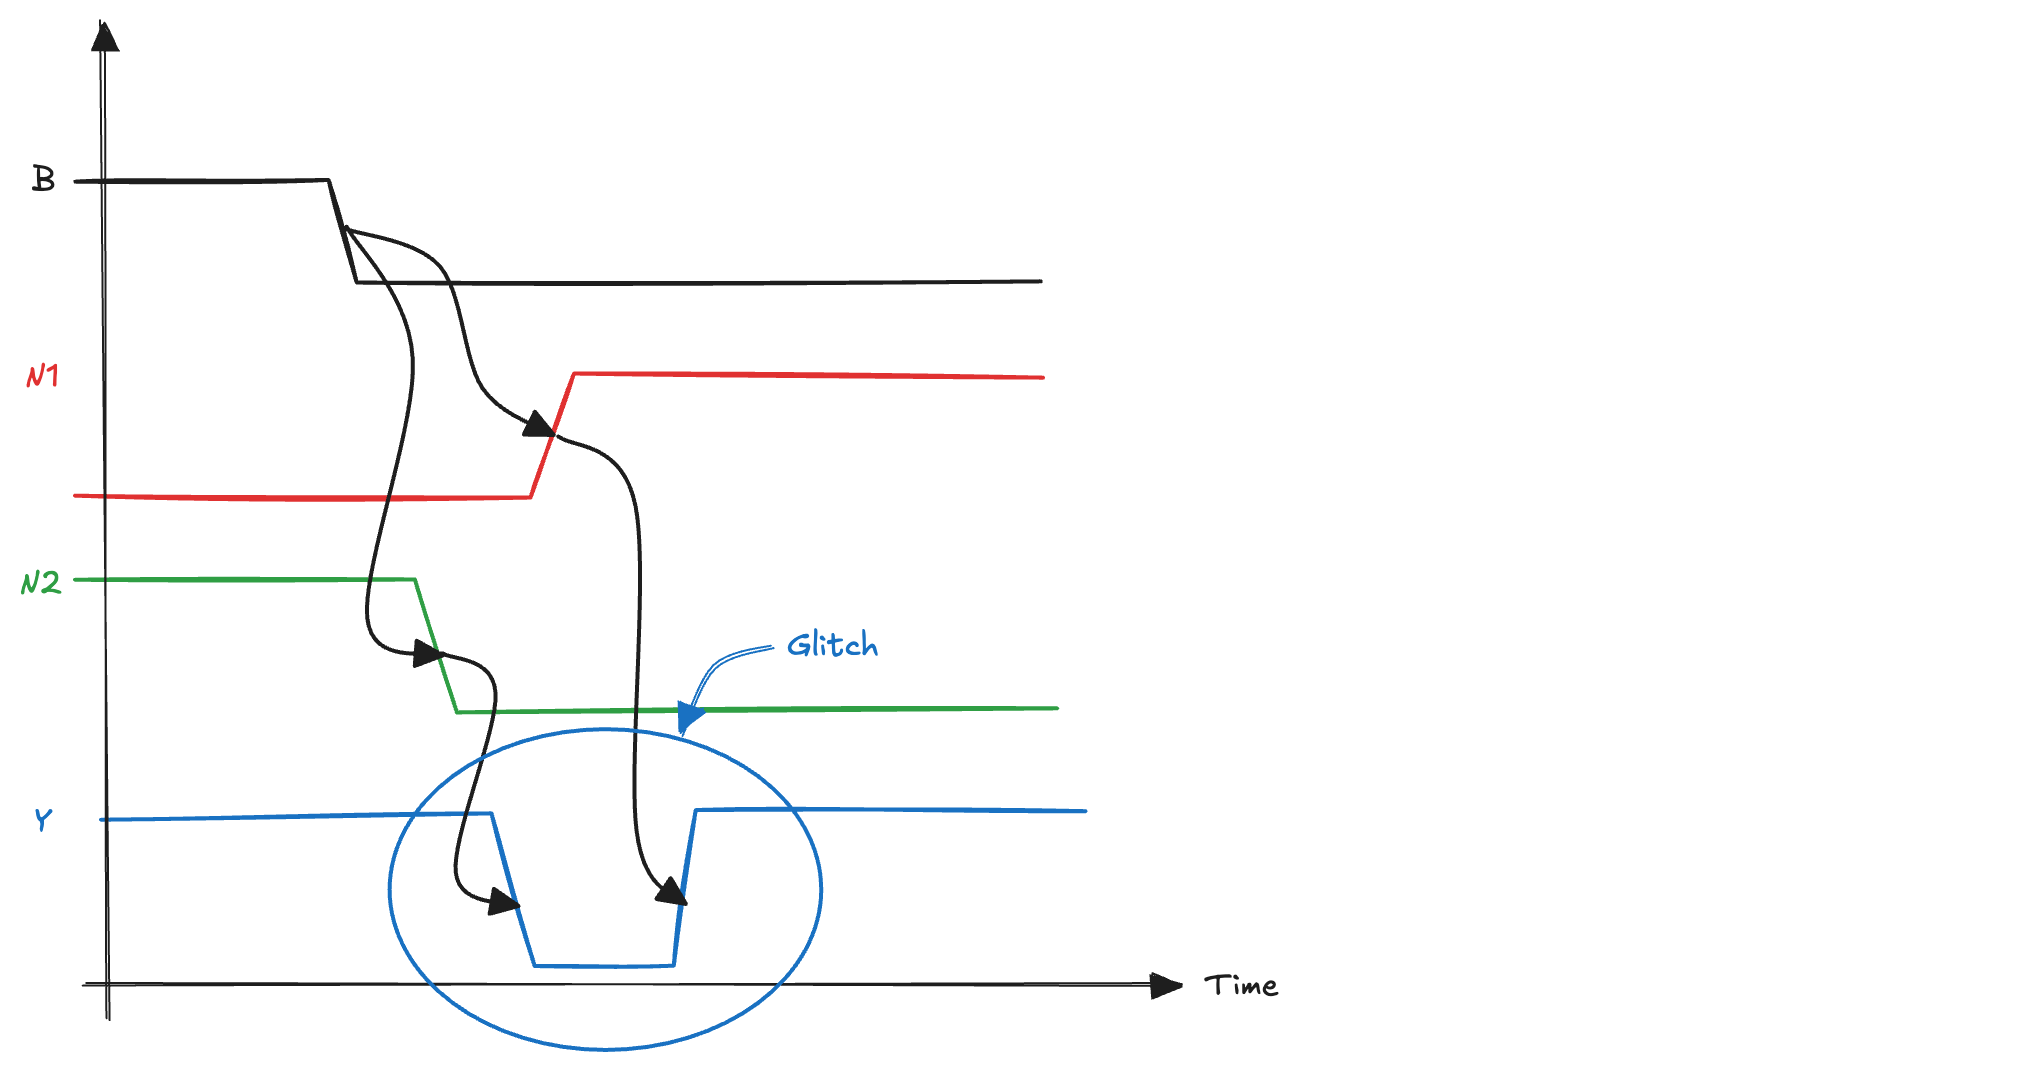

The presence of glitches is not just a theoretical possibility; they can be directly observed when using a simulator that models propagation delays. The DEEDS simulator, for example, assigns a finite propagation delay to each logic gate (nanoseconds by default). This means that when an input changes, the output of the gate does not update immediately but only after the specified delay has elapsed. 

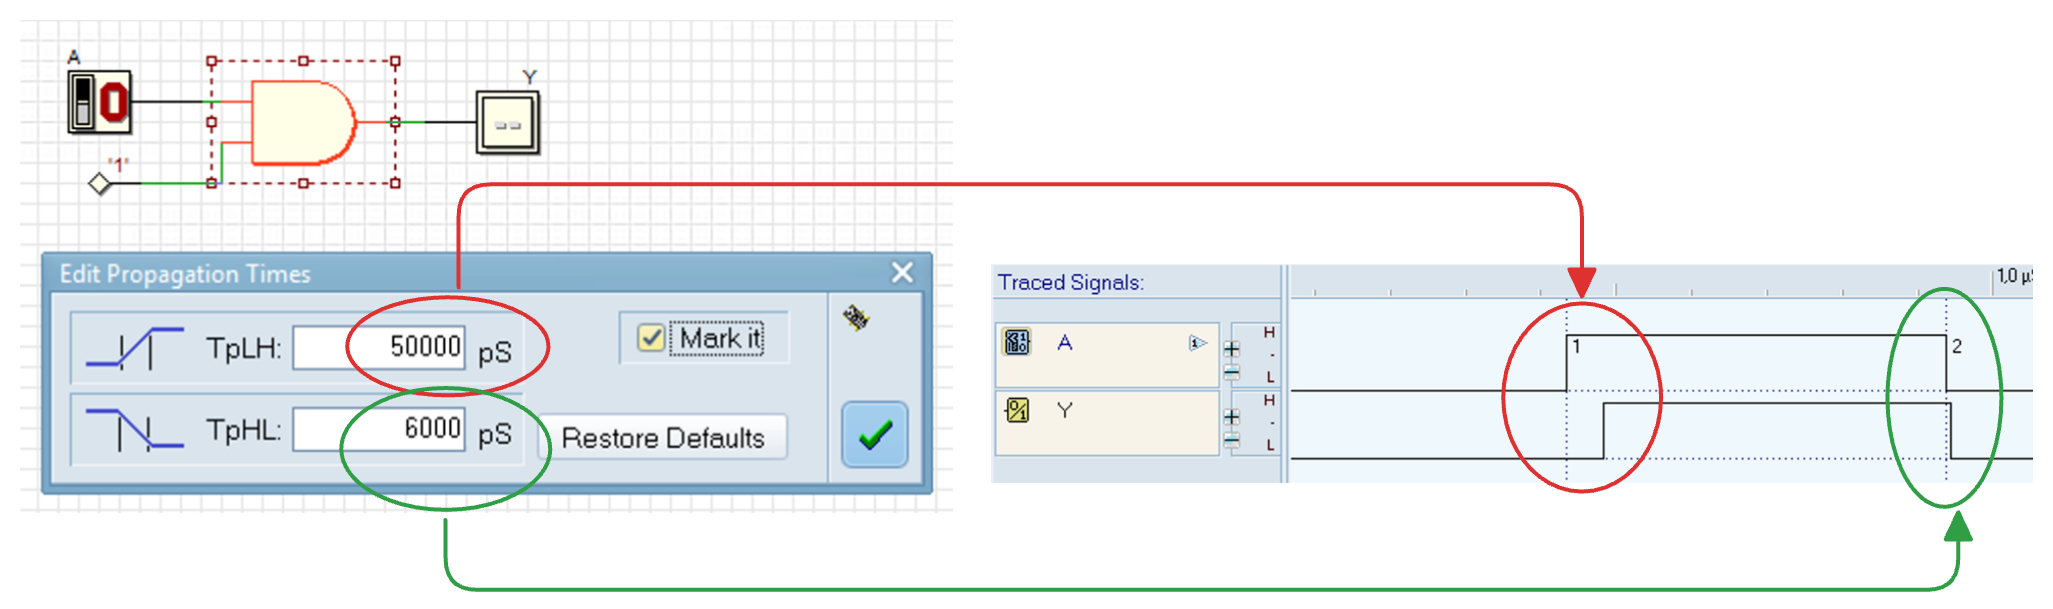


As soon as we introduce these realistic timing characteristics into our circuit, hazards in the logic can turn into visible glitches on the waveform display. We can observe demonstrates the subtle glitch phenomenon discussed in the previous circuit by simulating it in DEEDS:

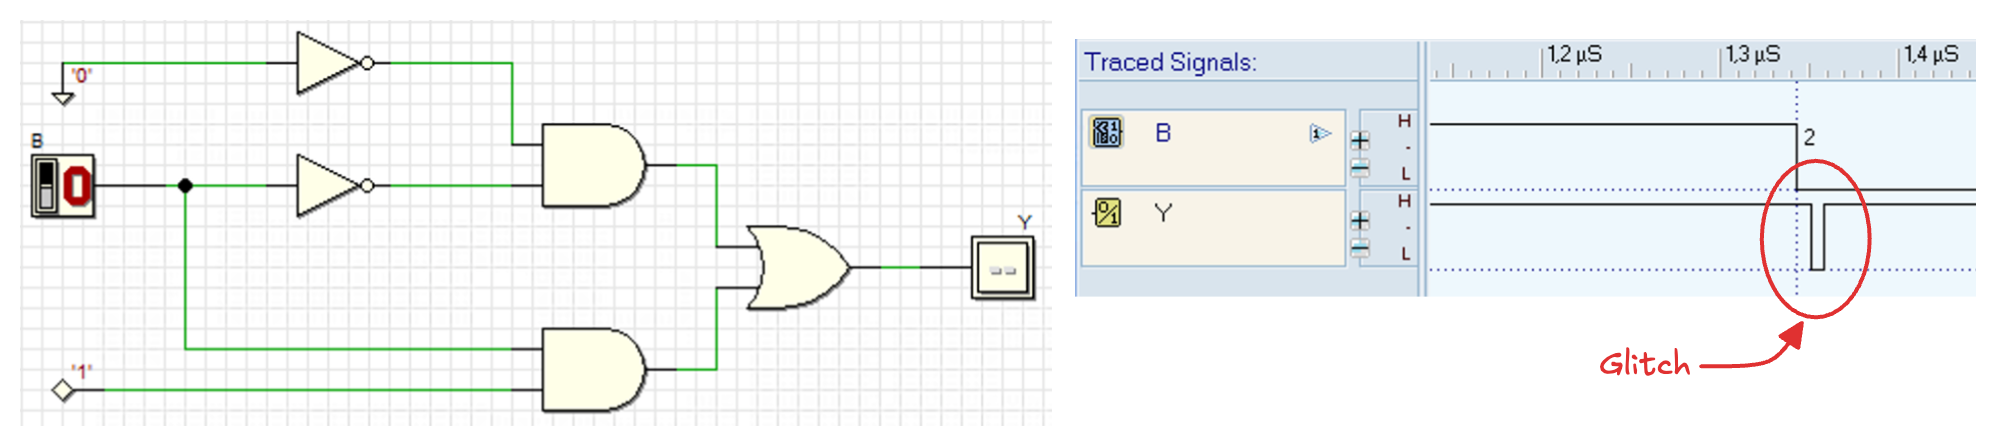

If we zoom into the waveform, DEEDS clearly shows this temporary incorrect pulseappearing at the output. Notice that **glitches are not artifacts of simulation but inherent consequences of unequal path delays in real hardware**. A simulator that faithfully models propagation delays will expose these effects exactly as they would occur in an actual digital circuit. 

Hazards can also be predicted from a Boolean perspective. In a Karnaugh map, a transition that crosses the boundary between two prime implicants may leave the output momentarily uncovered:

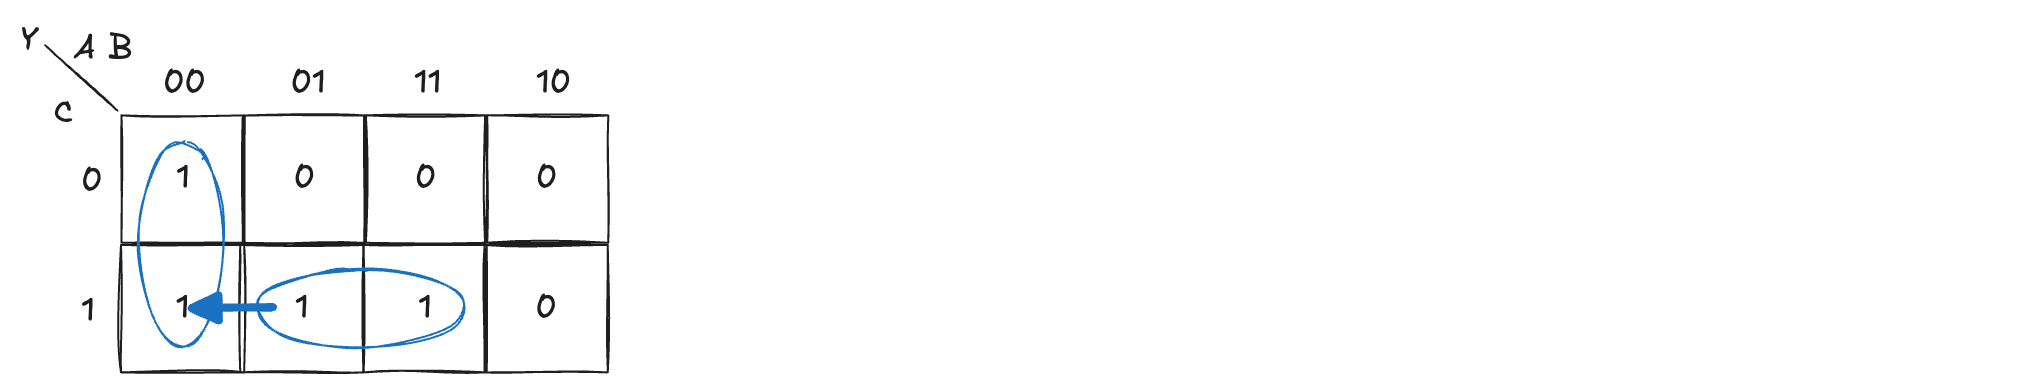

This uncovered region corresponds to a **static hazard**: the output is intended to remain constant during the transition, but the circuit may briefly produce a wrong value, creating a glitch. 

A common technique for removing hazards, and therefore preventing glitches, is to add **redundant implicants** to the Boolean expression. By adding an extra grouping in the Karnaugh map that covers the boundary between two prime implicants, we ensure that the output remains covered during the input transition:

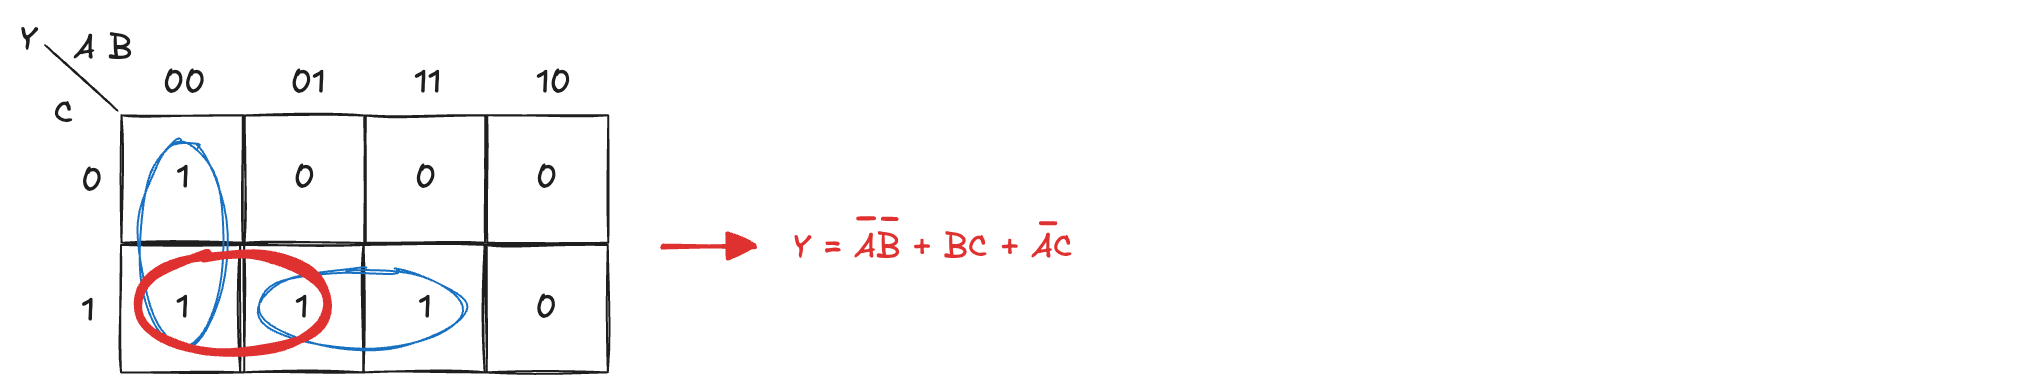

This eliminates the hazard and guarantees that no incorrect momentary value is produced. The cost, however, is additional hardware: more logic gates are required to implement the redundant term, increasing area and possibly power consumption.

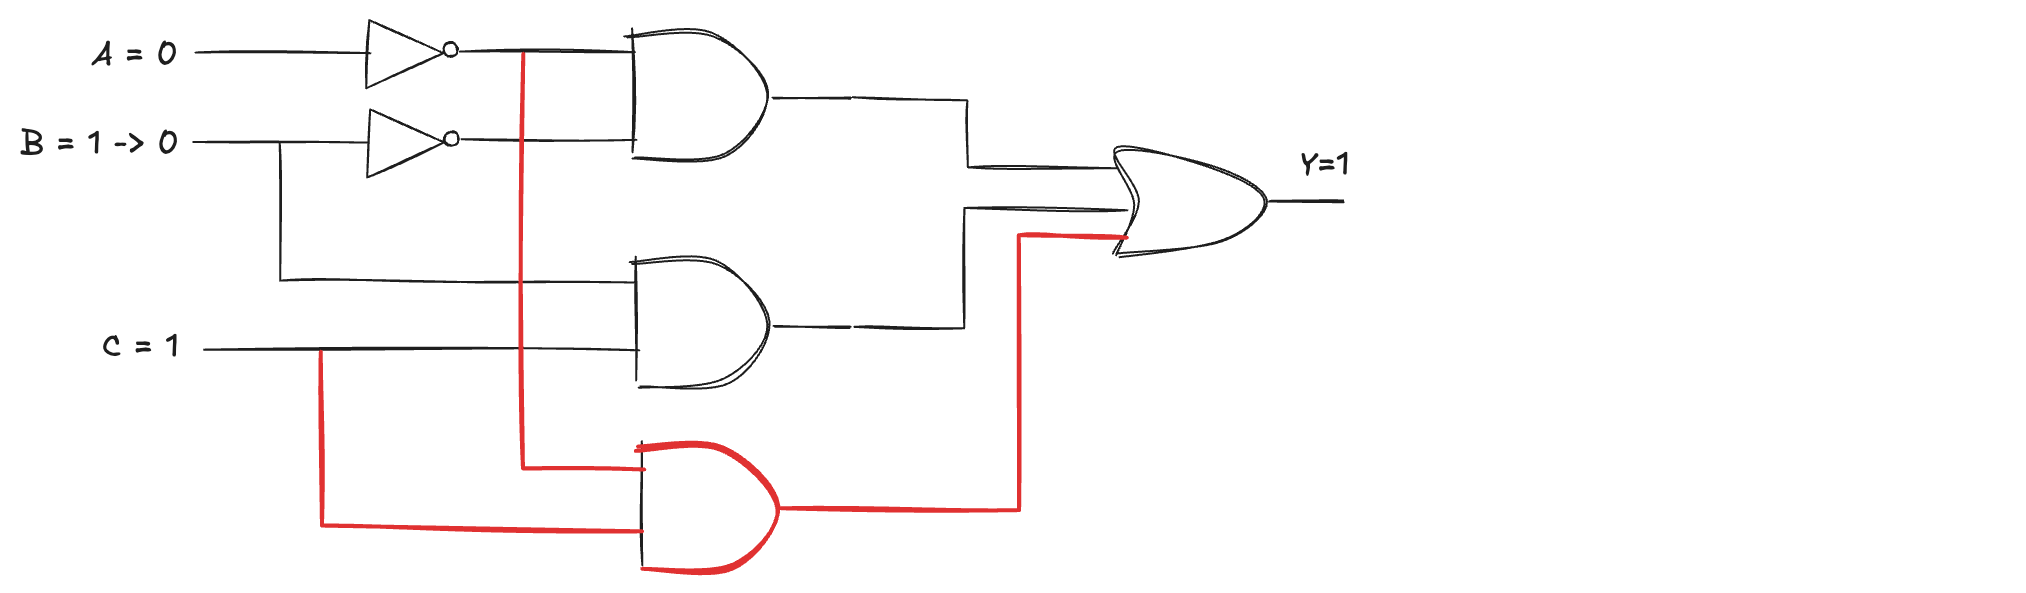

Even though adding redundant implicants can eliminate **static hazards**, this technique has a fundamental limitation: it cannot prevent glitches that occur when **more than one input changes at nearly the same time**. These are known as **dynamic hazards**, and they arise from the physical reality that signals **in a real circuit never change perfectly simultaneously**. To understand why, imagine two inputs that are supposed to change at the same instant. On a whiteboard or in a Boolean equation, we treat both transitions as happening together. But in an actual electronic circuit, one input will always change slightly earlier than the other (maybe only a few picoseconds earlier, but still earlier). During that tiny interval, the circuit briefly sees a combination of input values that "should not" exist according to the ideal Boolean abstraction. The circuit reacts to this temporary, unintended combination of inputs by producing a momentary wrong output value (a glitch). And because this glitch comes from two or more inputs moving at once, no amount of adding redundant implicants can guarantee eliminating it. 

This leads to a pragmatic engineering observation: glitches are not rare anomalies, they are an inherent part of combinational logic. Designers must therefore accept that glitches are a **fact of life**. The point is not to remove every possible glitch, which is often impractical, but rather to **be aware** that they exist and to design systems that do not depend on glitch-free signals in situations where hazards matter. This awareness becomes particularly important when examining timing diagrams on a simulator or oscilloscope. What may appear to be an incorrect output is often just the natural behavior of a real combinational circuit responding to input changes. 

Fortunately, glitches do not always cause functional problems. In synchronous systems, the outputs of combinational blocks are typically **sampled only after adequate time has passed for all signals to settle**. As long as no other component reads the output during the short unstable interval, **the glitch is harmless**. Issues arise only when another circuit is sensitive to the transient behaviour, such as in asynchronous designs or when outputs directly control enable signals, resets, or other timing-critical operations.

### Wire delay

Up to this point, we have implicitly assumed that **wires behave as ideal, instantaneous connections**, simple equipotential conductors in which every point along the wire shares exactly the same voltage at any moment in time. This assumption works well for small circuits, short interconnects, and relatively slow signals, because in those cases the electrical behaviour of the wire does not significantly distort or delay the signal. However, **real wires do not transmit information instantaneously**. Instead, **signals propagate along them at a finite speed**, carried by electromagnetic waves that travel at a fraction of the speed of light.

In many practical digital systems, this propagation delay is small enough to be **safely ignored**. If a wire is **short compared to the physical scale of the circuit**, or if the signal **changes slowly enough** that its rise and fall times dominate the timing behaviour, then the wire delay contributes only a negligible amount. A common engineering rule-of-thumb is that if the propagation delay of the wire is less than **about 20%** of the signal’s rise or fall time, its effect is considered insignificant.

However, as the length of the wire increases, the assumptions of equipotential behaviour begin to break down. Long wires exhibit non-negligible **resistance** along their length and **capacitance** to surrounding conductors. Together, these effects slow down the propagation of a signal and smear out its edges. To capture this behaviour more accurately, we often replace the idealized wire with an **RC model** consisting of a chain of small resistors and capacitors distributed along the length of the line.

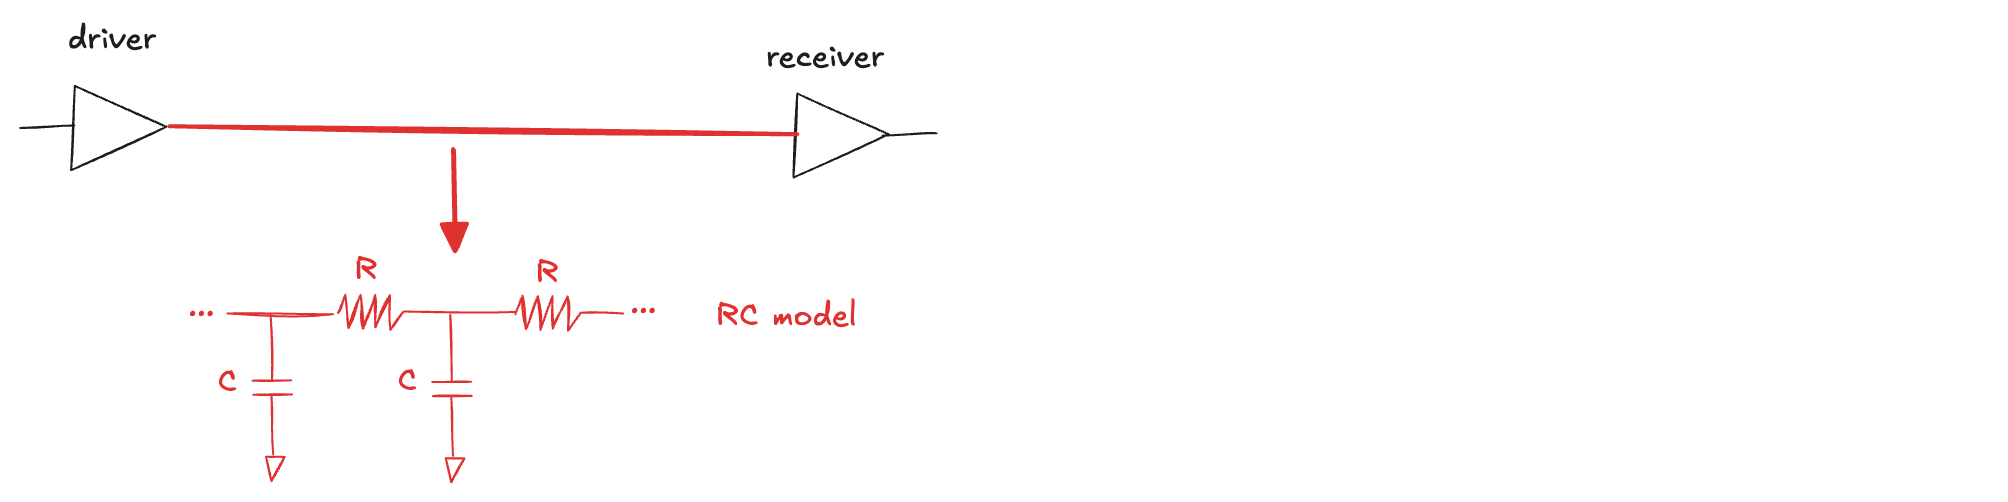

This distributed RC network acts as a low-pass filter, gradually attenuating and delaying fast transitions. The longer the wire, the larger the total resistance and capacitance, and the more pronounced the delay and distortion.

In extreme cases—when wires are very long or when signals switch extremely rapidly, the RC approximation is no longer sufficient. Under these conditions, the signal propagates as a **wave**, and the interconnect behaves like a **transmission line** rather than a simple conductor. Transmission-line behaviour introduces new phenomena: the voltage does not change simultaneously along the line but instead travels as a wavefront. If the line is not properly terminated, this wave can **reflect** at the ends, creating echoes and oscillations that cause noise, overshoot, undershoot, and other undesirable effects. These problems become especially important in high-speed designs such as microprocessors, FPGAs, and fast serial links, where even a few centimetres of wire may act as a significant transmission line.

Understanding these distinctions is crucial as digital design scales up in complexity and speed. While short wires can be treated as ideal connections, long or fast-switching wires demand more sophisticated models to ensure reliable signal integrity and correct timing behaviour across the entire circuit.

## Timing of Sequential Logic

Sequential circuits behave very differently from purely combinational ones because they rely on memory elements (typically flip-flops) to store information from one clock cycle to the next. A flip-flop samples its input D at a specific moment in time, usually on the rising edge of the clock, and transfers that value to its output Q. If the input is stable (clearly a 0 or clearly a 1) at the instant the clock rises, the flip-flop’s behaviour is straightforward and predictable.

The difficulty arises when the input signal is changing at the exact moment the clock edge occurs. In such a case, the flip-flop cannot immediately determine whether the input should be interpreted as a 0 or a 1. The situation is similar to that faced by a camera attempting to take a snapshot of a moving object. For the picture to be sharp, the object must remain still for a short interval surrounding the moment the shutter opens. If the object moves during this interval, the captured image becomes blurred or undefined. Flip-flops have an analogous requirement: the input must remain steady for a certain period around the sampling edge for the device to produce a well-defined output. This interval is known as the **aperture time**. Just as a camera shutter has a brief open window, a flip-flop has a small time window centred on the clock edge during which the input must not change. The input must be stable for some minimum time **before** the clock edge, called the **setup time**, and must remain stable for some minimum time **after** the clock edge, called the **hold time**. Only when both constraints are satisfied can the flip-flop reliably capture the input and update its output correctly.

### Dynamic Discipline

Sequential circuits operate under a simple but powerful abstraction: we assume that the value of a signal A at the end of the n-th clock cycle A[n] is **all that matters**, rather than the precise, continuous-time behaviour A(t). This timing-based view of operation leads naturally to the abstraction of time into discrete units called **clock cycles**. We treat all activity within a clock cycle analogously to how we treat voltages in combinational logic: although signals may oscillate, glitch, or pass through intermediate values, what matters is only their final, stable value at the moment when the next clock edge arrives and sampling occurs. As long as the combinational logic between flip-flops settles before the next sampling instant, and the input signals obey setup and hold constraints, the sequential system behaves in a clean and predictable manner despite the underlying analog complexities.

As the **static discipline** guided our use of logic levels, ensuring that voltages always stayed within safe ranges representing clear 0s and 1s, sequential circuits introduce a complementary rule, the **dynamic discipline**, which governs **when** signals are allowed to change. The dynamic discipline requires that all inputs to sequential elements must change **outside** the aperture time, leaving the flip-flop undisturbed around the sampling moment. As a result, the clock period must be long enough to accommodate all propagation delays in the datapath. This requirement places **a fundamental limit on how fast a sequential system can run**: no matter how efficient the logic is, the clock cannot tick faster than the slowest signal path allows.

In an idealized world, every flip-flop in the system would receive the clock edge at precisely the same instant. In real hardware, however, the clock signal travels along wires of different lengths and through buffers of differing delays. This leads to **clock skew**, a phenomenon in which some flip-flops see the clock edge slightly earlier or later than others. Clock skew effectively reduces the amount of time available for signals to propagate within a clock cycle, meaning the designer must choose **a clock period that is even longer than what would be required by pure combinational delay alone**.

There are situations, especially when interacting with unpredictable external inputs, where it becomes impossible to fully satisfy the **dynamic discipline**. Consider a circuit whose input comes from a mechanical pushbutton. A user pressing the button might do so at an arbitrary moment, and this moment may coincide almost perfectly with a rising clock edge. In such a case, the flip-flop is forced to sample an input that is actively changing. Because it cannot cleanly interpret the voltage as either a valid 0 or a valid 1, the flip-flop may enter a special, problematic state known as **metastability**, a condition in which the internal circuits of the flip-flop fail to resolve the input to a valid logic level. Instead of settling quickly to 0 or 1, the output may hover at an intermediate voltage for an unpredictable amount of time before finally deciding. In theory, this resolution time can be arbitrarily long; in practice, it may last long enough to cause downstream logic to behave incorrectly. Metastability is not a design flaw, it is a direct consequence of the physics of bistable circuits when they are asked to make a decision under ambiguous conditions.

The dynamic discipline therefore tells us not only how sequential circuits should behave in the abstract model, but also reminds us of the physical constraints that limit their reliability. Managing propagation delays, accounting for clock skew, and designing proper synchronization circuits for external inputs are all essential strategies for ensuring that the system stays within the bounds of this discipline and operates predictably from one clock cycle to the next.

### Aperture Time

In order for a flip-flop to operate reliably, both its input and its output must respect certain timing constraints. These constraints are part of what manufacturers specify for each sequential element, and they define how the circuit must behave for the model of synchronous digital design to remain valid. The timing requirements concern what happens immediately around the active clock edge, the moment when the flip-flop samples its input and potentially updates its output.

Let us begin with the input. A flip-flop cannot correctly capture a value that is changing at the exact moment the clock edge occurs. Instead, the input must be stable for a short period of time before the rising edge of the clock; this interval is called the **setup time**. During setup time, the input must already have reached its intended value, ensuring that the flip-flop sees a clean and unambiguous 0 or 1 as sampling approaches. The input must then remain stable for a further window of time after the clock edge. This second interval is known as the **hold time**. Together, the setup and hold intervals form the **aperture time**, the total time during which the input must not change. If the input transitions anywhere within this aperture time, the flip-flop may behave unpredictably or even become metastable.

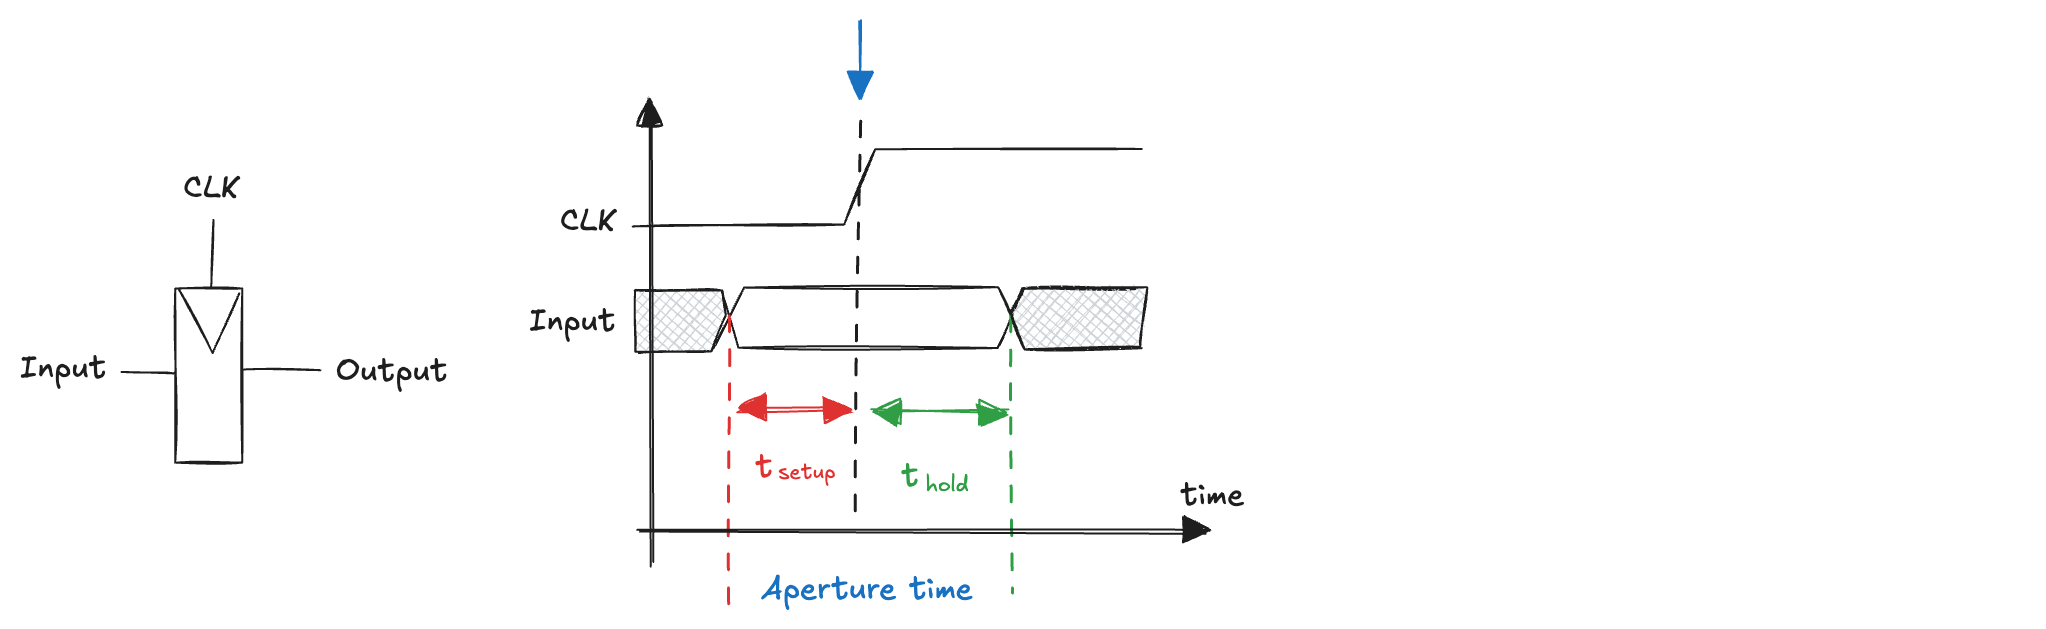

The diagrams illustrate this concept: the clock edge defines the centre of the aperture, while the input must remain flat across the entire region. Any transition within that region risks violating the dynamic discipline and corrupting the sampled value.

### Clock-to-Q Delays

Now consider the output of the flip-flop. The output does not update instantaneously at the moment of the clock edge. Instead, there are two important timing parameters that define how the output changes. The first is the **clock-to-Q contamination delay**, which is the earliest possible moment when the output might begin to move in response to the clock. This delay corresponds to the fastest internal paths within the flip-flop and represents the soonest time another circuit might see a change on Q. The second is the **clock-to-Q propagation delay**, which describes the latest time by which the output is guaranteed to have reached its final, stable value. This corresponds to the slowest internal paths that the flip-flop may take while updating the output.

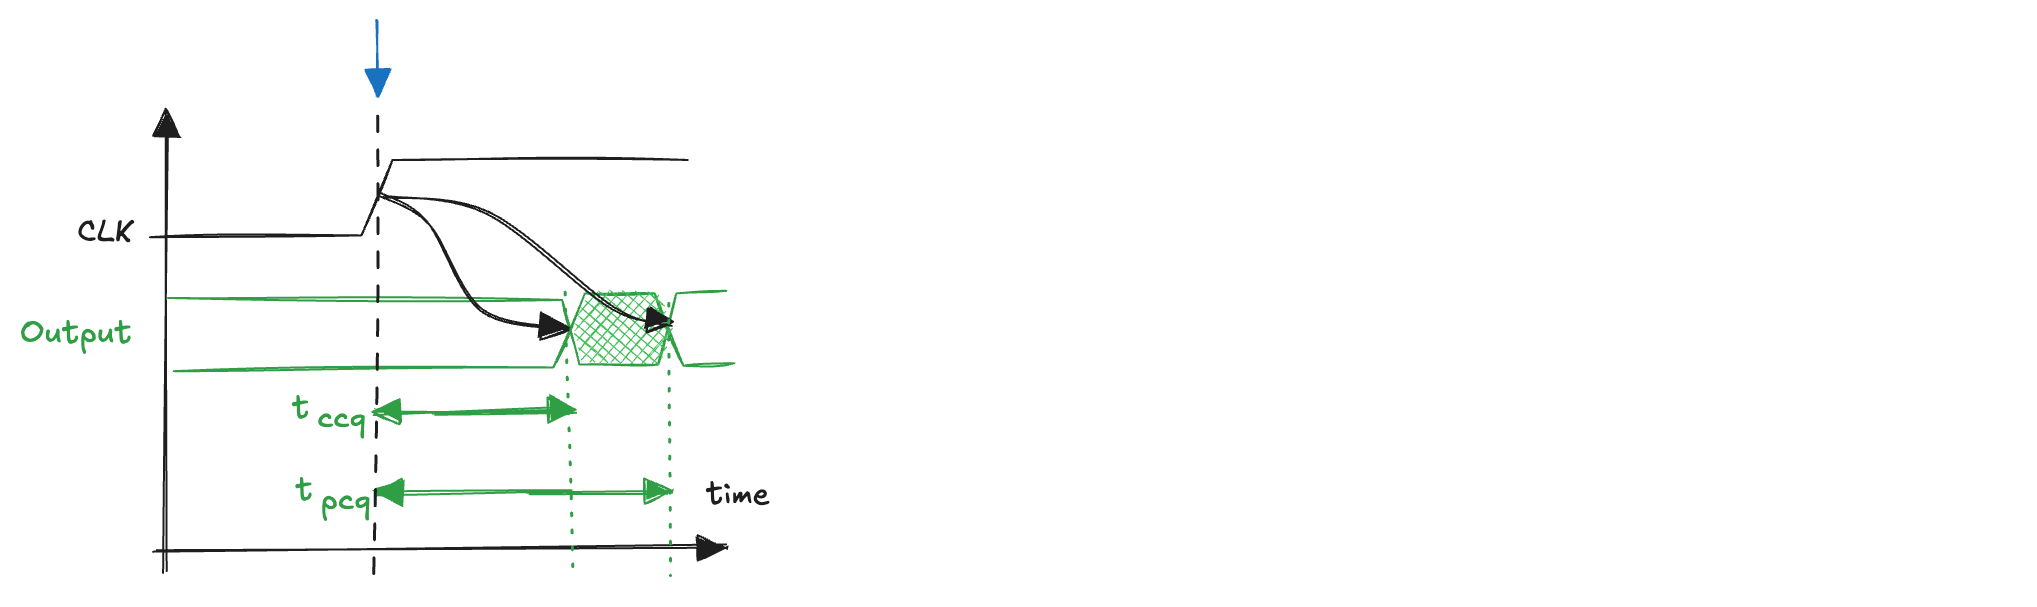

Just as contamination and propagation delays matter in combinational circuits, here they define the timing envelope within which the output transition occurs. The output may begin to rise or fall shortly after the clock, and it may take a short interval before settling, but the timing specifications guarantee that the correct value will appear no later than the propagation-delay bound. All downstream logic must be designed to tolerate this range.

Together, the input timing (setup and hold) and output timing (clock-to-Q delays) form the essential timing specification for a flip-flop. These parameters ensure that despite the analog nature of real circuits, we can treat sequential behaviour as a sequence of precisely sampled digital states (one stable state per clock cycle) maintaining the abstraction on which synchronous digital design is built.

## Synchronous System Timing

In a synchronous digital system, time is divided into discrete, regular intervals defined by the clock. The **clock period** is the amount of time between two consecutive rising edges of the clock signal. Its reciprocal is the **clock frequency**, measured in hertz, meaning cycles per second. 

$\displaystyle f_{clock} = \frac{1}{T_{clock}}$ [Hz]

Increasing the clock frequency (or equivalently, decreasing the clock period) allows the system to perform more operations per second and therefore increases its overall computational throughput. However, the clock period cannot be made arbitrarily small. Once a value is captured by a flip-flop at the start of a cycle, it must propagate through the intervening combinational logic before reaching the next flip-flop in time for the following clock edge. This propagation takes a finite amount of time due to the logic delays, the wiring delays, and the clock-to-Q delay of the launching register. If the next rising edge arrives before the signal has settled to a stable 0 or 1, the receiving flip-flop may sample an incorrect or metastable value.

To understand this constraint, consider a simple sequential path consisting of two flip-flops, R1 and R2, with some combinational logic CL between them: 

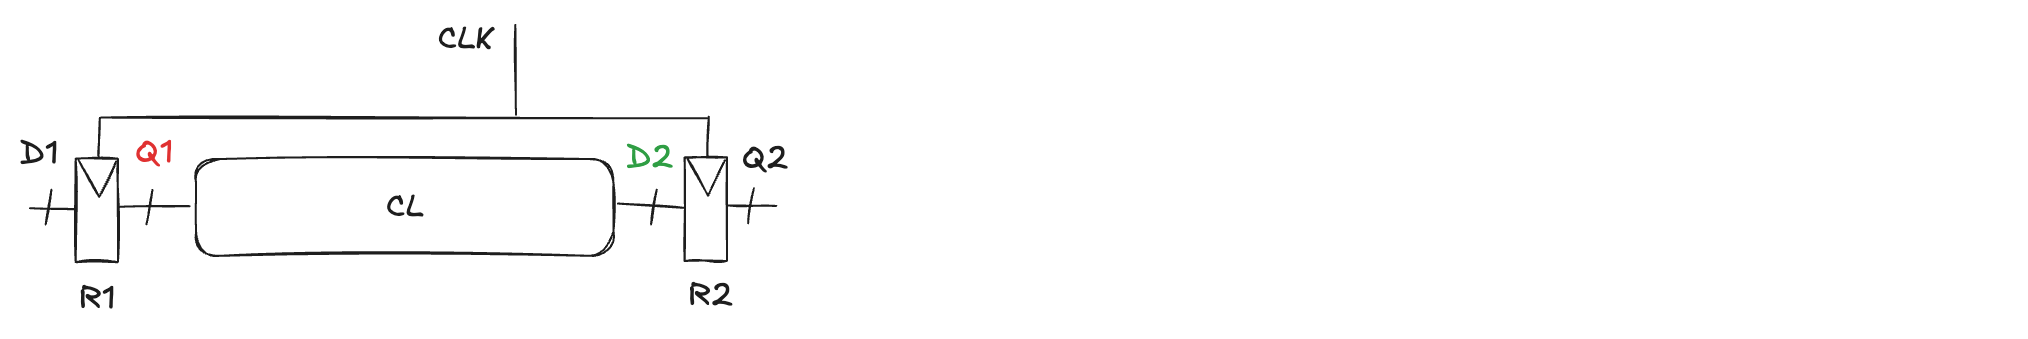

At the rising edge of the clock, R1 updates its output Q1, which then begins to propagate through the logic. Because the logic delays are not uniform, some internal nodes may begin to transition quickly (after the contamination delay) while the final output of the logic may only reach its correct, stable value after the propagation delay. These two bounds define the earliest and latest times at which the signal can appear at the input D2 of the receiving flip-flop R2. The following timing diagram illustrates this behaviour: 

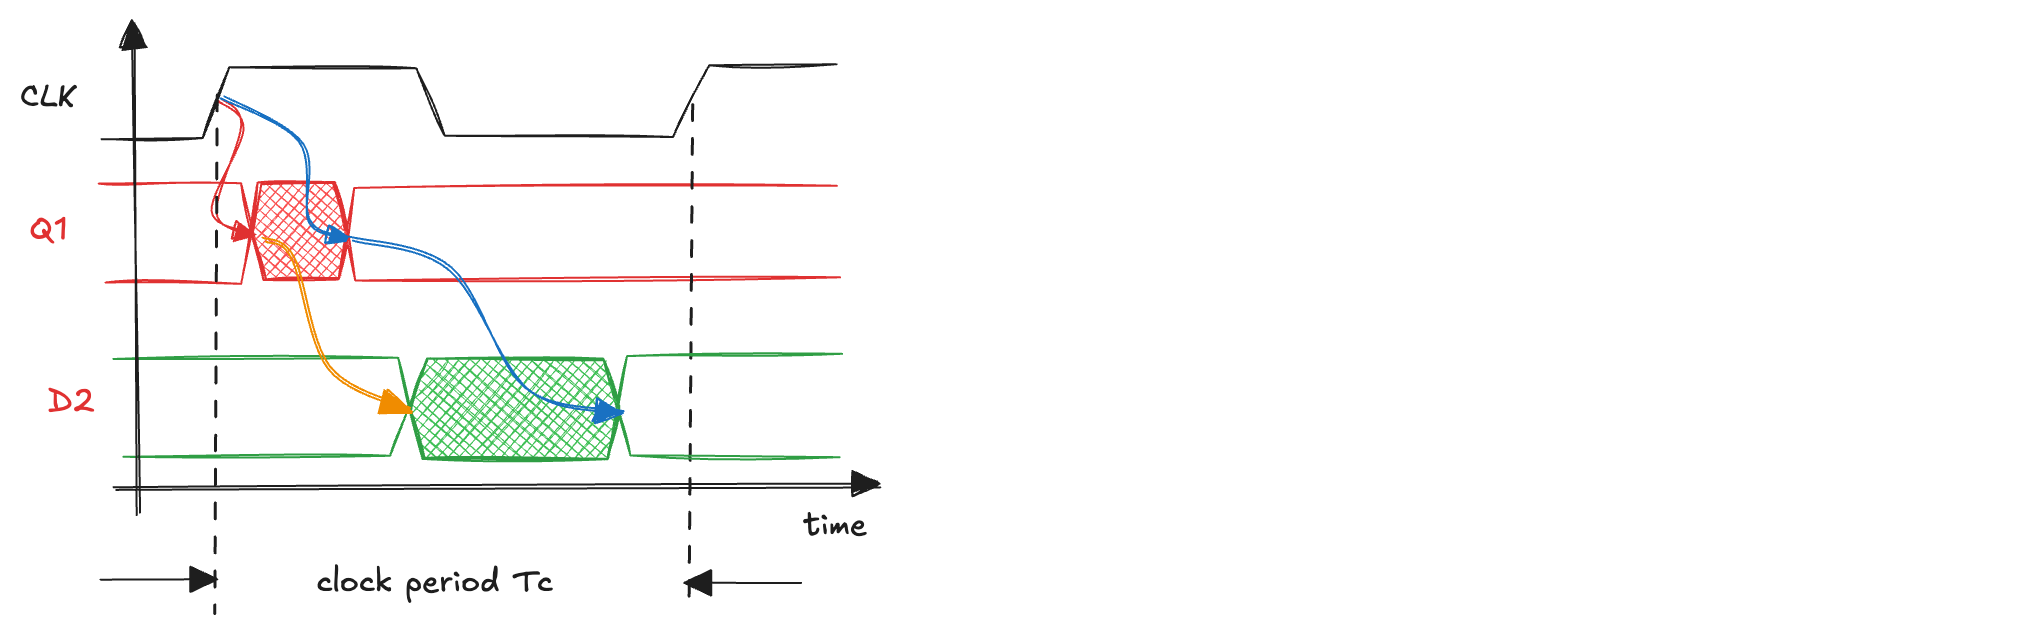

Shortly after the clock edge, the output Q1 starts to change, prompting the signals inside the combinational block and eventually the input D2 of the next flip-flop to begin transitioning. The earliest possible change is shown by the orange arrows, representing the contamination-delay limit. The signal then continues to evolve before ultimately settling to its final value, shown by the blue arrows, representing the propagation-delay bound.

For the system to operate correctly, **the clock period must be long enough to allow all of this activity to complete safely**. The receiving flip-flop must see a stable input for its required setup time before the next rising edge. If the logic requires more time to settle than the clock provides, the system risks **violating the dynamic discipline and capturing incorrect values**. Therefore, the clock period imposes a fundamental limit on the speed of a synchronous design: it must be at least as long as the longest register-to-register path, including all relevant delays. This relationship between the clock frequency, the combinational logic delay, and the flip-flop timing parameters is central to the performance of digital systems, and it guides how we structure, pipeline, and optimize circuits to achieve higher speeds.

### Setup Time Constraint

To understand how fast a synchronous digital system can run, we must examine the timing constraints imposed by the receiving register in a register-to-register path. Specifically, we analyse the behaviour of the signal with respect to the **setup time** of the second flip-flop. The signal produced by the first register R1 must propagate through the combinational logic and arrive at the input D2 of the second register R2 **early enough** to satisfy its setup requirement. This journey involves several distinct delays. First, the updated value at Q1 does not appear the moment the clock rises. Instead, the output of R1 transitions only after the clock-to-Q propagation delay. Once the new value is present, it begins travelling through the combinational logic, which takes an additional amount of time equal to the logic’s propagation delay**. Only after both of these delays have elapsed will D2 begin settling toward the correct value. However, this is not sufficient. For R2 to capture the correct input at the next rising edge, the value at D2 must be stable at least one setup time before that edge. In other words, the logic’s output cannot be allowed to arrive at the very last moment; it must arrive early enough to satisfy the setup constraint. 

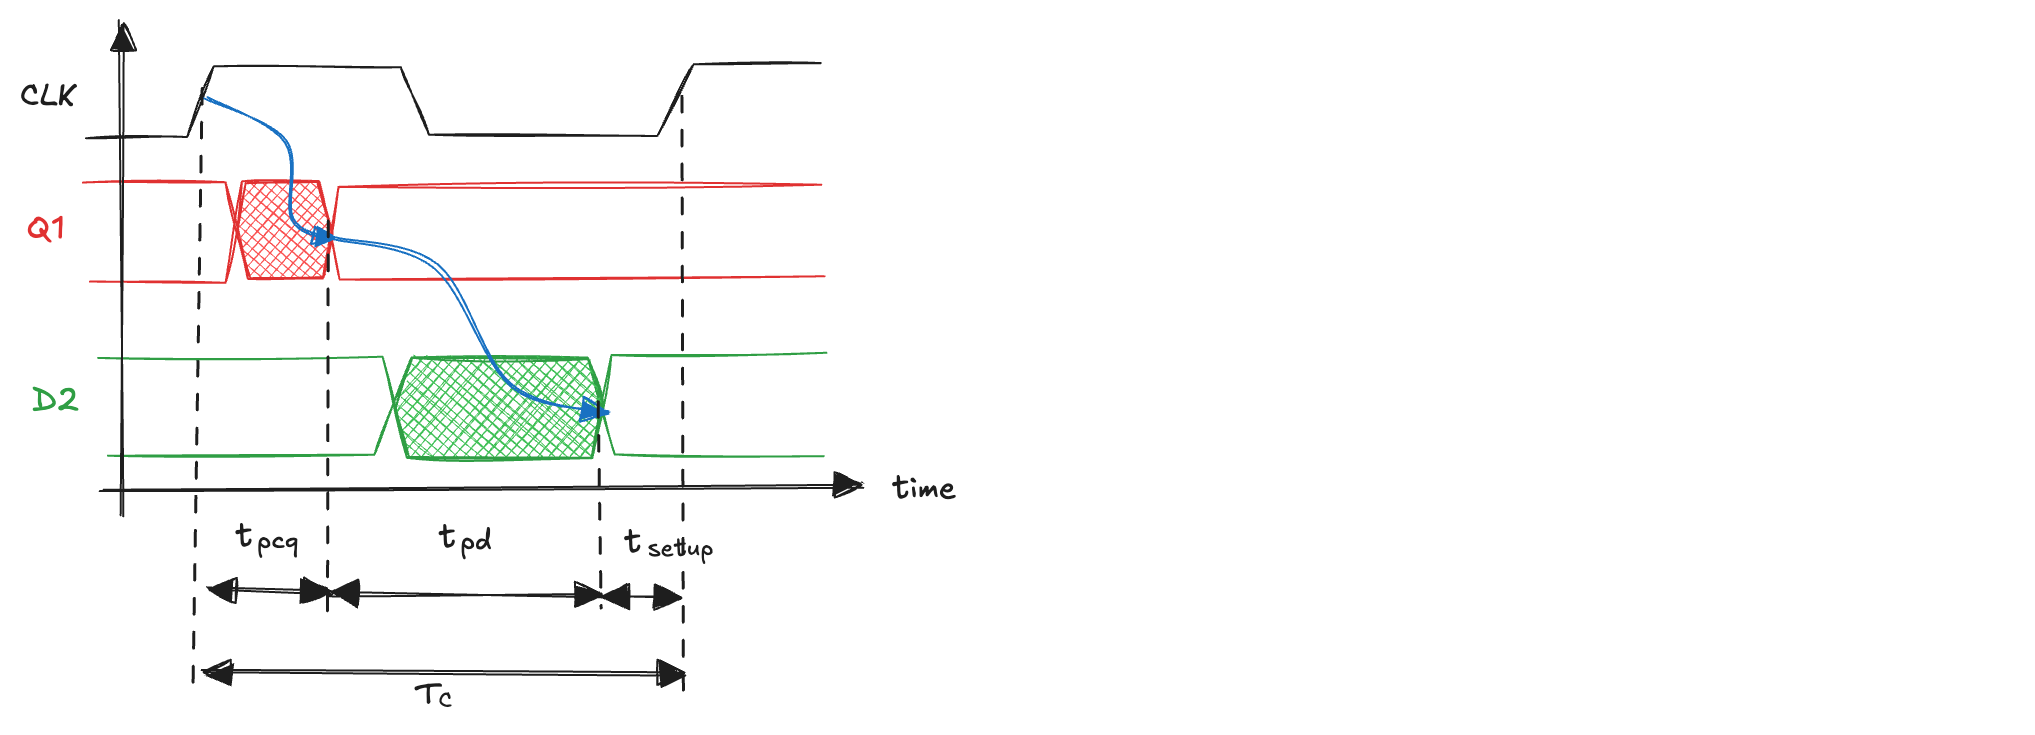

Combining all of these requirements, we obtain a simple and fundamental inequality for the minimum allowable clock period:

$\displaystyle T_c \geq t_{pcq} + t_{pd} + t_{setup}$

This inequality tells us that the maximum clock frequency of a synchronous system is limited by three factors: the **delay of the launching register**, the **delay of the combinational logic**, and the **setup time of the receiving register**. In practice, only one of these terms is under the designer’s control. The clock period is often dictated by performance targets or marketing requirements, and the flip-flop timing parameters are fixed characteristics of the technology chosen for the design. The **only adjustable quantity** is therefore the propagation delay of the combinational logic. Designers work hard to meet the constraint:

$\displaystyle t_{pd} < T_c - (t_{pcq} + t_{setup})$

which essentially states that **the logic must be fast enough to fit within the limited time budget** left over after accounting for flip-flop overhead.

Ideally, the entire clock period would be available for useful computation in the combinational logic. However, the flip-flop timing requirements consume part of this interval. The sum of the flip-flop delays represents a **sequencing overhead** that cannot be avoided: time spent not computing but instead managing the boundaries between clock cycles. As we push systems to run faster, this overhead becomes increasingly significant, reducing the time available for meaningful logic operations and making timing closure more challenging.

### Hold Time Constraint

Just as we analysed the setup requirement of the receiving register to determine how long the clock period must be, we now analyse its hold time to determine **how soon** the input is allowed to change after a clock edge. While the setup constraint concerns the latest time at which the signal can arrive, the hold constraint concerns the earliest time at which the signal is allowed to leave its old value. Immediately after the rising edge of the clock, the flip-flop R2 must continue to see a stable input D2 for a minimum interval (hold time). If the signal coming from R1 (and passing through the combinational logic) changes too quickly, R2 may inadvertently capture the new value instead of the old one, violating the design’s intended behaviour. In other words, we must ensure that the new value launched by R1 takes at least the duration of the hold time before it can reach R2’s input. Two delays contribute to this "arrival" of the new value. First, R1 does not update its output instantly, it responds only after the clock-to-Q contamination delay, the earliest moment at which its output might start to change. Second, the output then travels through the combinational logic, which has its own contamination delay. Only after both delays have elapsed can the new value begin to appear at D2:

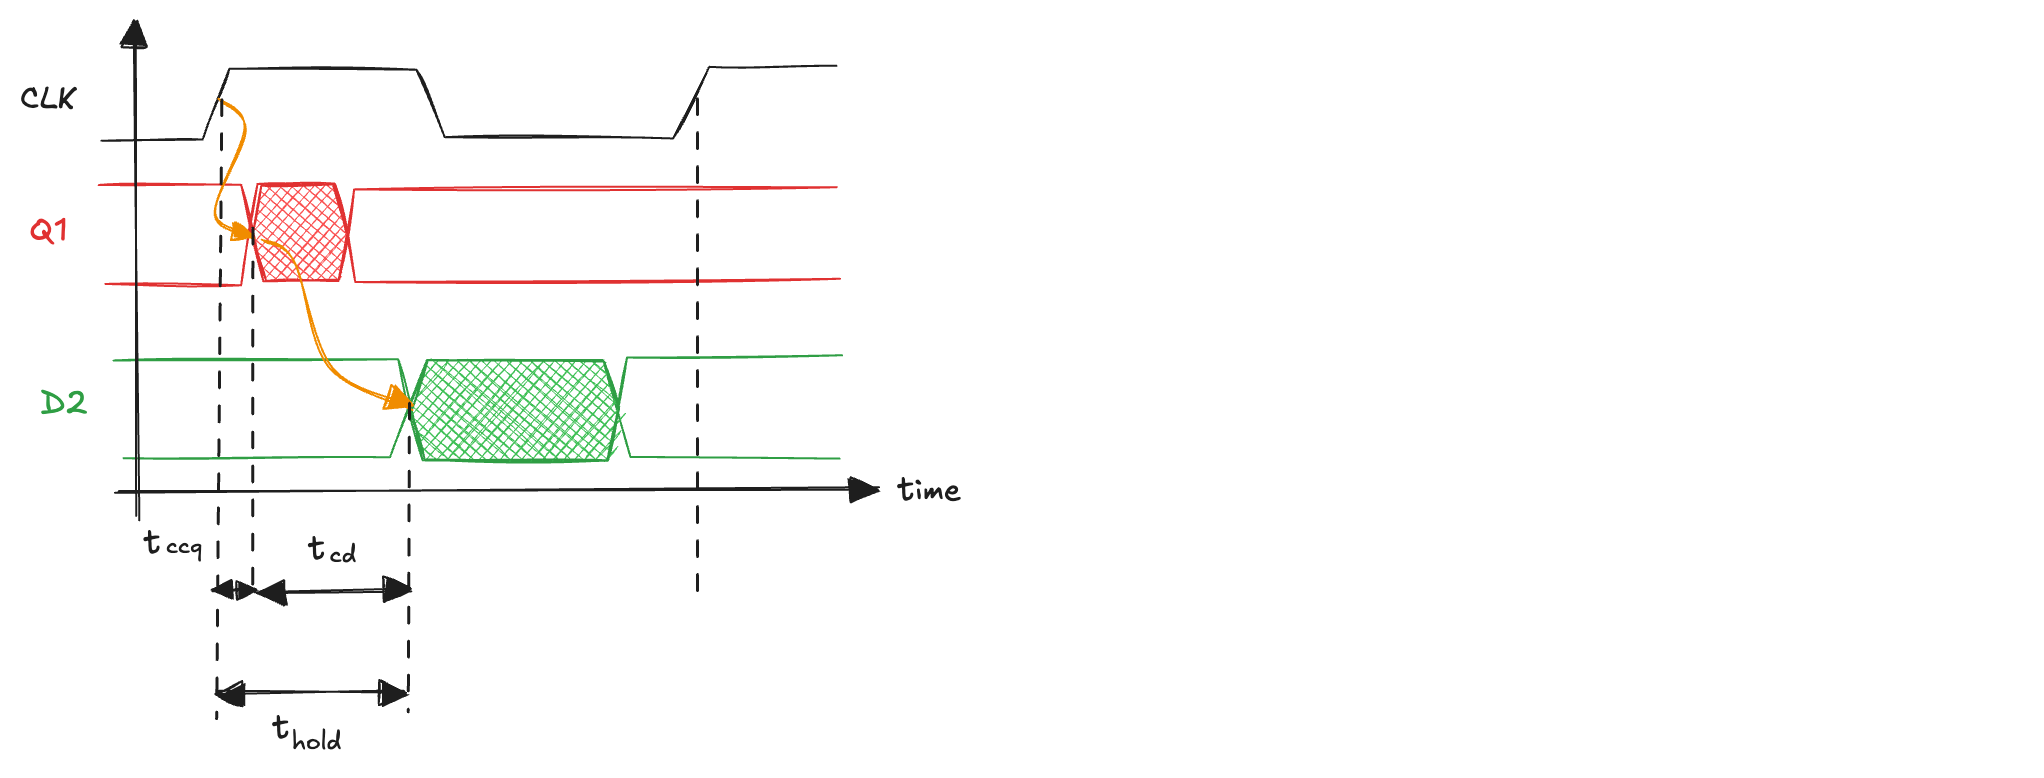

To satisfy the hold requirement, the sum of these earliest delays must exceed the hold time:

$\displaystyle t_{ccq} + t_{cd} > t_{\text{hold}}$

Rearranging this inequality yields a requirement on the combinational logic: it must introduce **at least** a certain amount of contamination delay:

$\displaystyle t_{cd} > t_{\text{hold}} - t_{ccq}$

This may seem surprising, since in setup analysis we were concerned about maximum delays, but in hold analysis we must ensure that delays are **not too small***. This is why we sometimes describe hold-time analysis as making sure the logic is "slow enough".

In many systems, we expect that two flip-flops may be placed directly one after the other with no combinational gates between them: 

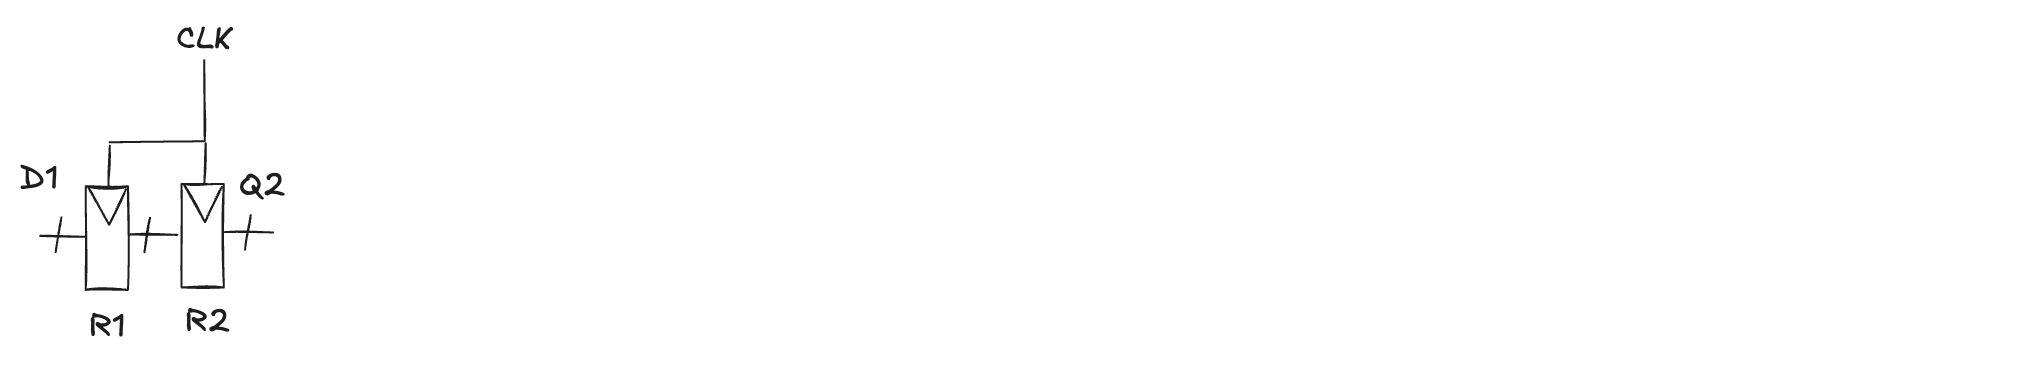

For this to work safely, the contamination delay of the first flip-flop must naturally exceed the hold time of the second. Reliable flip-flops are therefore designed so that:

$\displaystyle t_{\text{hold}} < t_{ccq}$

Often, manufacturers go even further and design flip-flops with **zero hold time**, effectively guaranteeing that direct cascading is safe. This dramatically simplifies timing closure, as it eliminates the need to artificially insert delay between registers. Despite this, the hold-time constraint is often overlooked in early designs because setup analysis tends to dominate discussions of performance and clock frequency. However, the hold constraint is **critically important** precisely because violating it cannot be fixed simply by adjusting the clock period. While a setup-time violation can be resolved by lowering the clock frequency, a hold-time violation requires **adding delay** to the logic, modifying the circuit topology itself. This can be difficult, and in some cases disruptive, since artificial delay elements or longer routing paths must be introduced to slow the signal down.

Thus, while setup time determines how fast a circuit can be clocked, the hold constraint ensures that signals do not arrive too quickly. Both constraints work together to guarantee correct sequential behaviour, and a robust design must obey them simultaneously.

### Timing Analysis

Sequential circuits must satisfy both setup-time and hold-time constraints, and these constraints together define the allowable range of delays for the combinational logic that sits between flip-flops. The **setup constraint** imposes a limit on the **maximum** propagation delay of the logic, while the **hold constraint** imposes a limit on the **minimum** propagation delay. In practice, this means that the logic must be neither too slow nor too fast. If the critical path becomes too long, the system cannot operate at the desired clock frequency. If the shortest path becomes too short, the receiving flip-flop may experience a hold-time violation. To illustrate this problem, consider the following sequential circuit:

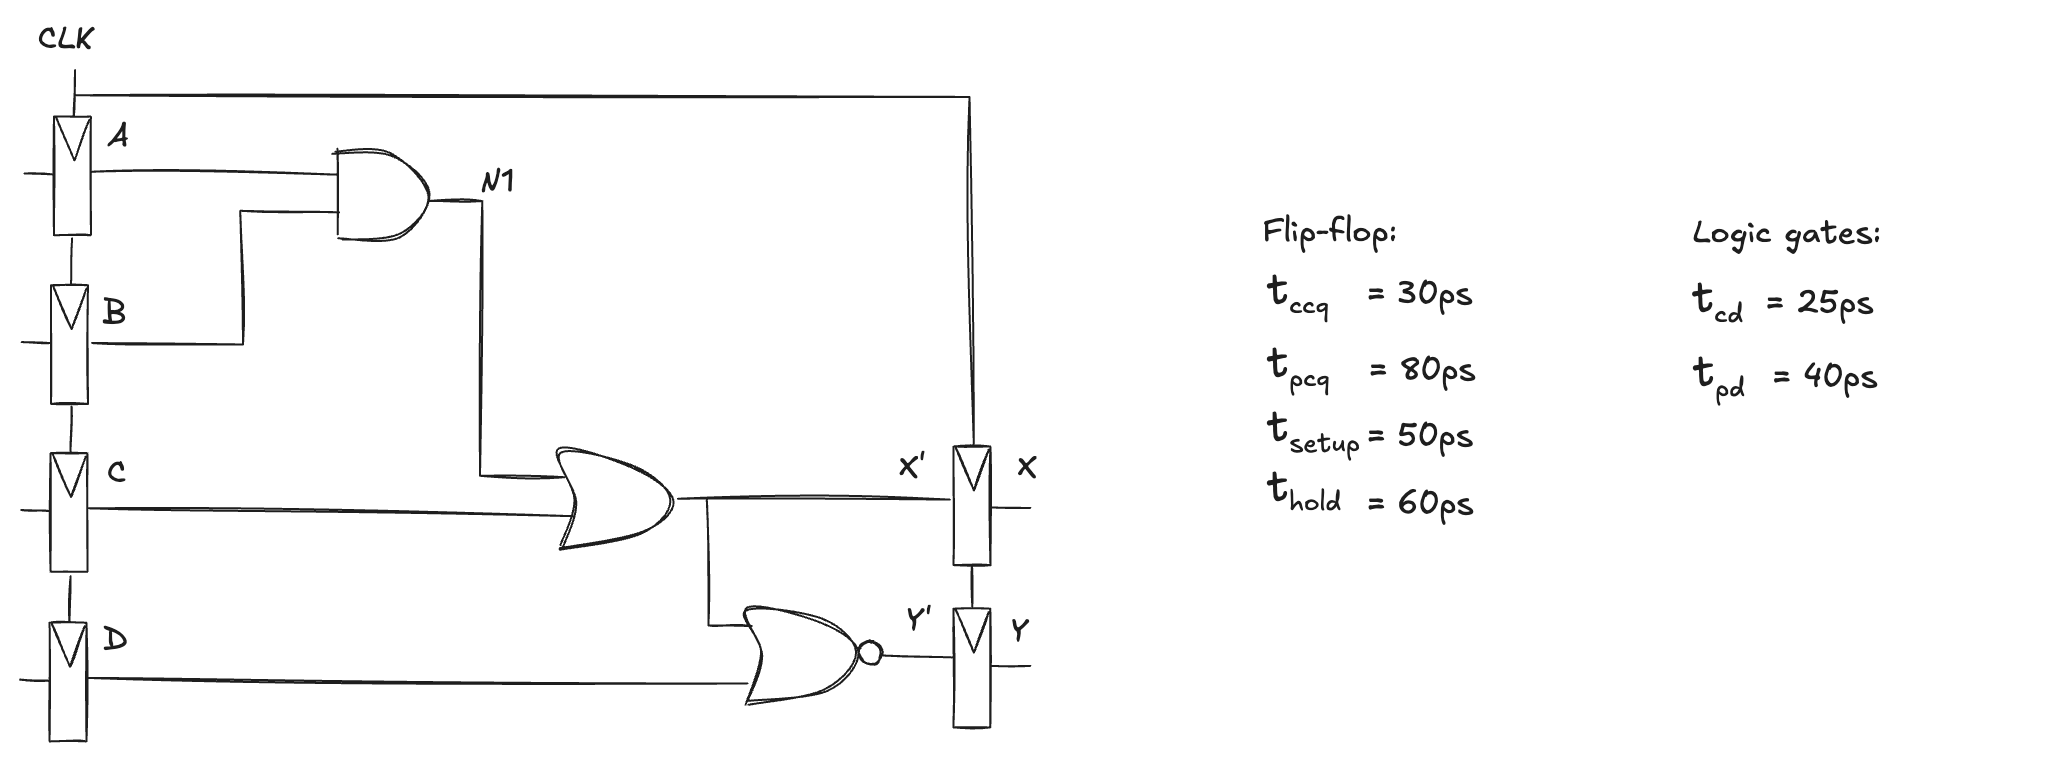

Several flip-flops launch registered signals A, B, C and D, which then pass through a small combinational network consisting of AND and OR gates. The outputs of this network X' and Y' are captured by the next pair of flip-flops producing the outputs X and Y. The goal is to analyse the timing of this circuit, determine the **maximum safe clock frequency**, and check whether the design suffers from either setup-time or hold-time violations. We are given the timing parameters for both flip-flops and combinational gates. Using these values, we can now identify the relevant timing paths in the circuit.

For the **setup-time analysis**, we trace the **longest** path from any launching flip-flop through the combinational logic into the receiving flip-flop. Along this path, the delays add up: the launching flip-flop contributes its clock-to-Q propagation delay, each gate adds its propagation delay, and the receiving flip-flop requires its setup time margin. The sum of these must be strictly less than the clock period. Violating this constraint would mean that the next rising clock edge arrives before the signal has stabilised at the input of the receiving flip-flop. In the exmaple, all the logic gates have identical propagation delay, so the length of the critical path is determined entirely by the number of gates the signal passes through. Tracing the path from inputs A or B through the AND gate, then through the OR gate, and finally through the last gate that produces Y', we identify a chain of three logic stages:

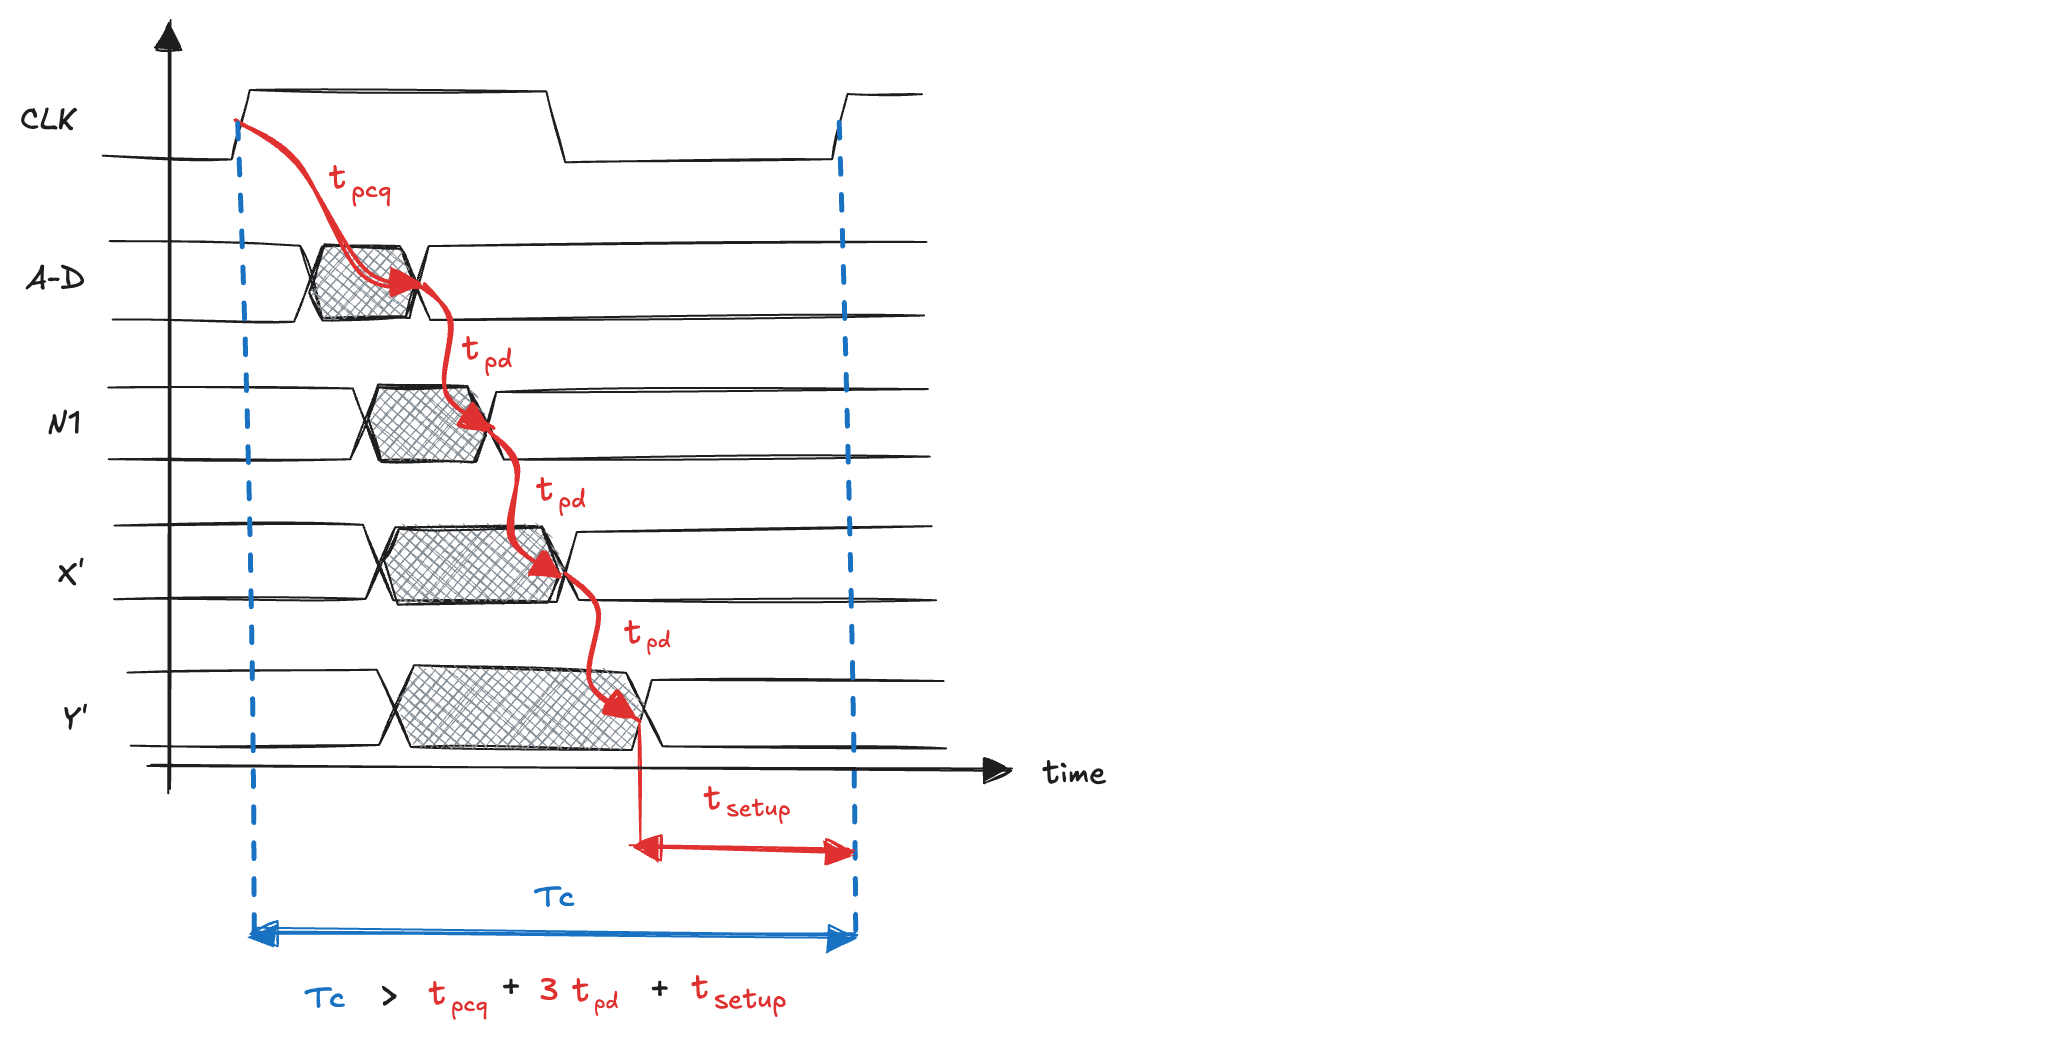

Because Y' feeds the receiving register, its value must settle early enough to satisfy the setup requirement:

$\displaystyle T_c > 80\text{ps} + 3 \cdot 40\text{ps} + 50\text{ps} = 250\text{ps}$

This corresponds to a maximum safe clock frequency of:

$\displaystyle f_c = \frac{1}{T_c} = 4\text{GHz}$

This is the theoretical upper limit. Any faster clock would violate the setup constraint, causing the receiving flip-flop to sample a value that has not yet settled.

For the **hold-time analysis**, we trace the **shortest** path from the launching flip-flop to the receiving one. Here, we use contamination delays since they tell us how soon the signal might begin to change. The new value produced by the launching flip-flop must not reach the receiving flip-flop too quickly, or it might overwrite the old value before the hold time has elapsed. This condition gives us a minimum required contamination delay. The shortest path in the example runs from input C directly into the gate producing X', or from input D directly into the gate that produces Y', both paths contain only a single logic gate:

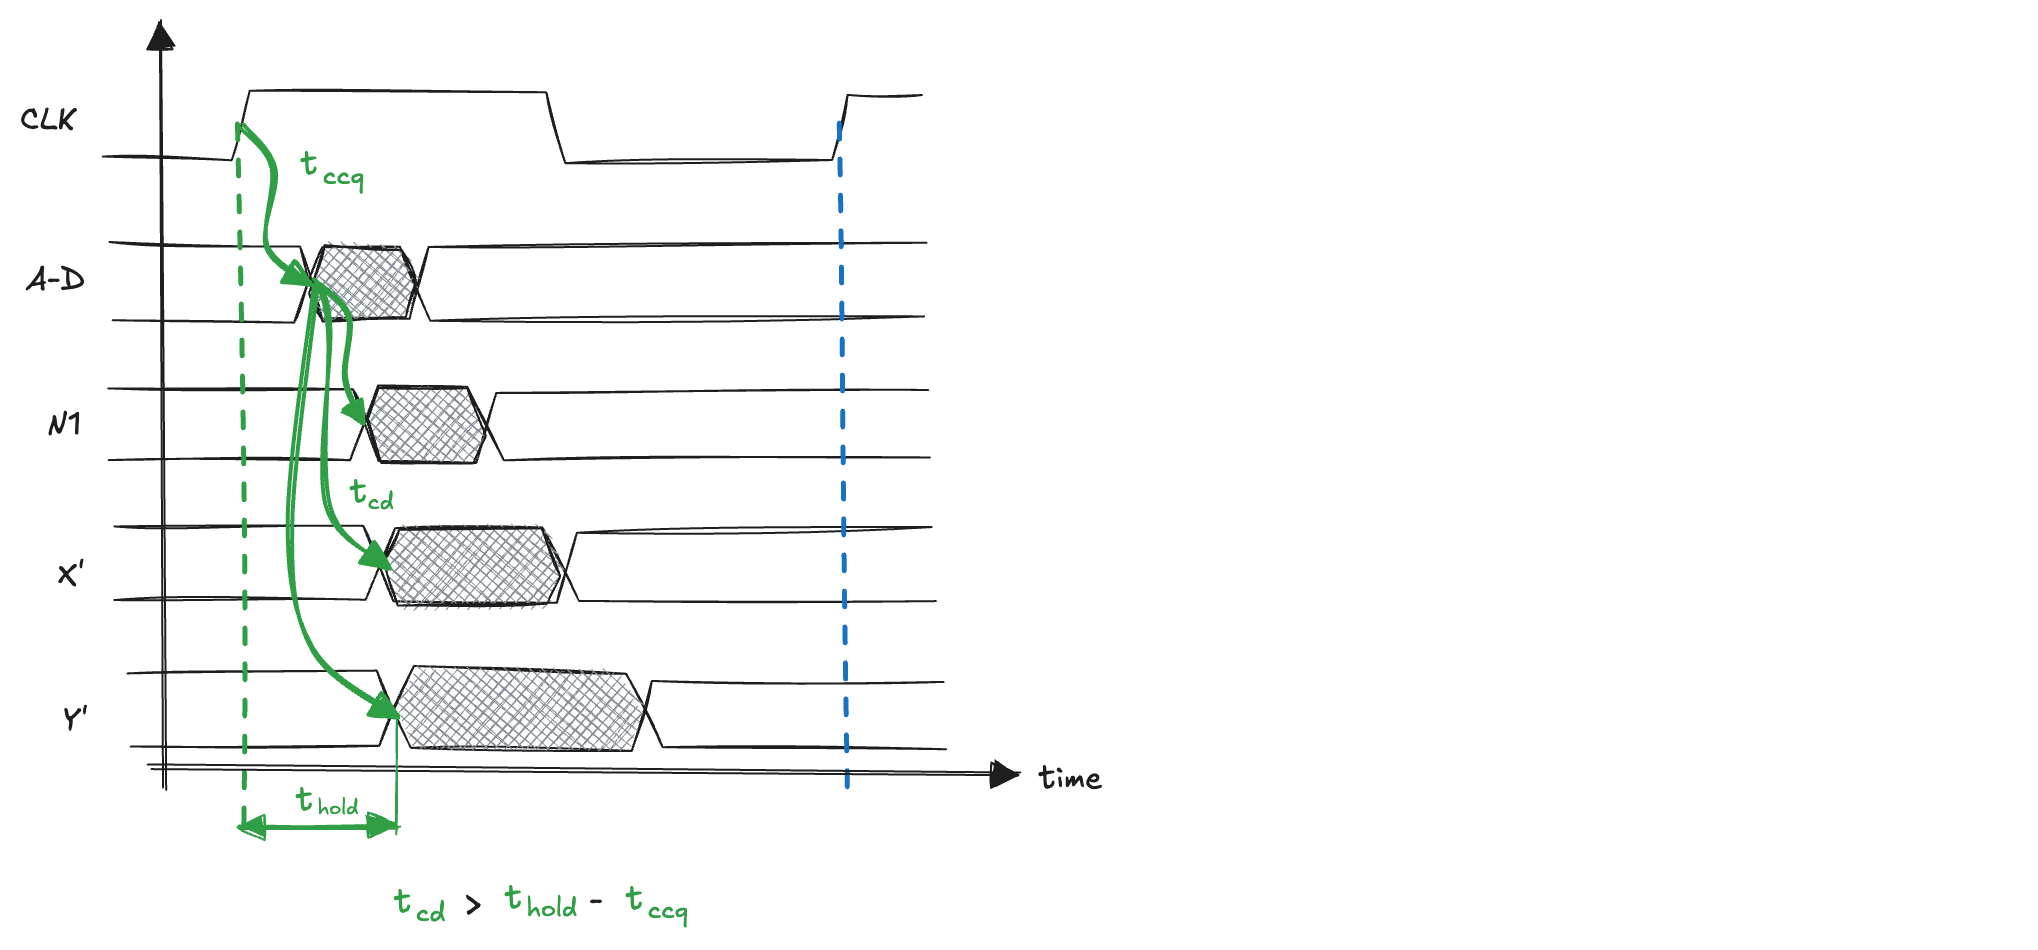

For the hold constraint to be satisfied, this sum must exceed the hold time of the receiving flip-flop:

$\displaystyle t_{ccq} + t_{cd} = 30\text{ps} + 25\text{ps} = 55\text{ps}$

but we have an hold time requirement of:

$\displaystyle t_{\text{hold}} = 60\text{ps}$

This indicates a **hold-time violation**: the signal can arrive **too quickly**, potentially corrupting the stored value in the receiving flip-flop. Unlike setup violations, where slowing down the clock can often bring the circuit back into a safe operating zone, hold violations cannot be corrected by adjusting the clock period. This is because the hold constraint concerns what happens immediately after the sampling edge, a time window unaffected by the frequency of the clock. The only way to resolve the issue is to ensure that the signal takes longer to reach the receiving flip-flop, giving its input enough time to satisfy the hold requirement.

A common and practical solution is to **intentionally increase the contamination delay** of the shortest path by adding extra gates, typically simple buffers or inverters, that introduce predictable delay without affecting the logical function of the circuit. In the example, buffers can be inserted on the short path originating from C and D: 

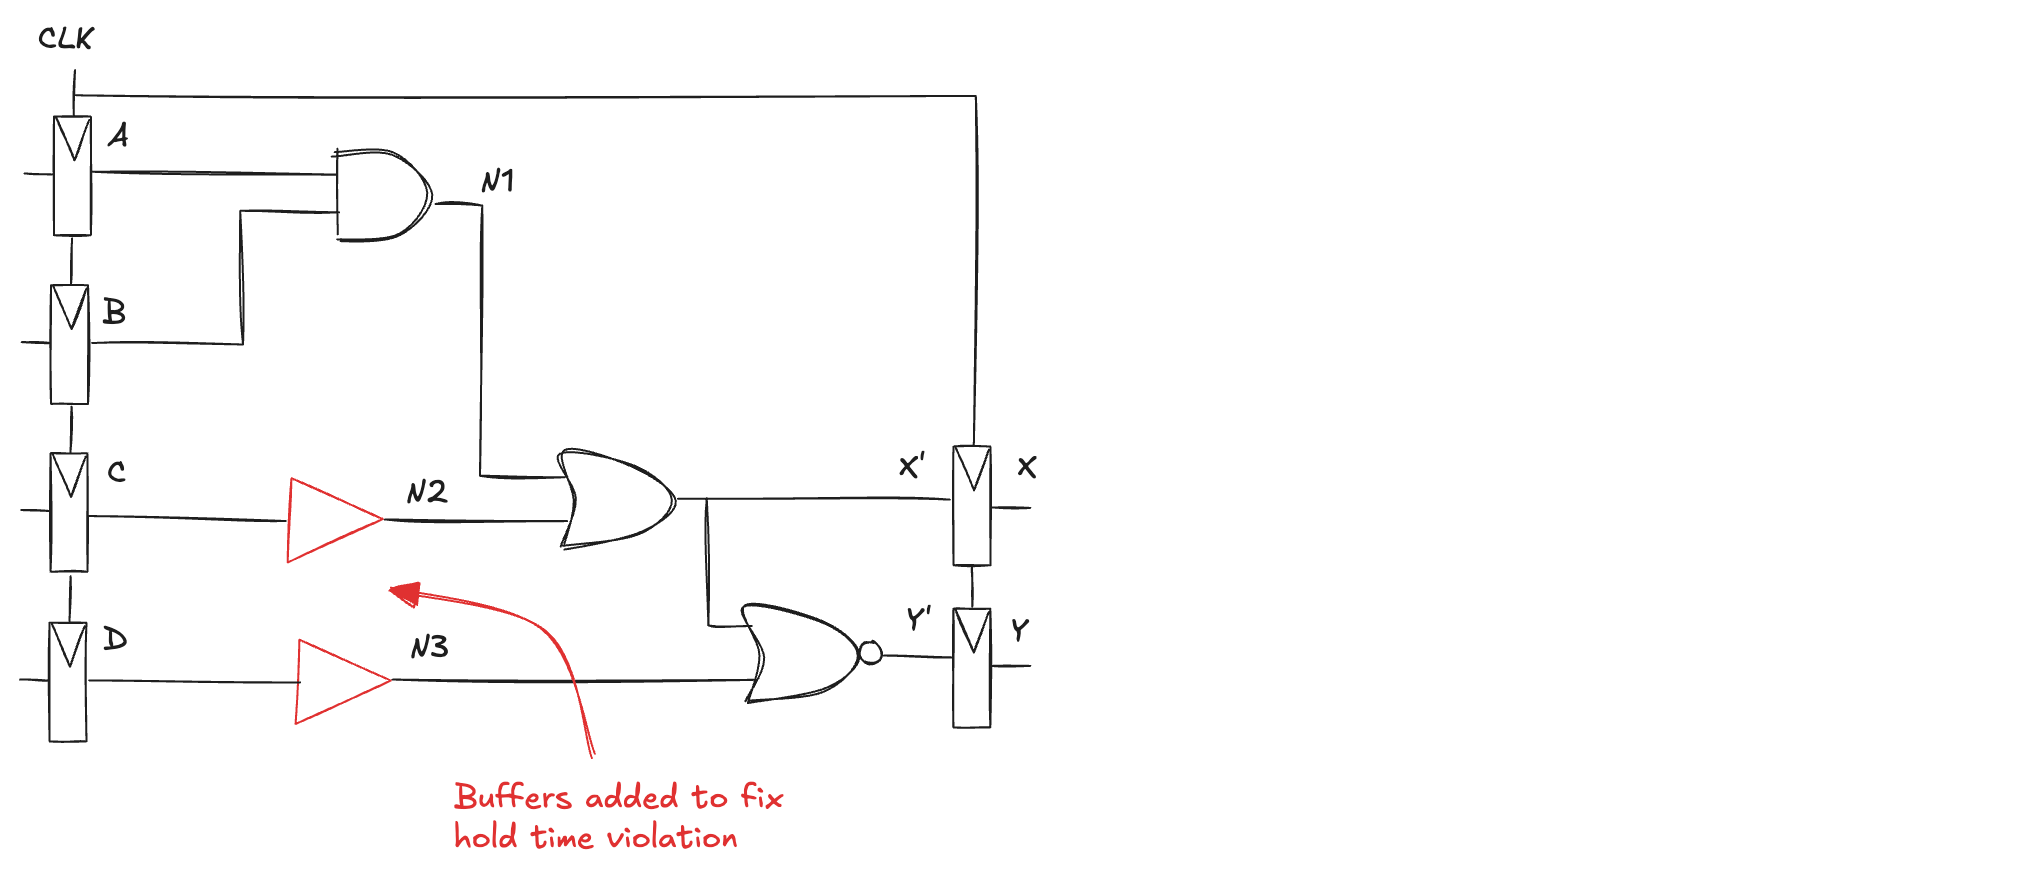

These buffers do not change the logic values, but each contributes additional contamination delay. As a result, the earliest possible moment at which the new value can arrive at the receiving register is pushed further away from the clock edge. With two such buffers inserted, the earliest arrival time becomes:

$\displaystyle t_{ccq} + 2 \cdot t_{cd} = 30\text{ps} + 2 \cdot 25\text{ps} = 80\text{ps}$

which now comfortably exceeds the hold time requirement. The critical detail here is that the added buffers lie only on the shortest path, not on the critical (longest) path. Because the buffers add only contamination delay (and not propagation delay) to the long path, the maximum clock frequency remains unchanged. The circuit still supports the same 4 GHz upper limit determined by the setup-time analysis. In many designs, simply inserting buffers is a clean and controlled way to achieve this, and automated design tools routinely use this technique during physical synthesis and timing closure.

The example shown has an unusually large hold time, chosen for educational purposes to make the violation more obvious. In commercial hardware, flip-flops are typically designed with hold times smaller than their contamination delays, ensuring that two flip-flops can safely be cascaded without additional buffering. This significantly reduces the likelihood of hold violations, though they can still arise in certain corner cases.

Once both timing constraints are checked, we can determine whether the circuit is safe as designed, and if so, what the maximum possible clock frequency is. This is the essence of timing analysis in synchronous systems: by examining the delays along all possible paths, we can guarantee that the circuit behaves deterministically from one clock cycle to the next.

### Clock Skew

Throughout our timing discussions, we have implicitly assumed that the clock signal reaches every flip-flop in the system at exactly the same moment. This idealised assumption allows us to treat the entire synchronous circuit as if all registers are triggered simultaneously by **a perfectly aligned global clock edge**. In reality, however, this is rarely the case. Physical constraints, such as differences in wire length, routing congestion, buffering stages, and electrical noise, mean that the clock edge arrives at different registers at slightly different times. This phenomenon is known as **clock skew**.

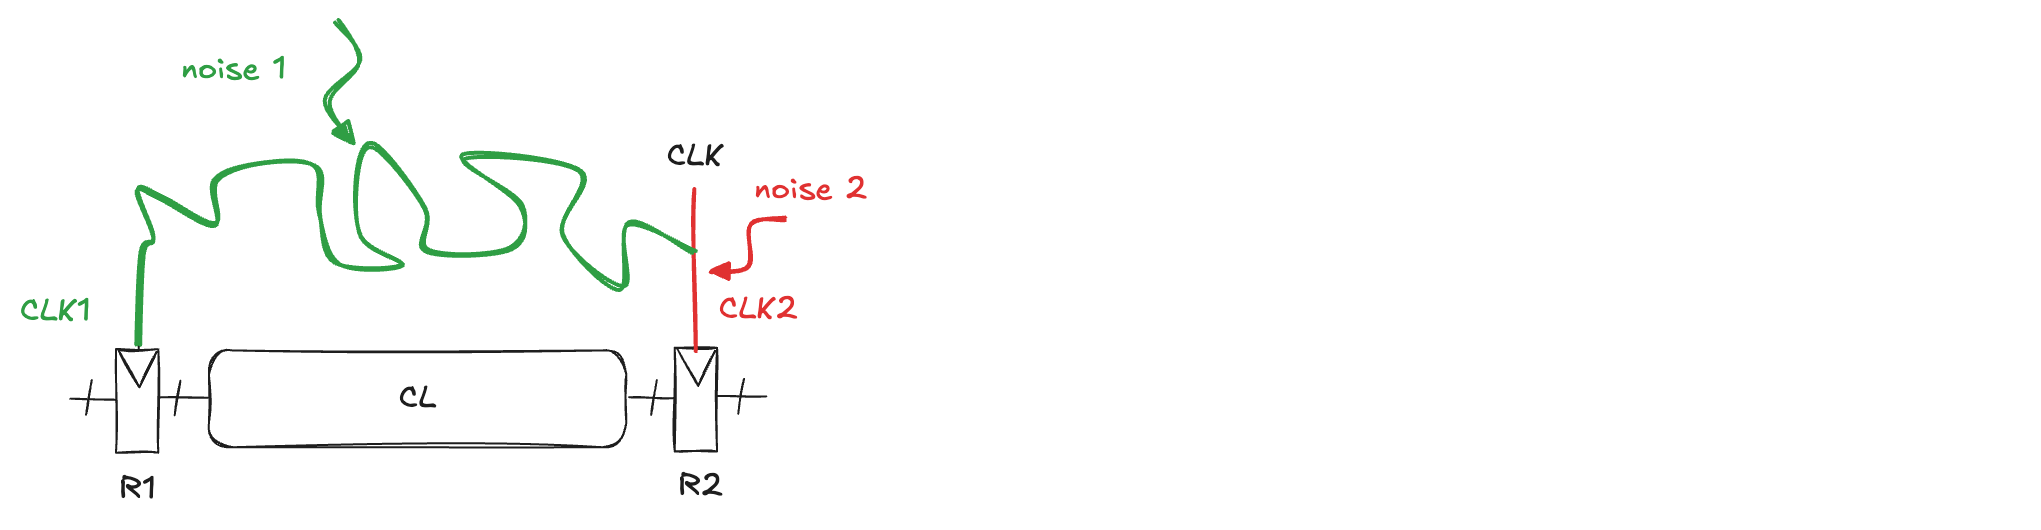

Clock skew arises because the clock signal must physically travel from the clock source to each flip-flop, often following paths of different lengths through a complex distribution network. A longer wire introduces greater delay than a shorter one, and additional clock buffers inserted along the way contribute their own delays. Moreover, different sections of the clock tree may experience different amounts of noise or interference, causing slight variations in the timing of the clock edge as seen locally by each register.

In the picture, for example, the two registers R1 and R2 receive the clock through different routes CLK1 and CLK2. Although both are driven from the same global clock source, the actual arrival time of the rising edge differs: one edge is shifted to the left, the other to the right. A timing diagram shows that the clock edges seen by the registers do not align perfectly: the red and green waveforms represent the real local clocks, offset relative to the idealised global clock (blue): 

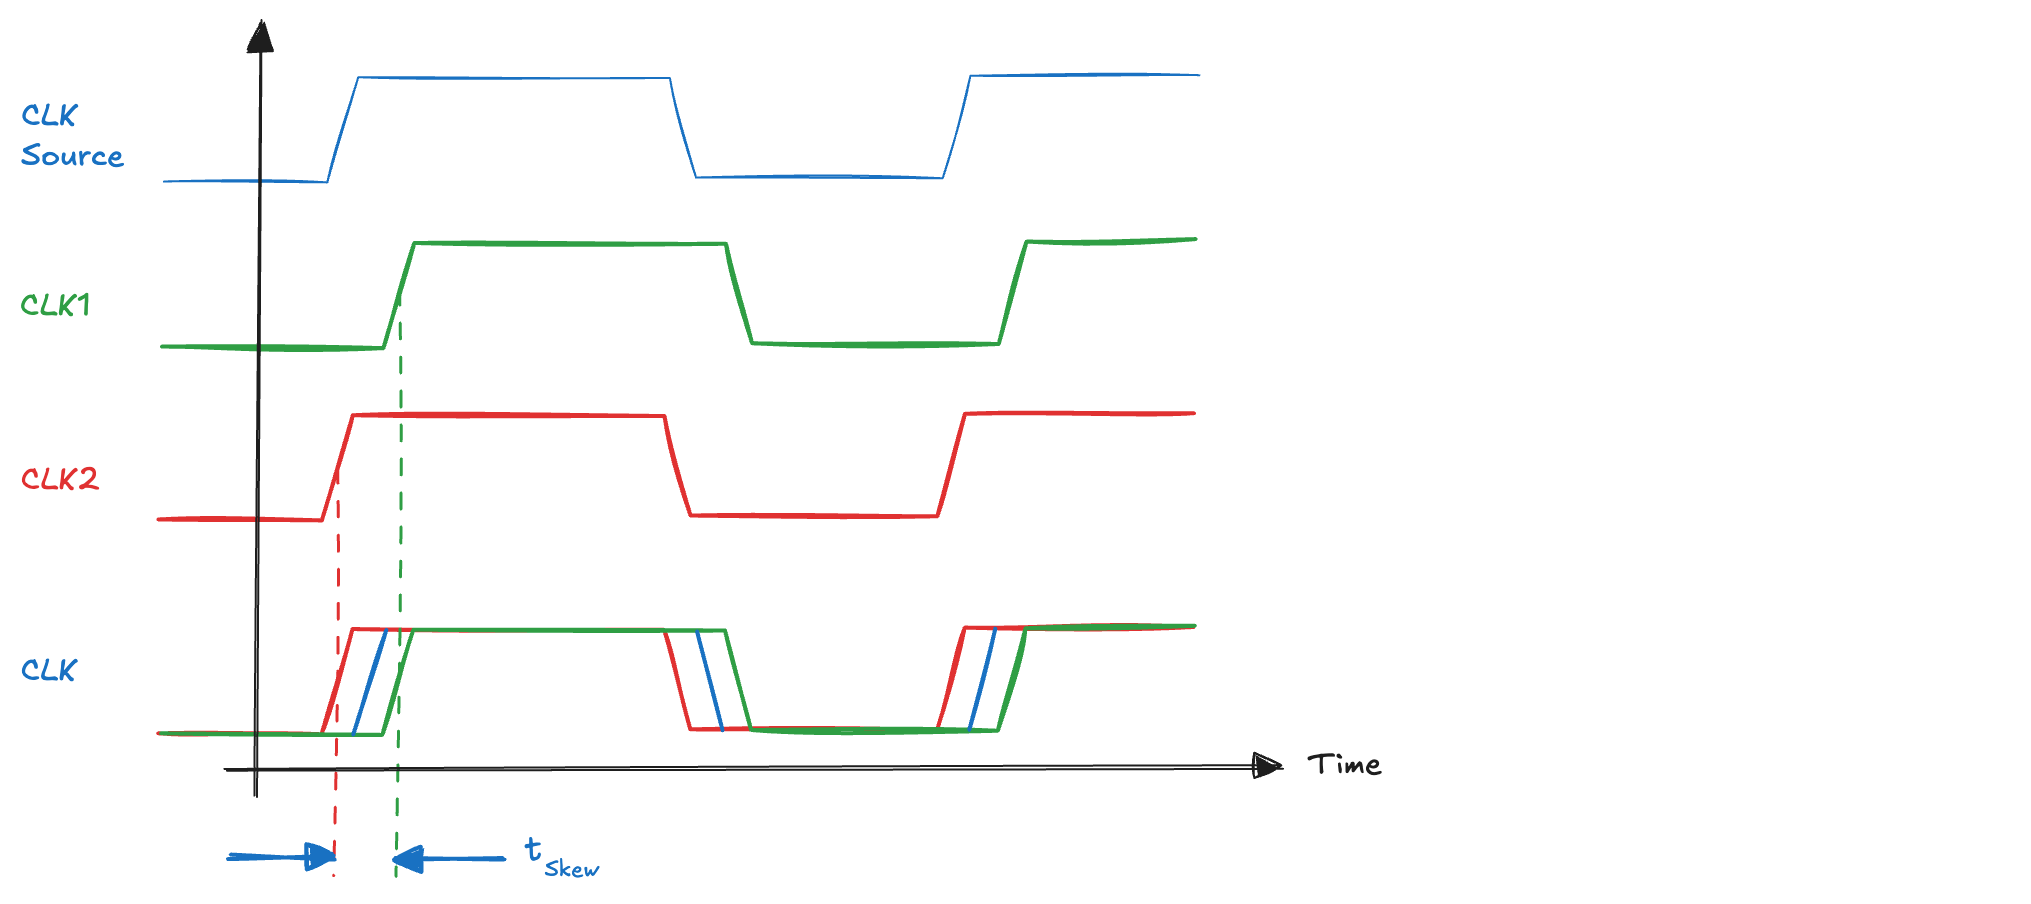

The time difference between these local clock edges is the **clock skew**. It affects timing analysis in important ways. A skew that delays the clock edge at the receiving register effectively gives more time for signals to propagate, helping to satisfy setup constraints but making hold constraints more difficult to meet. Conversely, a skew that delays the launching register tightens setup margins. Because skew can work for or against the designer depending on its direction, we cannot rely on favourable skew to improve performance. Instead, when doing timing analysis, we must always consider the **worst-case scenario**, assuming the skew values that make both setup and hold constraints as difficult as possible to satisfy.

This conservative approach ensures that the digital system will function correctly **under all circumstances**, even when manufacturing variations, temperature fluctuations, or noisy environments cause slight changes in clock arrival times. Clock skew is therefore an essential part of real-world timing analysis, and understanding its effects is a critical step toward designing robust and reliable synchronous circuits.

Setup time concerns how **late** a signal is allowed to arrive at the receiving flip-flop. Therefore, the worst case occurs when the **launching flip-flop receives the clock late**, while the **receiving flip-flop receives the clock early**. In this situation, the data starts its journey as late as possible while the receiving register asks for it as early as possible. Clock skew therefore **reduces** the effective time available for data to propagate:

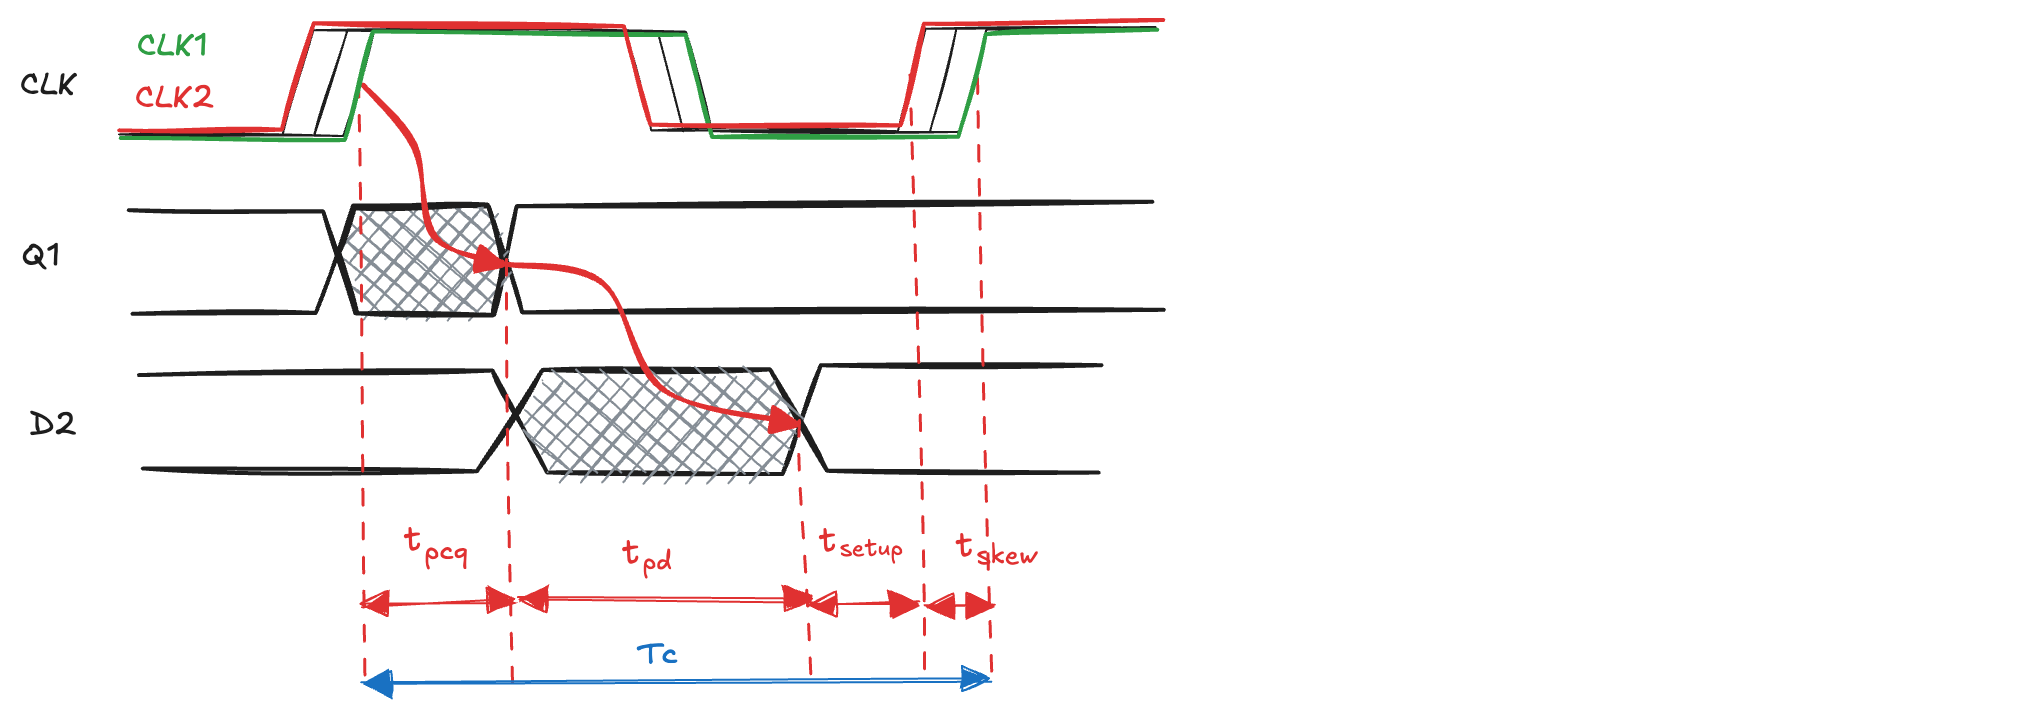

To express this mathematically, we add the skew term to the existing setup constraint. The new inequality becomes:

$\displaystyle T_c > t_{pcq} + t_{pd} + t_{setup} + t_{\text{skew}}$

This directly reduces the maximum allowable propagation delay of the combinational logic:

$\displaystyle t_{pd} < T_c - (t_{pcq} + t_{setup} + t_{\text{skew}})$

In other words, **clock skew tightens the setup constraint**, leaving less time for useful computation within each clock cycle. If skew becomes large, the designer may be forced to shorten logic paths, add pipeline stages, or lower the clock frequency.

Next, we consider the hold-time constraint. Hold time concerns how **soon** the input to the receiving flip-flop may change after the clock edge. The worst case now is the opposite of the setup scenario: the **launching flip-flop receives an early clock**, while the **receiving flip-flop receives a late clock**. The signal may begin changing very quickly at the launch side, but the receiving register does not capture the clock edge until some time later. This increases the duration during which the receiving flip-flop must continue seeing the old value.

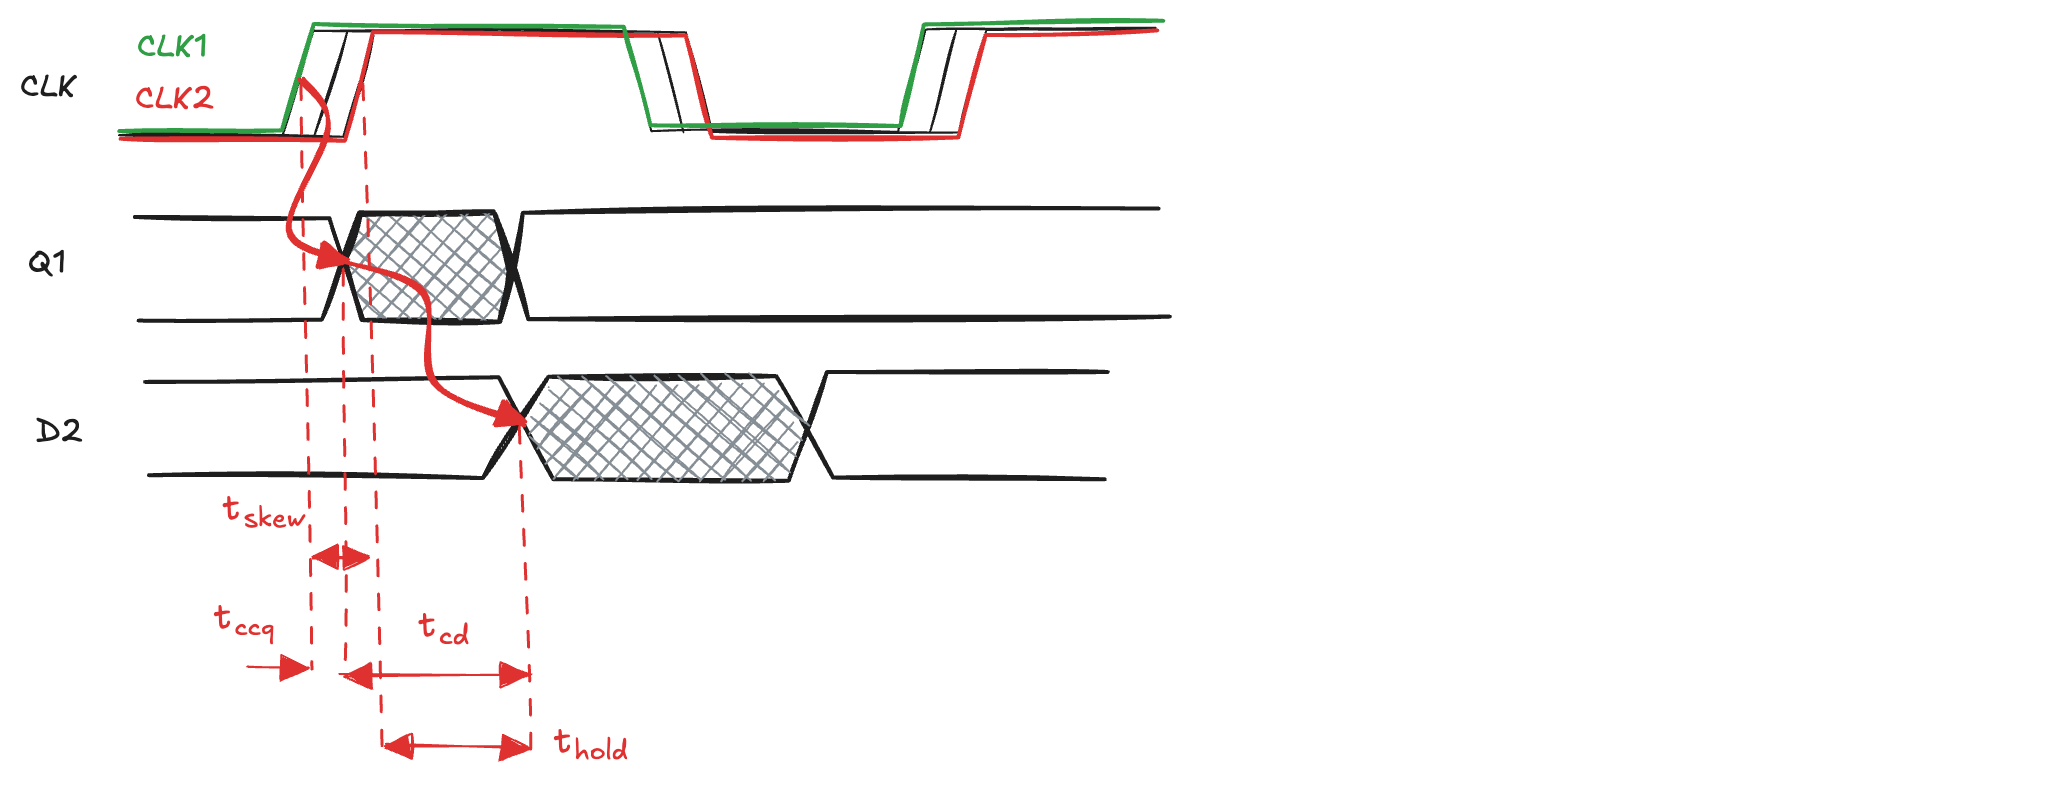

To guarantee safety, the earliest possible change at the receiving flip-flop must be delayed by at least the skew plus the hold time:

$\displaystyle t_{ccq} + t_{cd} > t_{hold} + t_{\text{skew}}$

Rearranging yields:

$\displaystyle t_{cd} > t_{hold} + t_{\text{skew}} - t_{ccq}$

This shows how **clock skew worsens hold-time constraints as well**, requiring greater minimum contamination delay. If the skew is large enough, then even back-to-back flip-flops—normally safe because may suddenly violate hold time. This can happen even when the hold time of the flip-flop is zero. A skew greater than the flip-flop’s contamination delay means that the receiving register sees the new value too soon, destroying the stored value.


Here is the **discursive lecture-notes explanation** for *Clock Skew (3)*, written in the same clear and coherent style as the previous sections.

We can revisit the earlier timing-analysis example, but this time we assume that the clock distribution network introduces a 50ps clock skew between the launching flip-flop and the receiving flip-flop. Using the numbers from the earlier example, the new setup constraint becomes:

$\displaystyle T_c > t_{pcq} + t_{pd} + t_{setup} + t_{skew}
= 80\text{ps} + 3 \cdot 40\text{ps} + 50\text{ps} + 50\text{ps}
= 300\text{ps}$

This increases the minimum clock period from the original 250ps to 300ps, reducing the maximum safe clock frequency to:

$\displaystyle f_c = \frac{1}{T_c} = 3.33\ \text{GHz}$

Thus, even though the logic did not get slower, the **system** did—simply because skew reduced the amount of usable time per clock cycle.

Next, let us examine the **shortest path**, which determines the hold-time constraint. In the previous analysis, this circuit was already violating hold time. With skew added, the required minimum delay becomes:

$\displaystyle t_{hold} + t_{skew} = 60\text{ps} + 50\text{ps} = 110\text{ps}$

Clock skew makes the hold-time violation significantly worse. The fast path was already too fast; with skew, it becomes even farther from satisfying the timing requirement.

Clock skew therefore extends both ends of the timing window. It reduces the time available for combinational logic to perform useful work (worsening the setup margin), and it increases the minimum delay required through the logic (worsening the hold margin). For this reason, designers must always consider the **worst-case skew** when analysing synchronous systems. Even small amounts of clock skew can dramatically alter the allowable timing range and must be accounted for to ensure correct operation under all conditions.

## Timing violations

Up to this point, we have assumed that the input to a flip-flop remains stable throughout the entire aperture time surrounding the active clock edge. In carefully designed synchronous systems this assumption usually holds, because all signals originate from other registers and therefore follow the rules of the dynamic discipline. However, when a signal comes from **outside** the synchronous system (for example, from a mechanical button, a sensor, or an external device) we cannot longer guarantee that it will respect the setup and hold times of the receiving flip-flop. In these cases, it is entirely possible for the input to change at precisely the wrong moment, violating the dynamic discipline and leading to behaviour that cannot be predicted by Boolean logic alone.

To see this, imagine a button connected directly to the D input of a flip-flop: 

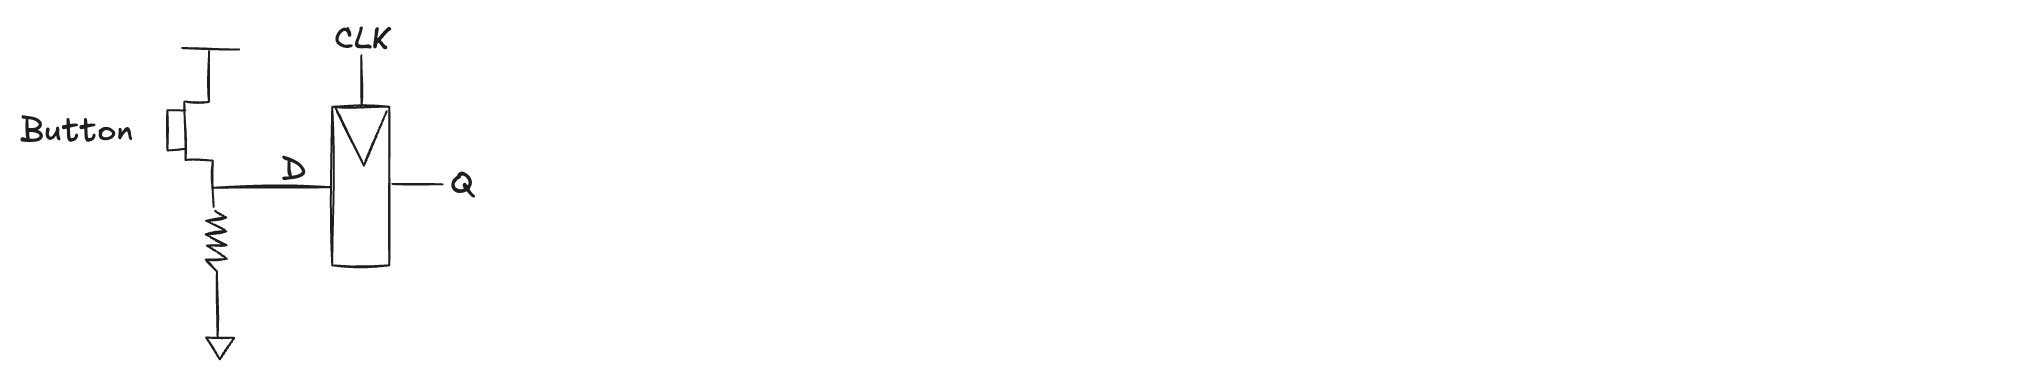

If the button is pressed well **before** the rising edge of the clock, the input has plenty of time to settle, and the flip-flop correctly samples a logical 1. If the button is not pressed until well **after** the clock edge, the flip-flop sees a 0 and behaves correctly again. But when the button changes state **during** the aperture interval (between the setup time before the clock edge and the hold time after it) the flip-flop sees an input that is neither reliably 0 nor reliably 1. The input violates the dynamic discipline, and in this case the output becomes **fundamentally undefined**.

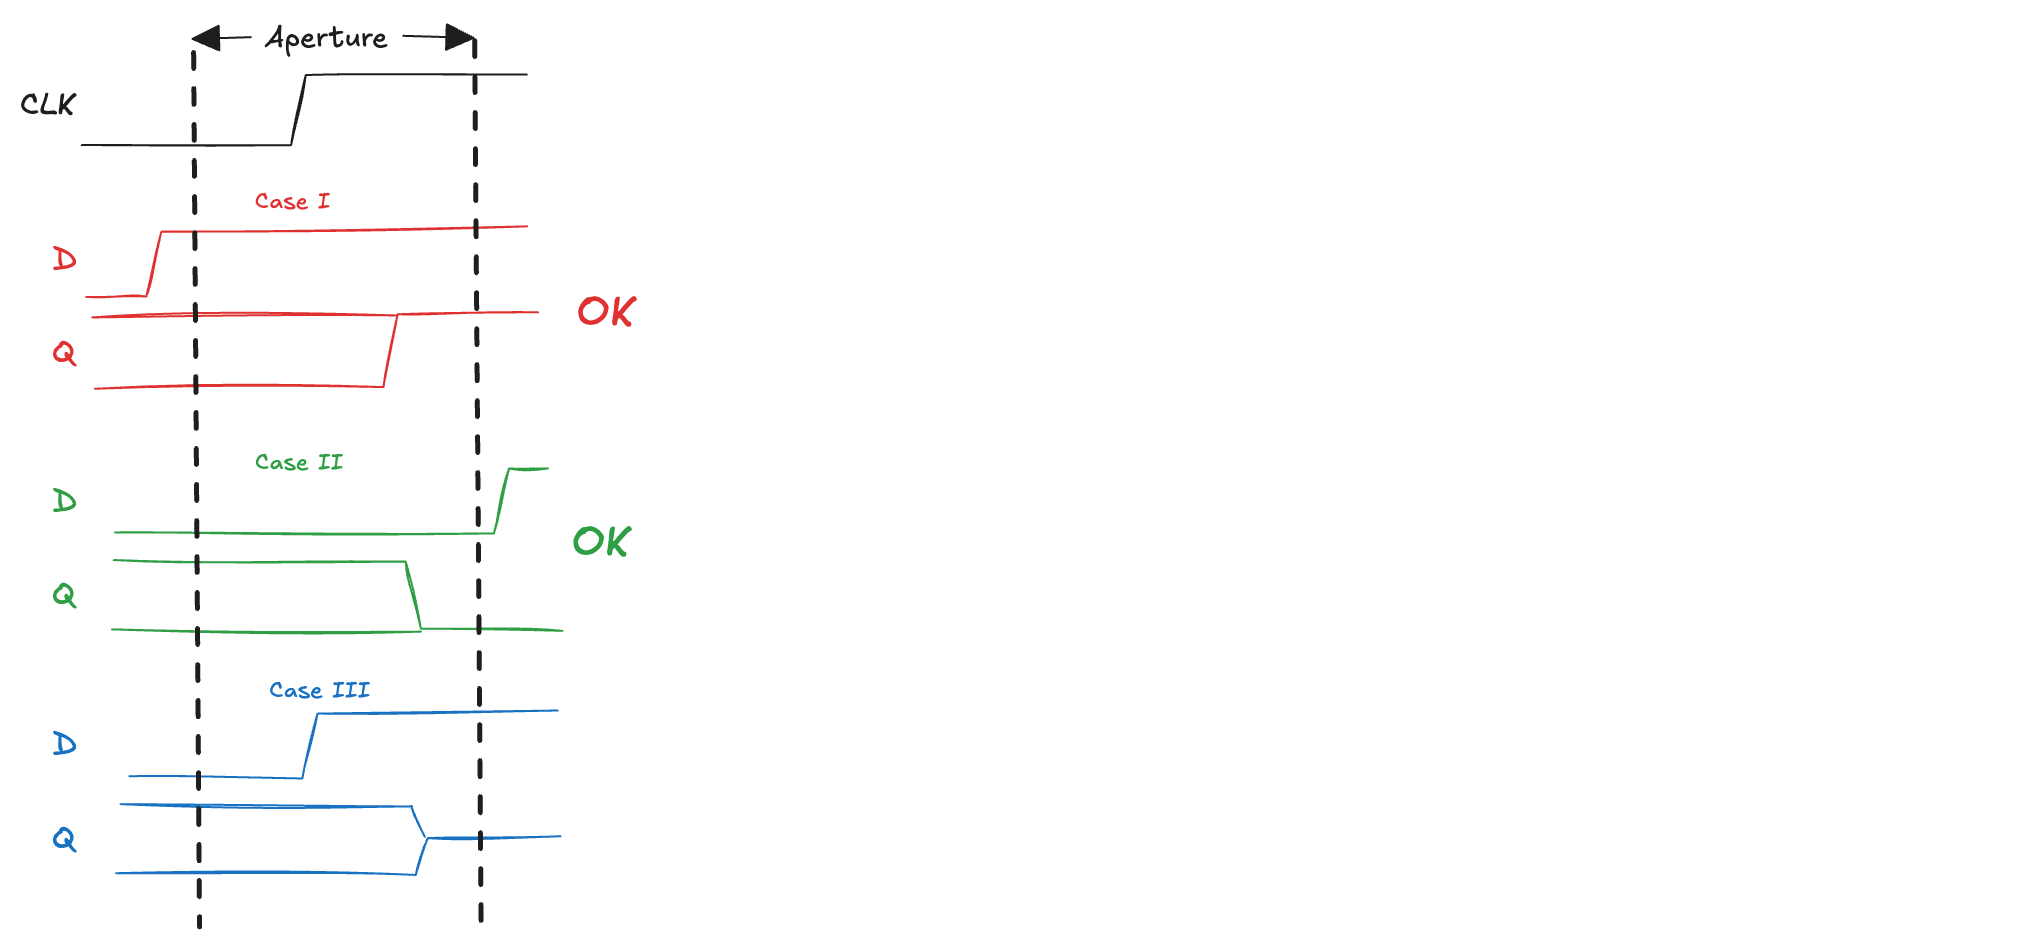

When a flip-flop samples an input that is changing during the aperture window, the internal circuitry cannot cleanly decide between the two stable logic levels. Instead, it may enter a peculiar condition known as **metastability**. In the metastable state, the output voltage hovers in the forbidden zone—neither a valid 0 nor a valid 1. It may oscillate, drift slowly, or remain stuck near the switching threshold for a surprisingly long time.

This phenomenon is not a design flaw, nor can it be eliminated: metastability is an inherent consequence of attempting to sample an arbitrarily timed signal with a synchronous circuit. Therefore, rather than trying to avoid metastability entirely, digital designers employ special techniques to **control** it and ensure that its effects do not propagate unpredictably through the system.

### Metastability

The metastable state of a flip-flop is similar to a ball placed exactly at the top of a hill between two valleys.

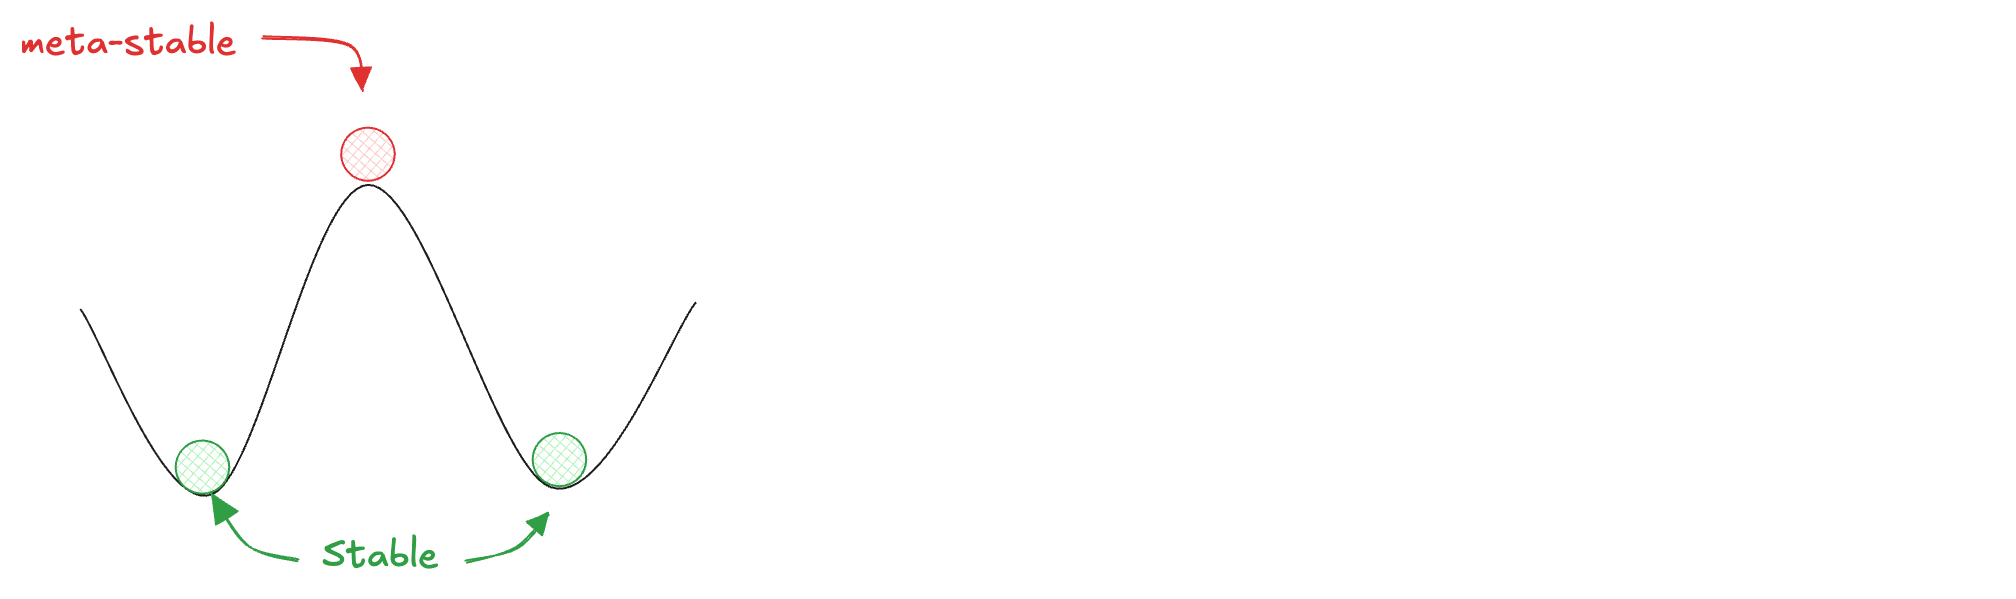

The valleys represent **stable states** (logic 0 and logic 1). If the ball is in a valley, it stays there (it is stable). The top of the hill represents the **metastable state**. If the ball were perfectly balanced, it could remain there, but in reality even the tiniest disturbance (noise, imperfections, microscopic asymmetries) will eventually make it roll down one side or the other. This model captures two essential properties of metastability:

- **Unpredictability**: we cannot know in advance which valley (0 or 1) the ball will end up in.
- **Unbounded resolution time**: if the ball is placed very close to the summit, it may take a long time before it starts rolling, meaning the flip-flop may take an arbitrarily long time to resolve to a valid logic level.

Since every bistable element has such a metastable point, **metastability is unavoidable** in sequential circuits:

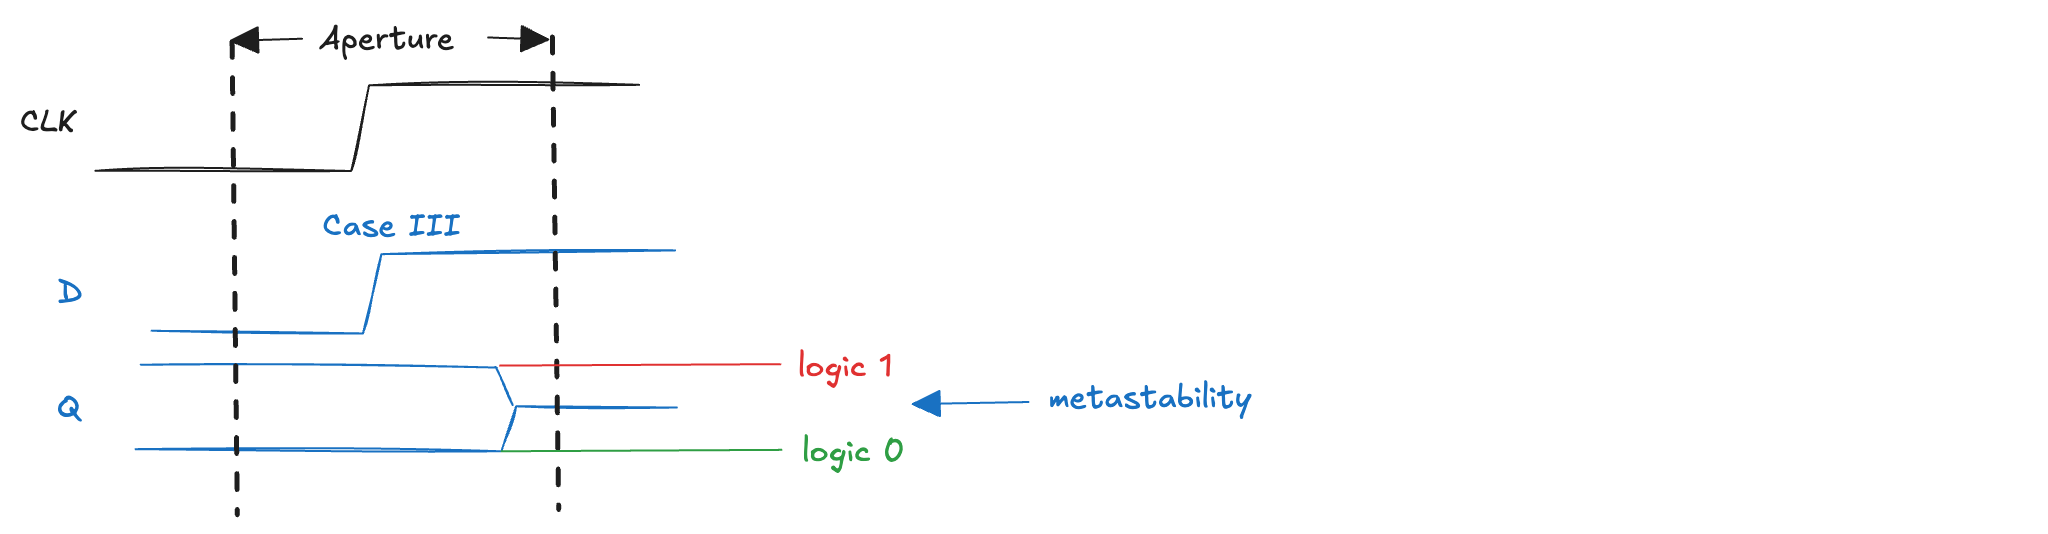

If a flip-flop enters a metastable state, that uncertain value can **propagate** to other parts of the system, causing unpredictable behaviour unless properly contained.

### Resolution Time

When a flip-flop becomes metastable due to a timing violation, it does not remain in that state indefinitely. Instead, the internal circuitry eventually resolves the ambiguity and settles to either a logical 0 or a logical 1. The time it takes for the flip-flop to exit the metastable condition and produce a valid output is known as the **resolution time**.

A key aspect of resolution time is that **it behaves like a random variable** rather than a deterministic delay. Even if we repeat exactly the same experiment (same input transition instant, same clock edge, same circuit) the time required for the output to settle can vary dramatically. Sometimes the flip-flop resolves quickly, in just a few tens of picoseconds; other times, the internal nodes can linger near the metastable threshold for a much longer interval. This **statistical nature** arises from the microscopic physical processes: thermal noise, small transistor mismatches, and the analog behaviour of the internal latch structure.

Empirical and theoretical studies show that the **probability** that the resolution time exceeds some duration decays **exponentially** with the duration. This behaviour is typically described by the relation:

$\displaystyle P(t_\text{res} > t) = \frac{T_0}{T_c} \cdot e^{-t/\tau}$

Where:

- $T_c$ is the clock period: the shorter the clock, the more often we "sample" the input and the more opportunities we have to hit the dangerous aperture window.
- $T_0$ and $\tau$ are physical constants of the specific flip-flop technology.

The important consequence of this equation is that the **resolution time is theoretically unbounded**. In other words, no matter how good the technology is, there is always a **non-zero** probability that the flip-flop will take an arbitrarily long time to settle. In the followig figure, we see oscilloscope traces of a flip-flop output that has entered a metastable state. The input was changed during the aperture window, causing the output to hover in the forbidden voltage region before eventually settling to a valid logic level:

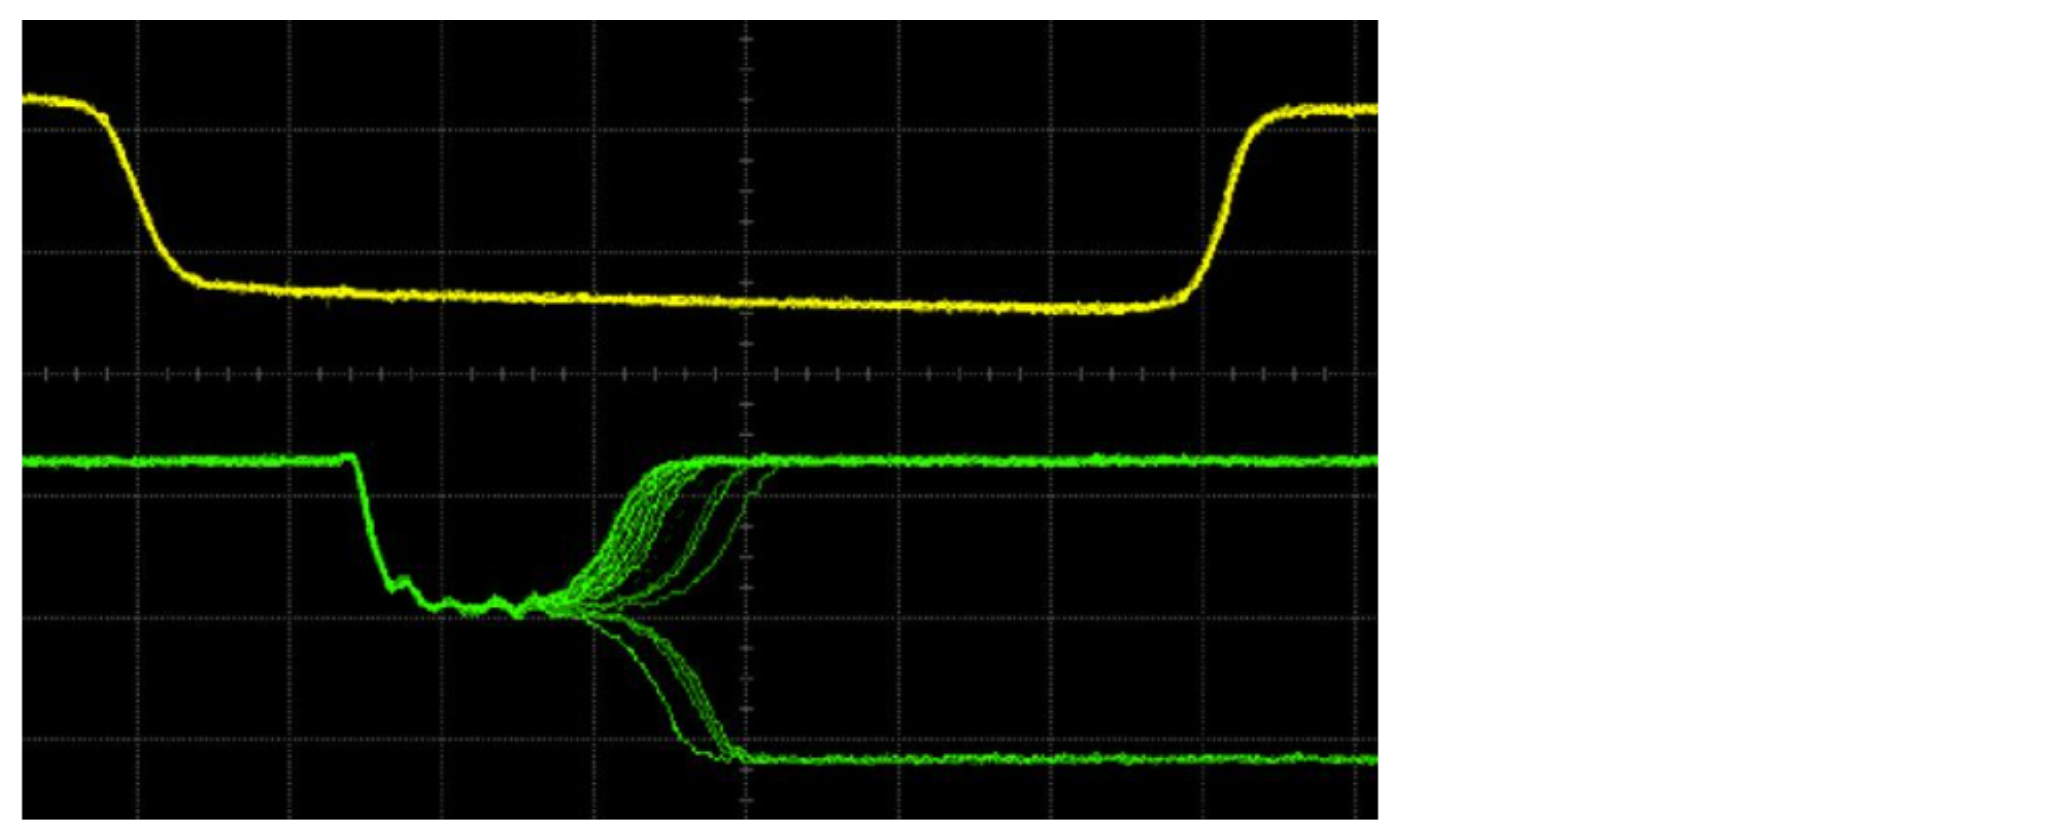

The probability becomes extremely small for long times, but it never becomes zero. This is a crucial insight: **the digital world cannot completely escape the analog behaviour of its physical implementation**.

However, from a practical perspective, if the system waits long enough (typically one or two clock cycles) the probability that the metastable state remains unresolved becomes negligibly small. In engineering terms, "waiting long enough" means using additional stages or giving the flip-flop sufficient time before its output is used by subsequent logic. 

### Synchronizers

In any real digital system, sooner or later we must deal with signals that do not obey our timing discipline. Up to this point, we have assumed that every signal in the system is synchronous: it changes only in well-defined intervals, always respecting the aperture window around a clock edge. Unfortunately, this assumption breaks down as soon as our circuit interacts with the external world. Inputs generated by physical actions (pressing a button, moving a sensor, receiving a signal from another device with a different clock) are inherently **asynchronous**. They can change at arbitrary times, completely unrelated to the internal clock of the system. As a result, they very easily violate the setup or hold constraints of the receiving flip-flop, producing metastable outputs and potentially leading to erratic failures.

These asynchronous inputs are not rare exceptions; they are **inevitable**. A human pushing a button certainly does not coordinate the motion of their finger with the rising edge of a clock. Even two subsystems on the same board, operating with clocks of similar frequencies, will drift relative to each other. The consequence is that any digital system that interfaces with reality **must be prepared to handle asynchronous transitions safely**.

Since metastability cannot be avoided completely, designers work to ensure that the **probability** of observing a metastable voltage at a point where it might cause damage is **extremely small**. The acceptable probability depends on the application. For a consumer device such as a smartphone, a single metastability-related failure in ten years may be tolerable: the user might experience a rare glitch but can simply restart the device. For a safety-critical application, such as a medical implant or a system controlling industrial machinery, the acceptable probability may be so small that the expected number of failures over the lifetime of the universe is still less than one. Designing for such **extreme reliability** requires careful control of where metastability can occur, and how it is contained.

To achieve this, we can introduce a building block called a **synchronizer**. It is a circuit that receives an asynchronous input signal D and a system clock CLK, and produces an output Q that is safe for the rest of the synchronous system to use. The key idea is that the synchronizer allows **metastability to occur only in a controlled location** (inside its own internals) and gives time for this metastability to decay before the output is observed elsewhere.

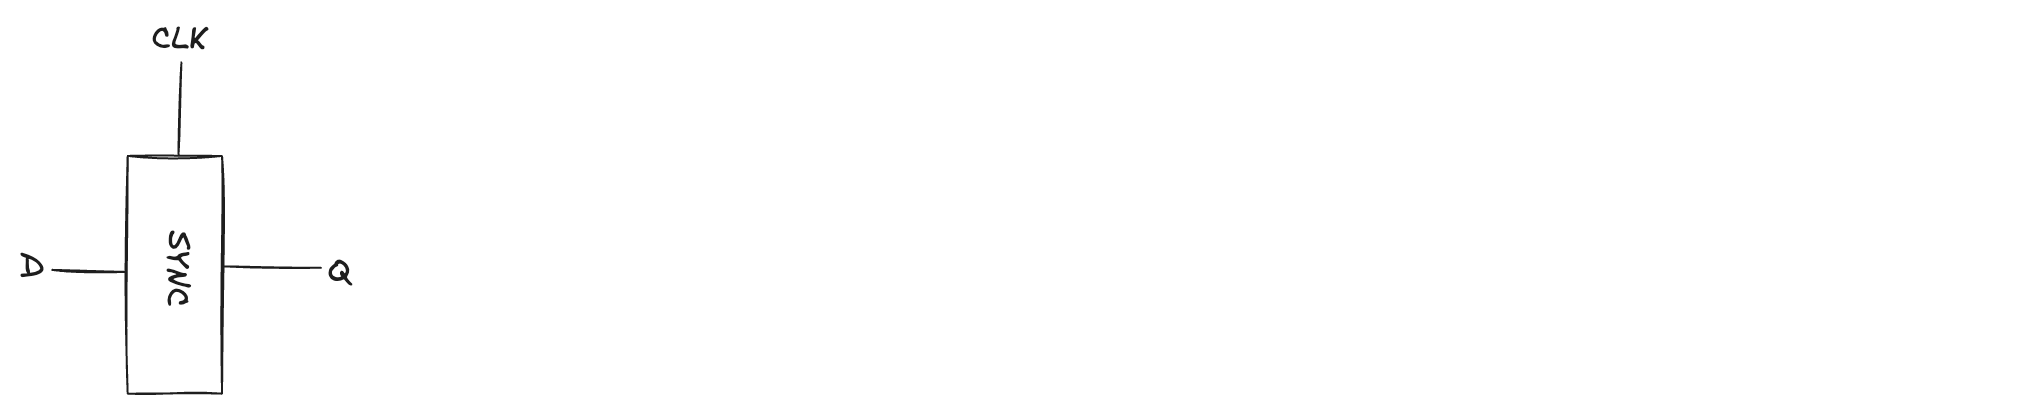

The behaviour of a synchronizer is simple to describe. If the asynchronous input D happens to be stable during the aperture window, the synchronizer behaves like an ordinary register: on the rising edge of the clock it copies D to Q. If instead D changes during the aperture, the synchronizer internals may go metastable. However, the design ensures that the metastability will almost certainly resolve before the next clock edge, so that the final output Q is always a valid logic level, even if the value does not necessarily match the most recent value of D. In other words, the synchronizer protects the system from metastability by containing it and giving it enough time to settle, thereby turning an unpredictable input into a clean, stable signal with high probability. A very common and effective way to build a synchronizer is to place **two flip-flops in series**, both clocked by the same system clock. This simple structure provides a surprisingly powerful mechanism for containing metastability and preventing it from affecting the rest of the circuit.

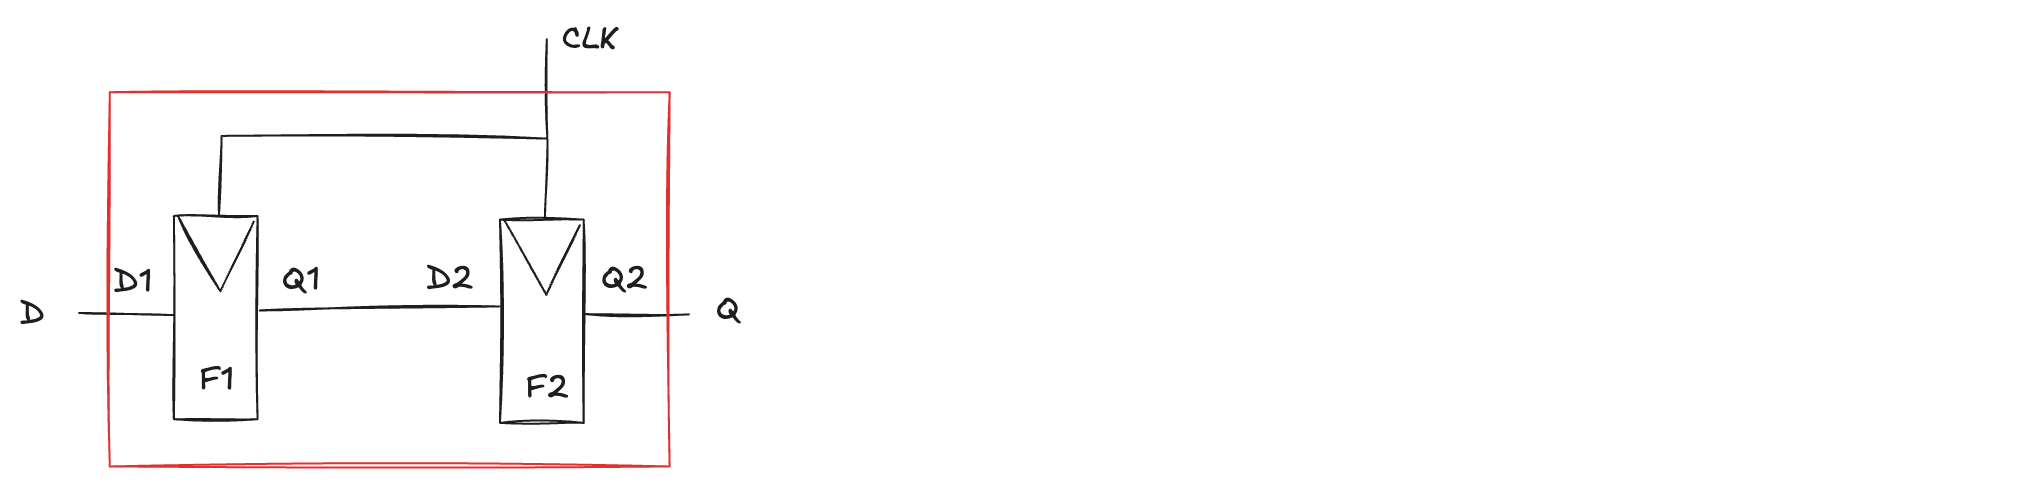

The first flip-flop, F1, directly samples the asynchronous input D on the rising edge of the clock. Because D is not synchronized to the clock, it might change at a dangerous time (in the middle of the aperture window). If that happens, the output Q1 (which is the input D2 of the second flip-flop F2) may briefly enter a metastable state. The key idea is that **F1 is the only flip-flop allowed to go metastable**, and its output is not used anywhere else except as input to F2. Now comes the crucial part: metastability does not last forever. If the **clock period is sufficiently long**, then F1 has most of the entire cycle to resolve its metastable condition. By the time the next rising edge arrives, the voltage at D2) has (**with high probability**) settled to a valid logic level. At that point, F2 samples this now-stable value and produces a clean, valid output Q for the rest of the system. 

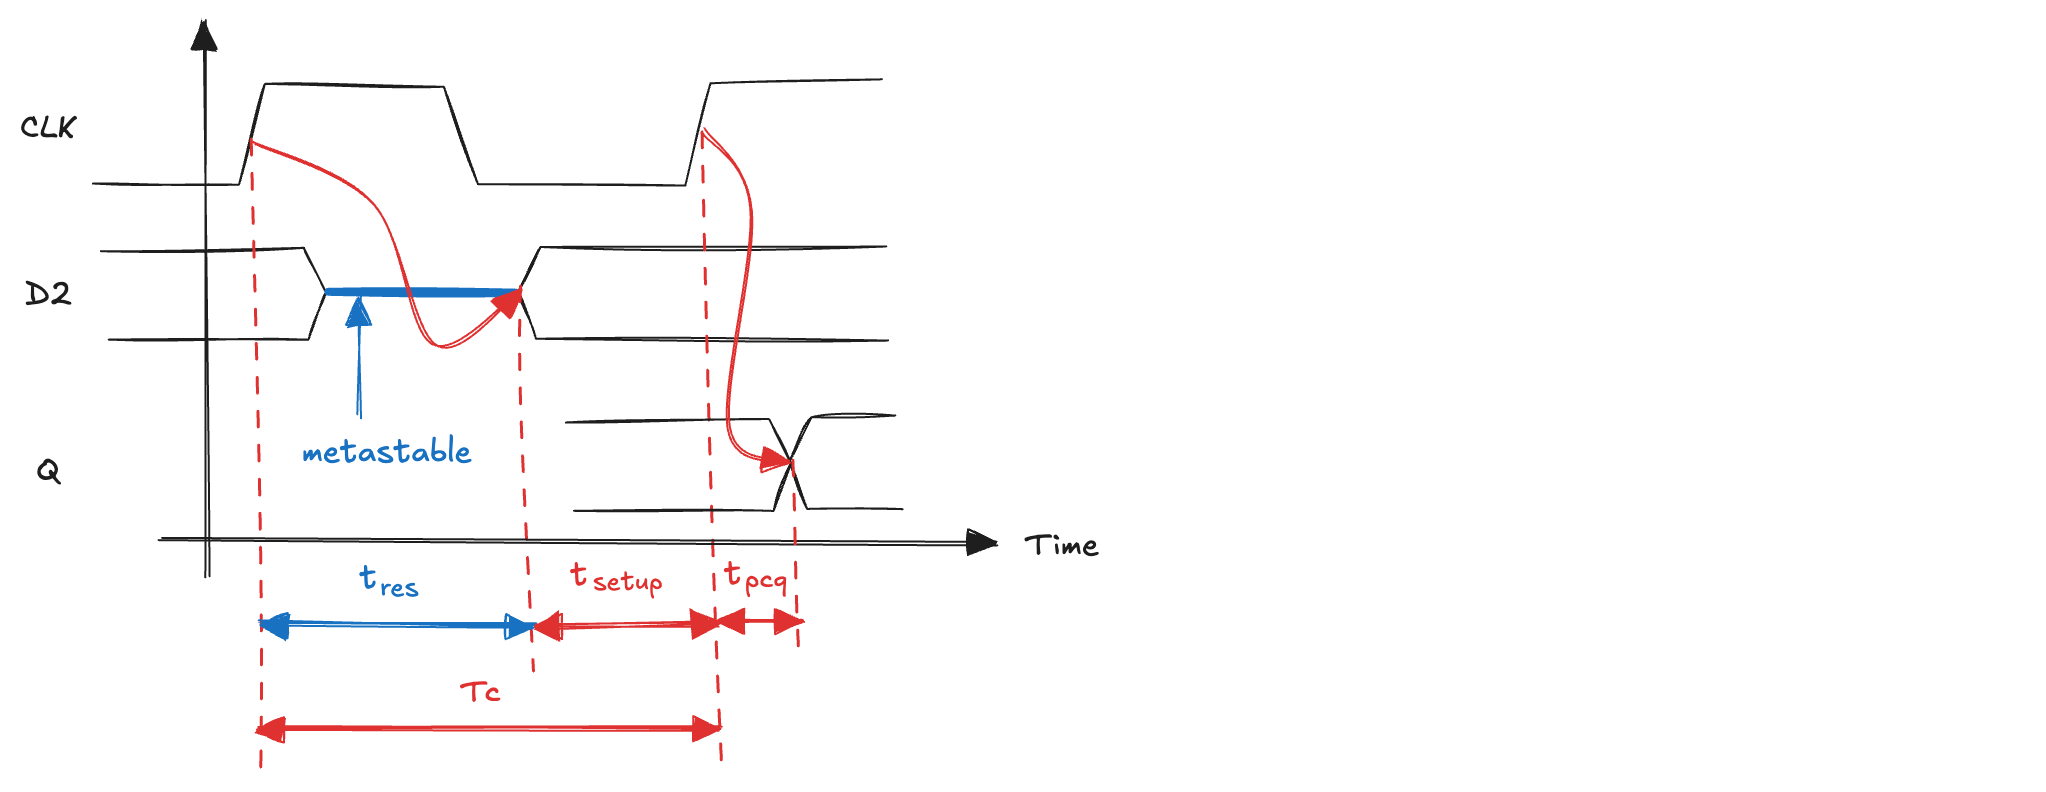

In other words, the first flip-flop isolates the metastability, and the second flip-flop ensures that only a stable signal escapes into the synchronous logic. The two-flip-flop synchronizer is the standard building block used in virtually every modern digital design, from microcontrollers to FPGAs to large SoCs. This approach has limits: the synchronizer will fail if the metastable state lasts longer than the time available before the second flip-flop samples the signal. More precisely, F2 will receive an invalid or metastable input if:

$\displaystyle t_{\text{res}} > T_C - t_{\text{setup}}$

meaning that the resolution time of F1 metastability exceeds the time budget between the clock edge and when F2 setup constraint must be satisfied. Fortunately, from the theory of metastability we know that the probability that the resolution time exceeds a certain duration decreases exponentially with that duration. Applying the earlier formula, the probability that the synchronizer fails on any given sampling event is:

$\displaystyle P(\text{failure}) = \frac{T_0}{T_C} \, e^{-\frac{T_C - t_{\text{setup}}}{\tau}}$

This expression makes several important points clear. First, the failure probability decreases exponentially as the clock period increases. A longer cycle gives F1 more time to recover. Second, the constants determined by the physical characteristics of the technology play a fundamental role: they represent the inherent speed at which the flip-flop escapes its metastable state.

Finally, since systems rarely encounter only a single asynchronous event, if the **asynchronous input changes N times per second**, each transition presents a fresh chance for metastability. The **probability of a failure occurring per second** is therefore:

$\displaystyle P(\text{failure/sec}) = N \cdot P(\text{failure})$

This gives designers a **quantitative way to evaluate the reliability of their synchronizers**. By choosing appropriate flip-flops, adjusting the clock period, or adding additional stages, they can ensure that the probability of a failure can be small as required for the application at hand.

### Reliability

We have seen that metastability cannot be entirely eliminated; at best, we can reduce the probability that a metastable condition propagates into the rest of the system. To evaluate **how safe a design is**, engineers use a quantitative **measure of reliability** known as the **Mean Time Between Failures (MTBF)**. This value tells us, on average, how long the system will operate before a metastability-induced failure occurs. The larger the MTBF, the more reliable the system.

The MTBF is simply the reciprocal of the probability that the synchronizer fails per second. If the chance of failure in any given second is extremely small, then the MTBF will be extremely large, perhaps measured in years or centuries. Using the earlier expression for the probability of failure, we can write:

$\displaystyle \text{MTBF} = \frac{1}{P(\text{failure/sec})} = \frac{T_C}{N T_0} \, \exp \left(\frac{T_C - t_{\text{setup}}}{\tau}\right)$

This equation illustrates a powerful insight: **the MTBF increases exponentially as the synchronizer is given more time to resolve the metastability**. Waiting even one extra clock cycle can increase the MTBF by several orders of magnitude. This is why, in typical digital systems, a two-flip-flop synchronizer is sufficient: it provides enough time that the probability of failure becomes astronomically small. However, in high-speed systems (where the clock period is extremely short) the amount of time available for resolution may be so limited that several extra synchronizer stages may be required to maintain an acceptable MTBF.

As an example, consider a system that receives asynchronous updates from a sensor. On average, this sensor changes its output only 0.2 times per second, meaning there are relatively few "dangerous" input transitions. We want the system to have an MTBF of at least one year, meaning the expected time between metastability-induced failures should exceed:

$\displaystyle \text{MTBF} = 1\ \text{year} \approx 3.14 \times 10^{7}\ \text{seconds}$

The flip-flops used in the synchronizer have the following characteristics:

- $\tau$ = 200ps
- $T_0$ = 150ps
- $t_{\text{setup}}$ = 500ps

Substituting these values into the MTBF equation, we get:

$\displaystyle 3.14 \times 10^{7} = \frac{T_C}{0.2 \times 150 \times 10^{-12}} \, \exp \left(\frac{T_C - 500\times10^{-12}}{200\times10^{-12}}\right)$

This expression has no closed-form algebraic solution, but it is easy to solve numerically:

$\displaystyle T_C \approx 3.036\ \text{ns}$

Thus, for the MTBF to exceed one year, the system clock must have a period of at least 3.036ns, corresponding to a maximum clock frequency of approximately 330 MHz. If the clock were faster than this, the synchronizer would not have enough time to resolve metastability with sufficiently high probability, and the expected failure rate would exceed our requirement.